# 1.Basic information
## 1.1 Group information:
|Student ID| Name |
|----------|------|
|23127130|Nguyễn Hữu Anh Trí|
|23127057|Cao Tấn Hoàng Huy| 

## 1.2 Libraries used:


In [8]:
import kagglehub
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict


# 2.1 Data Collection

## What subject is your data about?
* **Describe the topic, domain, or phenomenon**
    
    The dataset covers **personal health indicators** and their relationship to heart disease. The domain encompasses **healthcare, epidemiology, and public health**. It includes relevant variables such as BMI, smoking habits, alcohol drinking, stroke history, physical health, and mental health status to determine risk factors for heart disease.
* **What real-world context does this represent?**
    
    This data represents the health status of the **adult population in the United States** based on the **2022 annual CDC survey**. It provides a real-world snapshot of public health, highlighting that heart disease is a leading cause of death across most races in the U.S.

## What is the source of your data?
* **Platform name (Kaggle, UCI, etc.) and full URL**
    * **Platform:** Kaggle
    * **URL:** [https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
* **Original author(s) or organization**
    The original data source is the **Centers for Disease Control and Prevention (CDC)**. The dataset was curated and uploaded to Kaggle by **Kamil Pytlak**.
* **Publication/collection date**
    The specific files selected for this project are from the **2022 update** (`heart_2022_no_nans.csv` or `heart_2022_with_nans.csv`), representing the **2022 annual survey**.

### Is this data licensed for your use?
* **What license does the dataset have?**
    
    The dataset is licensed under **CC0: Public Domain**.
* **Are you permitted to use it for educational purposes?**
    
    **Yes**, the Public Domain license allows for unrestricted use for educational, research, and commercial purposes.
* **Document any usage restrictions or attribution requirements**
    
    There are **no usage restrictions**. While attribution is not legally required by the license, standard academic practice requires citing the CDC and the Kaggle dataset provider.

### How was this data collected?
* **Collection method (survey, sensors, administrative records, web scraping, etc.)**
    
    The data was collected via **annual telephone surveys** conducted by the **Behavioral Risk Factor Surveillance System (BRFSS)**.
* **Target population and sampling approach**
    
    The target population is **adults (18+) in the United States**. The BRFSS collects data from all 50 states, the District of Columbia, and three U.S. territories. This dataset includes over **400,000** adult interviews.
* **Time period of data collection**
    
    The data corresponds to the **2022** survey period.
* **Any known limitations or biases in collection**
    
    * **Class Imbalance:** The classes are unbalanced (significantly more "No" responses for heart disease than "Yes"), meaning standard model accuracy might be misleading without techniques like undersampling or weighting.
    * **Self-Reporting:** As a telephone survey, the data relies on self-reported information, which can be subject to recall bias.

## Why did you choose this dataset?
* **What interests your group about this topic?**
    
    Heart disease is a critical public health issue and a leading cause of death. We are interested in applying machine learning to see if we can detect patterns in lifestyle and health factors (like high blood pressure, cholesterol, and smoking) that predict a patient's condition.
* **What potential questions or insights could this data provide?**
    
    * Can we accurately predict the likelihood of heart disease based on the 40 selected variables?
    * Which factors (e.g., BMI vs. Smoking) have the most significant effect on heart disease risk?
    * How do machine learning models perform on unbalanced medical data?
    * What is the age group that is most likely to have heart disease across different states?  

## 2.1.1 Dataset download method and instructions

### Libraries requirements:

If you haven't installed the required libraries, run these commands in your terminal or a separate notebook cell:

```bash
pip install kagglehub pandas
```

### Customization option

- **Change the target folder**: Modify the `target_folder` variable to your preferred location
- **Relative vs Absolute paths**: 
  - `"./my_heart_disease_data"` - creates folder in current directory
  - `"../data/heart_disease"` - creates folder in parent directory
  - `"C:/Users/YourName/Documents/heart_data"` - absolute path (Windows)
  - `"/home/username/projects/heart_data"` - absolute path (Linux/Mac)

In [3]:
cache_path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

target_folder = "./my_heart_disease_data"
os.makedirs(target_folder, exist_ok=True)
shutil.copytree(cache_path, target_folder, dirs_exist_ok=True)

print(f"Dataset files are now available in: {target_folder}")
print(os.listdir(target_folder))

Dataset files are now available in: ./my_heart_disease_data
['2020', '2022']


### File structure after download

The dataset has been organized into the following directory structure:

```
[target_folder] (In this case is: my_heart_disease_data)/
├── 2020/
│   └── heart_2020_cleaned.csv
└── 2022/
    ├── heart_2022_no_nans.csv
    └── heart_2022_with_nans.csv
```

### Dataset files description

| File | Description | Use Case |
|------|-------------|----------|
| **`heart_2020_cleaned.csv`** | 2020 CDC survey data, pre-cleaned | Good for historicaldcomparison and baseline analysis |
| **`heart_2022_no_nans.csv`** | 2022 CDC survey data with missing values removed | Ready for immediate analysis, smaller dataset |
| **`heart_2022_with_nans.csv`** | 2022 CDC survey data with original missing values intact | Best for comprehensive analysis and missing data handling strategies |

### 2.1.2 Dataset choosen:

For this project, we are using **`heart_2022_with_nans.csv`** because:
- Contains the most recent data (2022)
- Preserves original data integrity (includes missing values)
- Allows us to implement and demonstrate proper missing data handling techniques
- Provides more comprehensive dataset for analysis

# 2.2 Data Exploration

## 2.2.1 Basic information

In [3]:
# Load the chosen dataset (heart_2022_with_nans.csv)
df = pd.read_csv("my_heart_disease_data/2022/heart_2022_with_nans.csv")

### How many rows does your dataset have?

In [ ]:
num_rows = len(df)
print(f"Number of rows: {num_rows:,}")

### How many columns does your dataset have?

In [ ]:
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

### What does each row represent?
- Each rows represents: One individual adult survey respondent from the 2022 CDC BRFSS survey
- Each record contains health indicators and demographics for a single person

### What is the overall size of the dataset? 

In [ ]:
dataset_size_cells = df.size
memory_usage_bytes = df.memory_usage(deep=True).sum()
memory_usage_mb = memory_usage_bytes / (1024 * 1024)

print(f"Dataset dimensions: {num_rows:,} rows × {num_columns} columns")
print(f"Total data points: {dataset_size_cells:,} cells")
print(f"Memory usage: {memory_usage_mb:.2f} MB")

### What are the column names?

In [ ]:
print("All column names in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Basic dataset information
Number of rows: 445,132
Number of columns: 40
Each row represents: One individual adult survey respondent from the 2022 CDC BRFSS survey
Each record contains health indicators and demographics for a single person
Dataset dimensions: 445,132 rows × 40 columns
Total data points: 17,805,280 cells
Memory usage: 820.56 MB

COLUMN NAMES
All column names in the dataset:
 1. State
 2. Sex
 3. GeneralHealth
 4. PhysicalHealthDays
 5. MentalHealthDays
 6. LastCheckupTime
 7. PhysicalActivities
 8. SleepHours
 9. RemovedTeeth
10. HadHeartAttack
11. HadAngina
12. HadStroke
13. HadAsthma
14. HadSkinCancer
15. HadCOPD
16. HadDepressiveDisorder
17. HadKidneyDisease
18. HadArthritis
19. HadDiabetes
20. DeafOrHardOfHearing
21. BlindOrVisionDifficulty
22. DifficultyConcentrating
23. DifficultyWalking
24. DifficultyDressingBathing
25. DifficultyErrands
26. SmokerStatus
27. ECigaretteUsage
28. ChestScan
29. RaceEthnicityCategory
30. AgeCategory
31. HeightInMeters
32. WeightInKilo

## 2.2.2 Data integrity
<ol>
    <li> Are there any duplicated rows? If yes, how many? 
    <li> Should duplicates be kept or removed? (Justify your decision) 
    <li> Are all rows complete, or are some entirely empty? 
<ol>

### Are there any duplicated rows? If yes, how many?

In [5]:
print(f"Total rows in dataset: {len(df):,}")
print(f"Duplicate rows found: {df.duplicated().sum():,}")
print(f"Percentage of duplicates: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

Total rows in dataset: 445,132
Duplicate rows found: 157
Duplicate rows found: 157
Percentage of duplicates: 0.04%
Percentage of duplicates: 0.04%


### Should duplicates be kept or removed? (Justify your decision) 
&rarr; They should be removed

In [ ]:
print(f"\n....Remove duplicates rows")
df = df.drop_duplicates()
print(f"Duplicates removed. New dataset has {len(df):,} rows.")


2. Remove duplicates rows
Duplicates removed. New dataset has 444,975 rows.
Duplicates removed. New dataset has 444,975 rows.


### Are all rows complete or some entirely empty?

In [7]:
# Check for completely empty rows
print(f"Completely empty rows: {df.isnull().all(axis=1).sum():,}")

missing_per_row = df.isnull().sum(axis=1)
rows_with_missing = (missing_per_row > 0).sum()
percentage_rows_with_missing = (rows_with_missing / len(df)) * 100

print(f"Rows with at least one missing value: {rows_with_missing:,}")
print(f"Percentage of rows with missing data: {percentage_rows_with_missing:.2f}%")

Completely empty rows: 0
Rows with at least one missing value: 198,962
Percentage of rows with missing data: 44.71%
Rows with at least one missing value: 198,962
Percentage of rows with missing data: 44.71%


## 2.2.3 Column Inventory 


### What is the meaning/definition of each columns?
We can categorize 40 columns into 7 main groups:
- **Group 1** *Demographics and basic information*:
    - **State**: US State where survey was conducted - Geographic identifier
    - **Sex**: Gender of respondent (Male/Female) - Demographic variable  
    - **AgeCategory**: Age group categories (e.g., 18-24, 25-29, etc.) - Key demographic
    - **RaceEthnicityCategory**: Race and ethnicity classification - Demographic variable

- **Group 2** *Related heart conditions*:
    - **HadHeartAttack**: Whether respondent ever had heart attack - PRIMARY OUTCOME
    - **HadAngina**: History of angina (chest pain) - Related heart condition
    - **HadStroke**: History of stroke - Cardiovascular risk factor

- **Group 3** *Physical health metrics*:
    - **GeneralHealth**: Self-reported overall health status - Key health indicator
    - **PhysicalHealthDays**: Days of poor physical health in past 30 days - Health quality measure
    - **MentalHealthDays**: Days of poor mental health in past 30 days - Mental health indicator
    - **BMI**: Body Mass Index (calculated) - Key obesity/health metric
    - **HeightInMeters**: Height measurement - Used for BMI calculation
    - **WeightInKilograms**: Weight measurement - Used for BMI calculation

- **Group 4** *Chronic conditions*
    - **HadAsthma**: History of asthma - Respiratory condition
    - **HadSkinCancer**: History of skin cancer - Cancer indicator
    - **HadCOPD**: Chronic Obstructive Pulmonary Disease - Respiratory condition
    - **HadDepressiveDisorder**: History of depression - Mental health condition
    - **HadKidneyDisease**: History of kidney disease - Chronic condition
    - **HadArthritis**: History of arthritis - Joint/inflammatory condition
    - **HadDiabetes**: Diabetes status - Major metabolic risk factor

- **Group5** *Disabilities and limitations*:
    - **DeafOrHardOfHearing**: Hearing impairment status - Disability indicator
    - **BlindOrVisionDifficulty**: Vision impairment status - Disability indicator
    - **DifficultyConcentrating**: Cognitive difficulties - Functional limitation
    - **DifficultyWalking**: Mobility limitations - Physical disability
    - **DifficultyDressingBathing**: Self-care limitations - Functional disability
    - **DifficultyErrands**: Difficulty with errands/shopping - Functional limitation

- **Group 6** *Lifestyle and behaviours*
    - **SmokerStatus**: Smoking history/status - Major cardiovascular risk factor
    - **ECigaretteUsage**: Electronic cigarette usage - Modern smoking behavior
    - **AlcoholDrinkers**: Alcohol consumption status - Lifestyle risk factor
    - **PhysicalActivities**: Regular physical activity participation - Protective factor
    - **SleepHours**: Average hours of sleep per day - Lifestyle factor

- **Group 7** *Healthcare and preventions*:
    - **LastCheckupTime**: Time since last medical checkup - Healthcare access indicator
    - **RemovedTeeth**: Number of teeth removed - Oral health/overall health indicator
    - **ChestScan**: Recent chest scan/X-ray - Healthcare utilization
    - **HIVTesting**: HIV testing history - Preventive healthcare behavior
    - **FluVaxLast12**: Flu vaccination in last 12 months - Preventive care
    - **PneumoVaxEver**: Ever received pneumonia vaccine - Preventive care
    - **TetanusLast10Tdap**: Tetanus vaccination status - Preventive care
    - **HighRiskLastYear**: High-risk behavior in last year - Risk assessment
    - **CovidPos**: COVID-19 positive status - Recent health event

### Which columns are relevant to potential analysis? 

- We can have some important columns due to some categories:
    - Relevant heart-disease factors: `HadHeartAttack, HadAngina, HadStroke, HadDiabetes`
    - Key health indicators:  `GeneralHealth, BMI, SmokerStatus, PhysicalActivities`
    - Important demographic: `AgeCategory, Sex, State, RaceEthnicityCategory`
    - Relevant conditions: `HadCOPD, HadKidneyDisease, PhysicalHealthDays`
    - Lifestyle factors: `AlcoholDrinkers, SleepHours, MentalHealthDays, LastCheckupTime`
    - Physical limitations: `DifficultyWalking, DifficultyErrands`
    - Recent pandemic: `CovidPos` 

### Are there any columns that should be dropped? Why? 

| Category | Columns | Reason | Recommendation |
|----------|---------|--------|----------------|
| **Redudant features** | HeightInMeters, WeightInKilograms | BMI is already calculated from these values | DROP - Keep BMI only |
| **Preventive care (Low signal)** | FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap | Vaccination status has weak connection to heart disease | CONSIDER DROPPING - Low predictive value |
| **Highly specific disabilities** | BlindOrVisionDifficulty, DeafOrHardOfHearing, DifficultyDressingBathing | Very specific conditions with indirect heart disease connection | CONSIDER DROPPING - Unless studying comorbidity patterns |
| **Oral health(Indirect)** | RemovedTeeth | While oral health connects to heart disease, removed teeth count is indirect | CONSIDER DROPPING - Indirect indicator |



### 2.2.4 Data types: 

### What is the current data type of each column? 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

### Are there columns with inappropriate data types?  


In [ ]:
# Categorize columns by their expected vs actual types
categorical_expected = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
    'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

numerical_expected = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters',
    'WeightInKilograms', 'BMI'
]

print("Checking for type mismatches:")

# Vectorized approach: Get all dtypes at once
all_dtypes = df.dtypes
type_issues = []

# CATEGORICAL COLUMNS ANALYSIS (Vectorized)
print(f"\n Categorical Columns (Expected: object/string):")
cat_cols_present = [col for col in categorical_expected if col in df.columns]
if cat_cols_present:
    # Get dtypes for all categorical columns at once
    cat_dtypes = all_dtypes[cat_cols_present]
    cat_analysis = pd.DataFrame({
        'column': cat_cols_present,
        'dtype': cat_dtypes.astype(str),
        'is_object': cat_dtypes == 'object'
    })
    
    # Display results
    for _, row in cat_analysis.iterrows():
        status = "CORRECT" if row['is_object'] else f"ISSUE: {row['dtype']}"
        print(f"   {row['column']:<30} {row['dtype']:<15} {status}")
        
        if not row['is_object']:
            type_issues.append({
                'column': row['column'],
                'current_type': row['dtype'],
                'expected_type': 'object/categorical',
                'issue': 'Should be categorical/string type'
            })

# NUMERICAL COLUMNS ANALYSIS (Vectorized)
print(f"\n Numerical columns (Expected: int64/float64):")
num_cols_present = [col for col in numerical_expected if col in df.columns]
if num_cols_present:
    # Get dtypes for all numerical columns at once
    num_dtypes = all_dtypes[num_cols_present]
    numeric_types = ['int64', 'float64', 'int32', 'float32']
    num_analysis = pd.DataFrame({
        'column': num_cols_present,
        'dtype': num_dtypes.astype(str),
        'is_numeric': num_dtypes.astype(str).isin(numeric_types)
    })
    
    # Display results
    for _, row in num_analysis.iterrows():
        status = "CORRECT" if row['is_numeric'] else f"ISSUE: {row['dtype']}"
        print(f"   {row['column']:<30} {row['dtype']:<15} {status}")
        
        if not row['is_numeric']:
            type_issues.append({
                'column': row['column'],
                'current_type': row['dtype'],
                'expected_type': 'numeric (int64/float64)',
                'issue': 'Should be numeric type'
            })

# BINARY VARIABLES ANALYSIS (Vectorized)
print(f"\nBinary variables analysis:")
# Filter categorical columns that exist in dataframe
cat_cols_in_df = [col for col in categorical_expected if col in df.columns]

# Vectorized unique value counting
binary_analysis = pd.DataFrame({
    'column': cat_cols_in_df,
    'nunique': [df[col].dropna().nunique() for col in cat_cols_in_df]
})
binary_cols = binary_analysis[binary_analysis['nunique'] == 2]['column'].tolist()

# Check binary patterns vectorized
binary_candidates = []
yes_no_patterns = {'yes', 'no', 'true', 'false', '1', '0'}

for col in binary_cols:
    unique_vals = df[col].dropna().unique()
    if set(str(v).lower() for v in unique_vals) <= yes_no_patterns:
        binary_candidates.append(col)
        print(f" {col}: Binary variable with values {unique_vals} - Could be converted to boolean")

# NUMERIC DATA STORED AS OBJECTS (Vectorized)
print(f"\nChecking for numeric data stored as objects:")
# Get all object columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()

# Vectorized numeric detection
numeric_as_object = []
for col in object_cols:
    sample_data = df[col].dropna().head(100)
    if len(sample_data) > 0:
        # Try converting entire sample at once
        try:
            pd.to_numeric(sample_data, errors='raise')
            numeric_as_object.append(col)
            print(f"   {col}: Stored as object but appears to be numeric")
        except (ValueError, TypeError):
            pass  # It's truly categorical

# SUMMARY (Using pandas operations)
summary_conditions = [
    len(type_issues) > 0,
    len(numeric_as_object) > 0, 
    len(binary_candidates) > 0
]

if any(summary_conditions):
    print(f"\n Inappropriate data types summary:")
    
    if type_issues:
        print(f"   • Columns with wrong data types: {len(type_issues)}")
        # Using list comprehension instead of loop
        issues_formatted = [f"     - {issue['column']}: {issue['current_type']} should be {issue['expected_type']}" 
                           for issue in type_issues]
        print('\n'.join(issues_formatted))
    
    if numeric_as_object:
        print(f"   • Numeric columns stored as objects: {len(numeric_as_object)}")
        # Using list comprehension and join
        numeric_formatted = [f"     - {col}: Should be converted to numeric" for col in numeric_as_object]
        print('\n'.join(numeric_formatted))
    
    if binary_candidates:
        print(f"   • Binary variables that could be boolean: {len(binary_candidates)}")
        # Using list comprehension and join
        binary_formatted = [f"     - {col}: Could be converted to boolean for efficiency" for col in binary_candidates]
        print('\n'.join(binary_formatted))
            
    print(f"\n Solutions:")
    print("   1. Convert numeric columns stored as objects to proper numeric types")
    print("   2. Consider converting binary Yes/No columns to boolean for memory efficiency")
    print("   3. Ensure all categorical columns are properly typed as 'object' or 'category'")
    print("   4. Validate data types after conversion to prevent analysis errors")
else:
    print(f"\n No inappropriate data types detected")
    print("   All columns appear to have appropriate data types for their content")


2. Inappropriate data types analysis
------------------------------------------------------------
Checking for type mismatches:

 Categorical Columns (Expected: object/string):
   State                          object          CORRECT
   Sex                            object          CORRECT
   GeneralHealth                  object          CORRECT
   LastCheckupTime                object          CORRECT
   PhysicalActivities             object          CORRECT
   RemovedTeeth                   object          CORRECT
   HadHeartAttack                 object          CORRECT
   HadAngina                      object          CORRECT
   HadStroke                      object          CORRECT
   HadAsthma                      object          CORRECT
   HadSkinCancer                  object          CORRECT
   HadCOPD                        object          CORRECT
   HadDepressiveDisorder          object          CORRECT
   HadKidneyDisease               object          CORRECT
   HadArth

### Which columns need type conversion? 


| Column | From | To |
| :--- | :--- | :--- |
| PhysicalActivities | object | bool |
| HadHeartAttack | object | bool |
| HadAngina | object | bool |
| HadStroke | object | bool |
| HadAsthma | object | bool |
| HadSkinCancer | object | bool |
| HadCOPD | object | bool |
| HadDepressiveDisorder | object | bool |
| HadKidneyDisease | object | bool |
| HadArthritis | object | bool |
| DeafOrHardOfHearing | object | bool |
| BlindOrVisionDifficulty | object | bool |
| DifficultyConcentrating | object | bool |
| DifficultyWalking | object | bool |
| DifficultyDressingBathing | object | bool |
| DifficultyErrands | object | bool |
| ChestScan | object | bool |
| AlcoholDrinkers | object | bool |
| HIVTesting | object | bool |
| FluVaxLast12 | object | bool |
| PneumoVaxEver | object | bool |
| HighRiskLastYear | object | bool |
| State | object | category |
| Sex | object | category |
| GeneralHealth | object | category |
| LastCheckupTime | object | category |
| PhysicalActivities | object | category |

## 2.2.5 Numerical column investigations

### Find all numerical columns

In [8]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical columns detected: {numerical_columns}")


Numerical columns detected: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


#### Distribution & Central Tendency: 
- What is the distribution shape? (normal, skewed, bimodal, uniform) 
- Create visualizations: histograms, box plots, density plots,... 
- Calculate: mean, median, standard deviation 

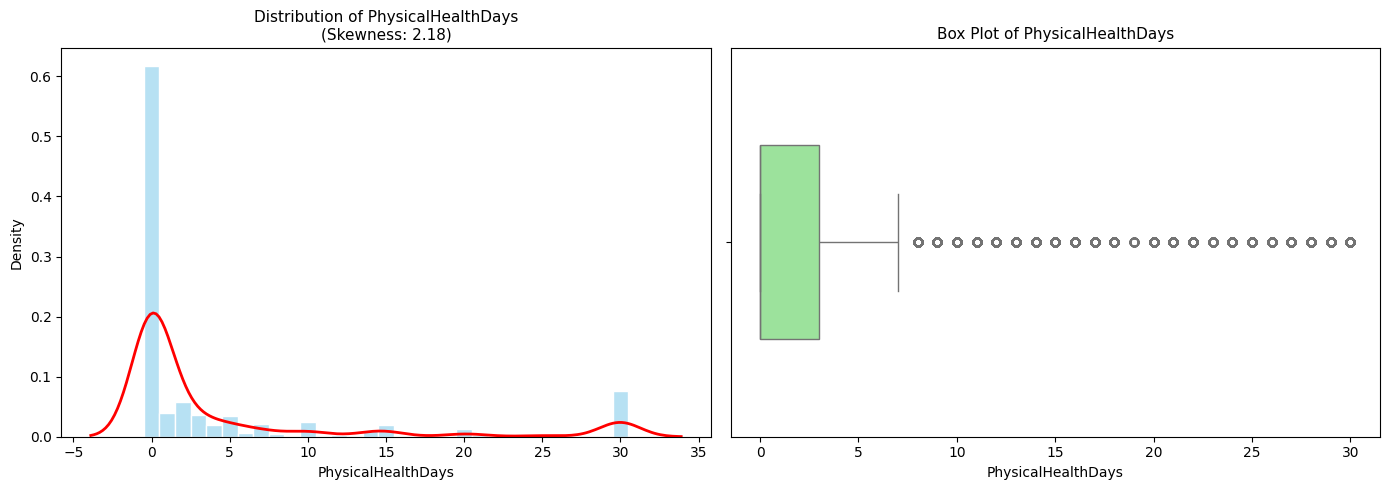

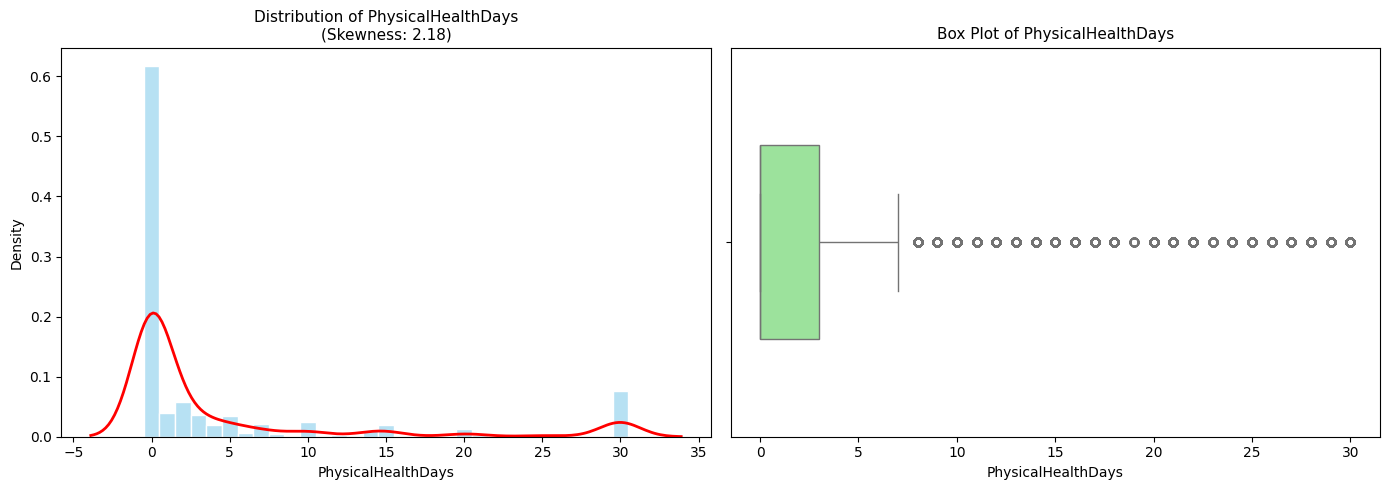

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



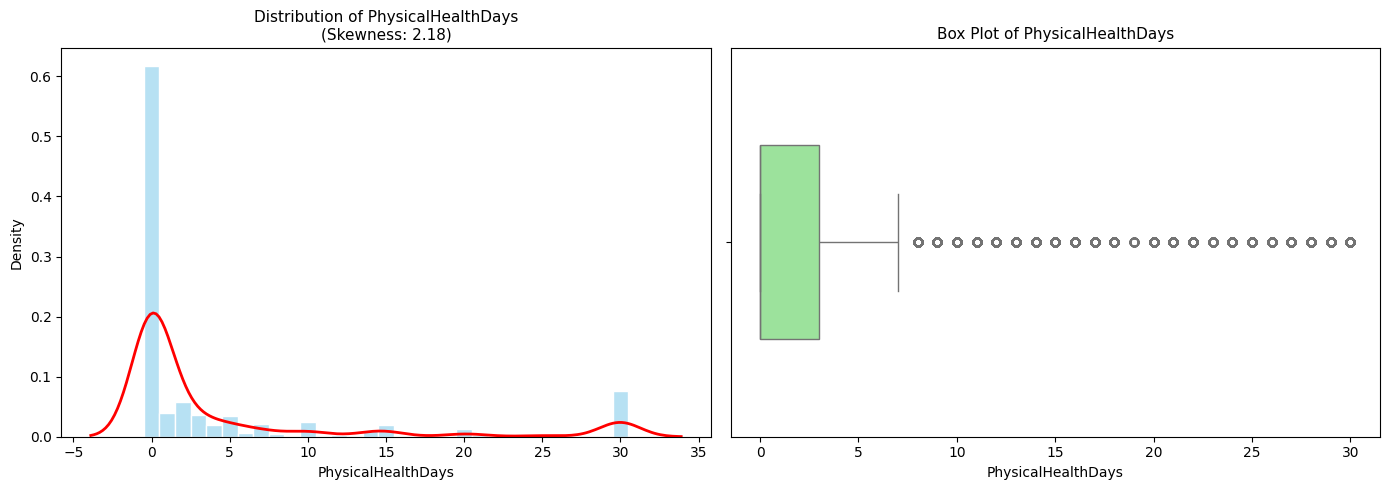

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



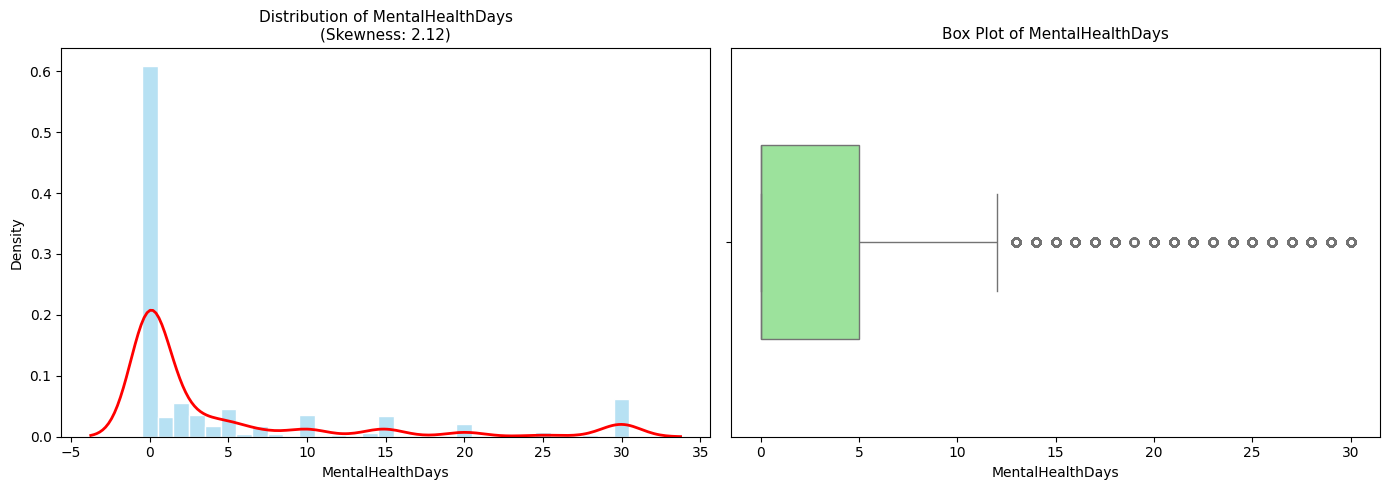

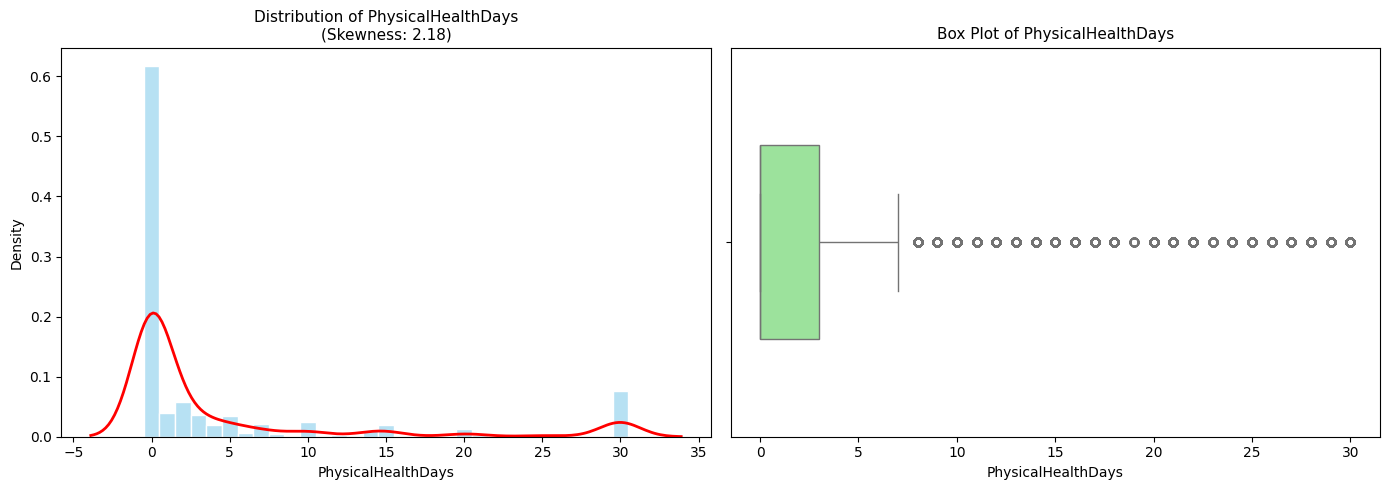

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



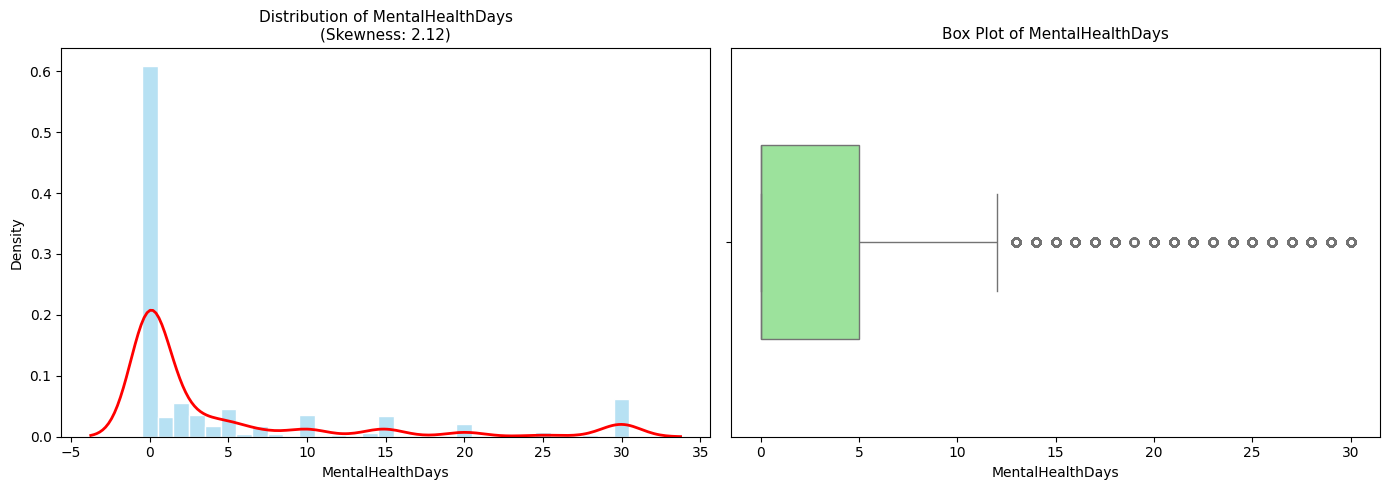

=========== Statistics summary: MENTALHEALTHDAYS ===========
Counts      : 436065
Mean        : 4.3826
Median      : 0.0000
Std Dev     : 8.3875
Skewness    : 2.1232
Shape       : Highly Right-Skewed (Positively Skewed)



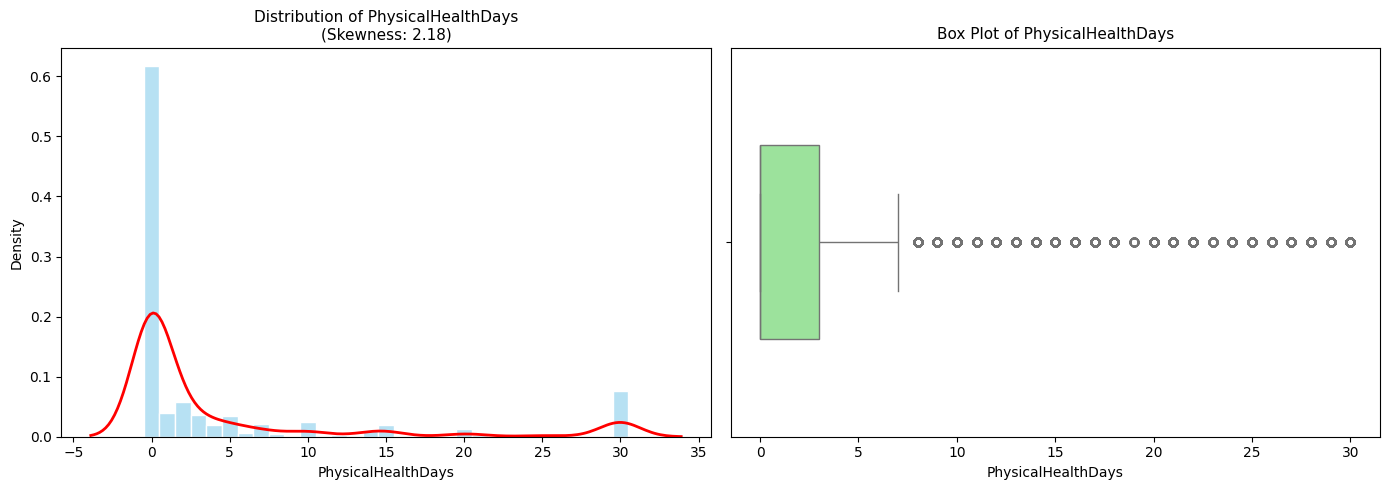

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



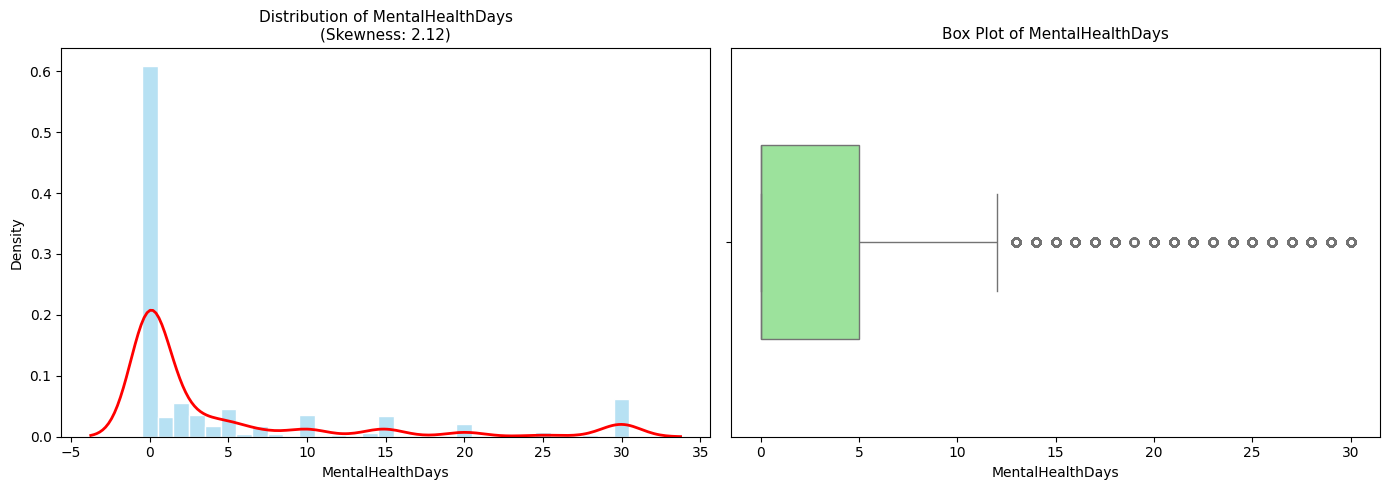

=========== Statistics summary: MENTALHEALTHDAYS ===========
Counts      : 436065
Mean        : 4.3826
Median      : 0.0000
Std Dev     : 8.3875
Skewness    : 2.1232
Shape       : Highly Right-Skewed (Positively Skewed)



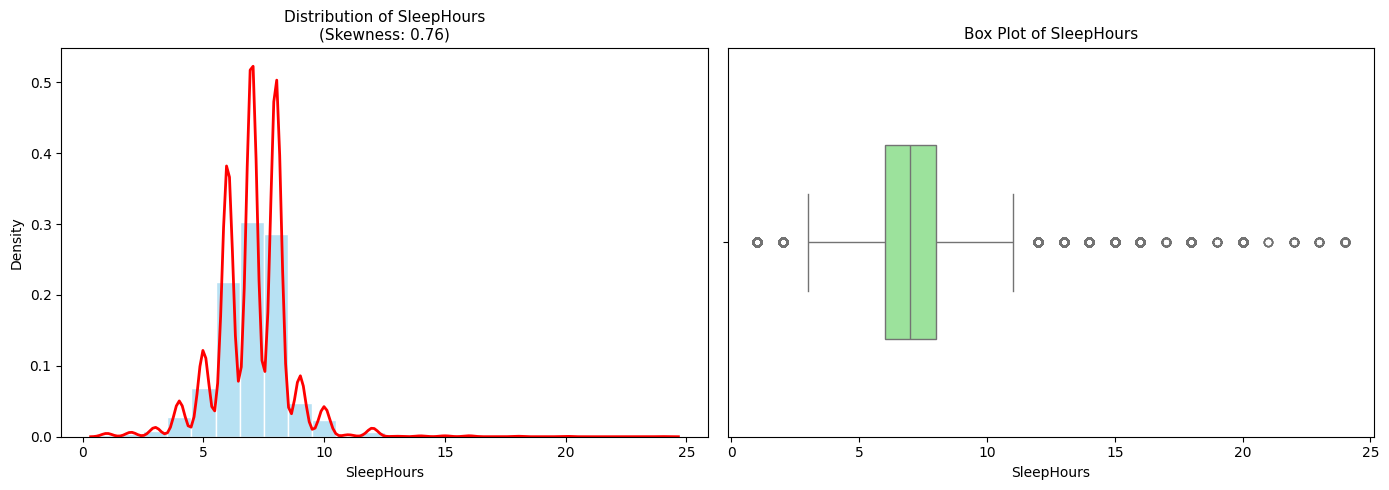

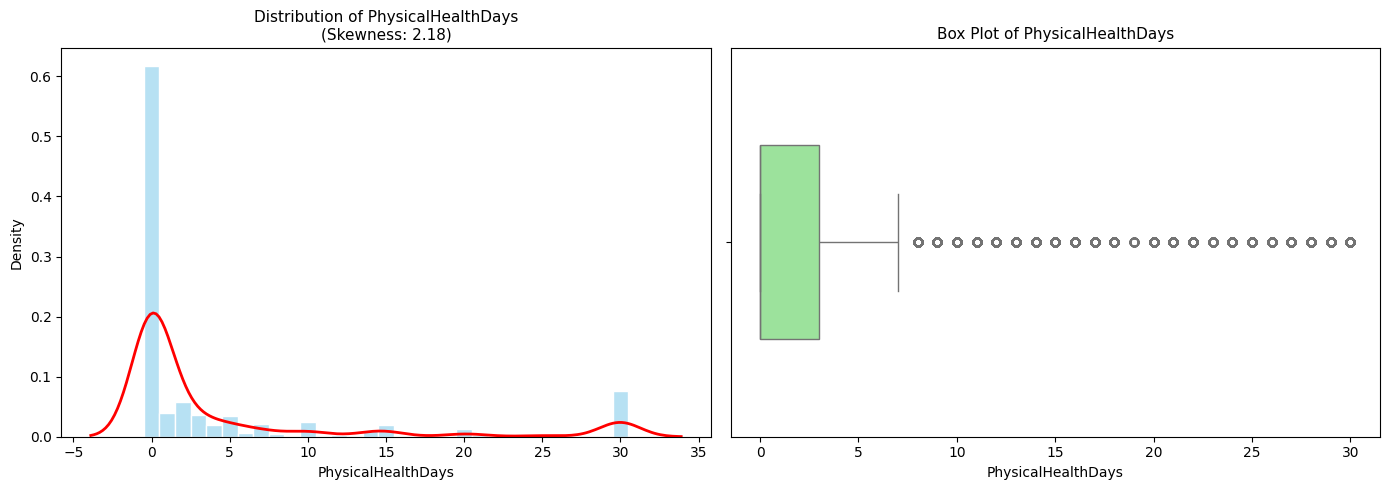

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



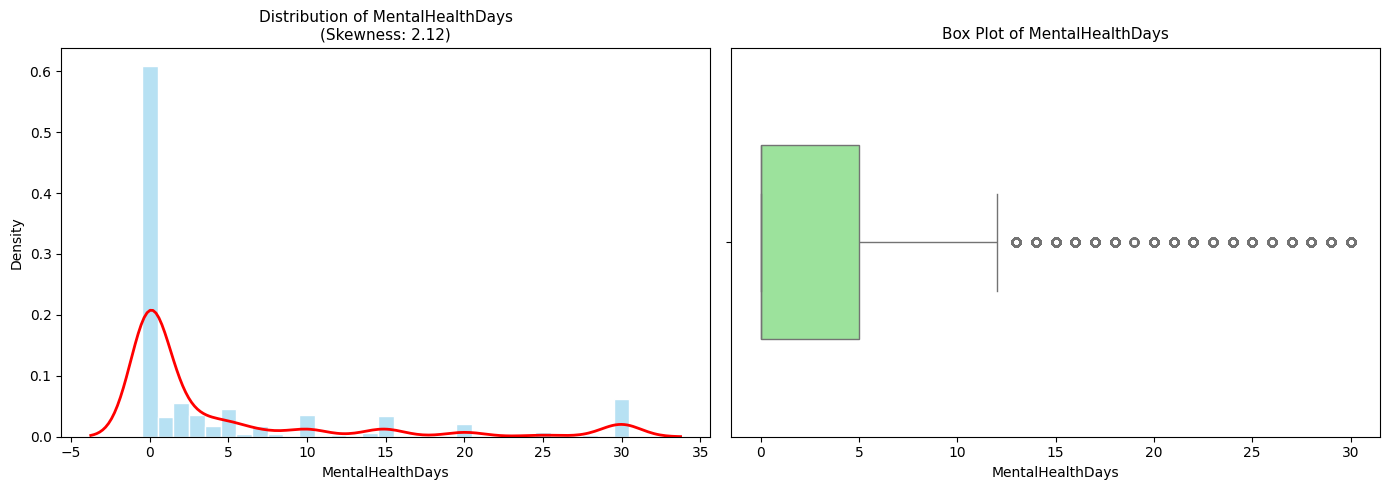

=========== Statistics summary: MENTALHEALTHDAYS ===========
Counts      : 436065
Mean        : 4.3826
Median      : 0.0000
Std Dev     : 8.3875
Skewness    : 2.1232
Shape       : Highly Right-Skewed (Positively Skewed)



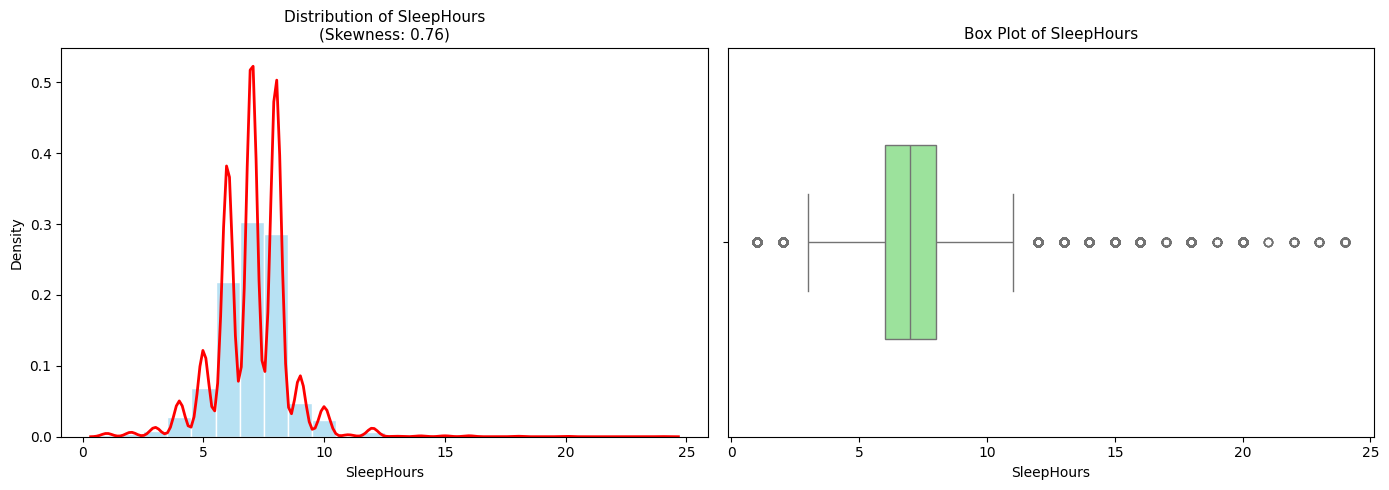

============== Statistics summary: SLEEPHOURS ==============
Counts      : 439679
Mean        : 7.0230
Median      : 7.0000
Std Dev     : 1.5024
Skewness    : 0.7646
Shape       : Moderately Right-Skewed



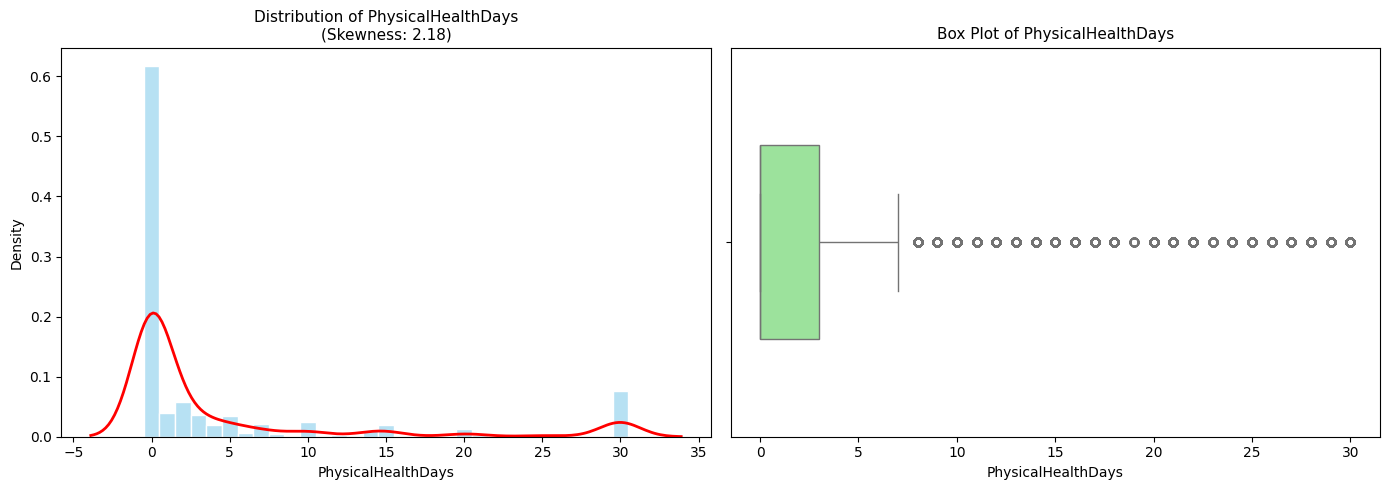

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



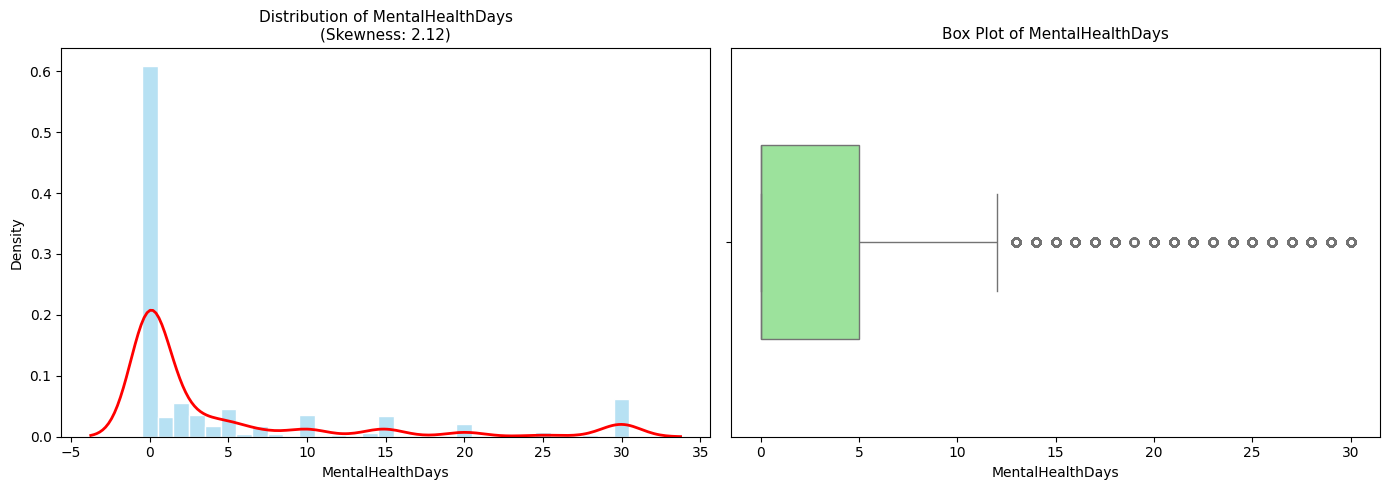

=========== Statistics summary: MENTALHEALTHDAYS ===========
Counts      : 436065
Mean        : 4.3826
Median      : 0.0000
Std Dev     : 8.3875
Skewness    : 2.1232
Shape       : Highly Right-Skewed (Positively Skewed)



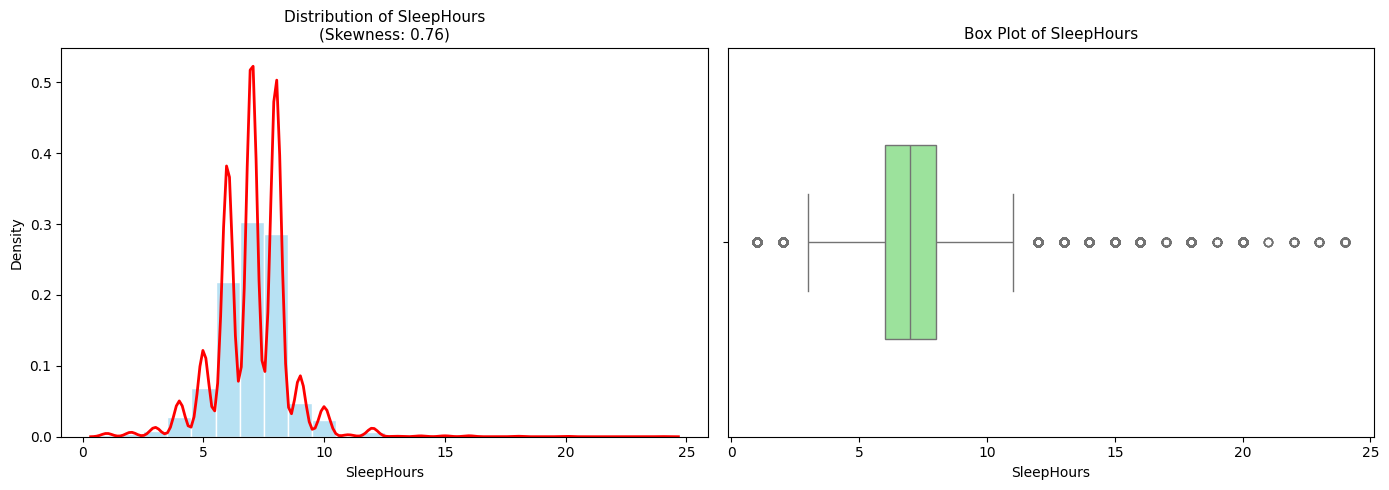

============== Statistics summary: SLEEPHOURS ==============
Counts      : 439679
Mean        : 7.0230
Median      : 7.0000
Std Dev     : 1.5024
Skewness    : 0.7646
Shape       : Moderately Right-Skewed



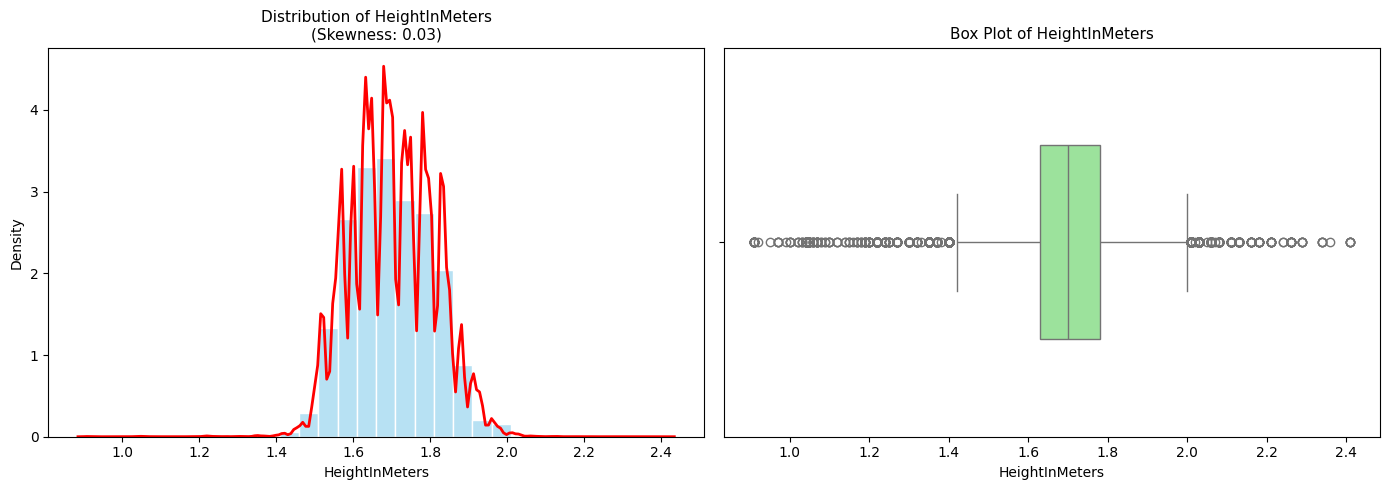

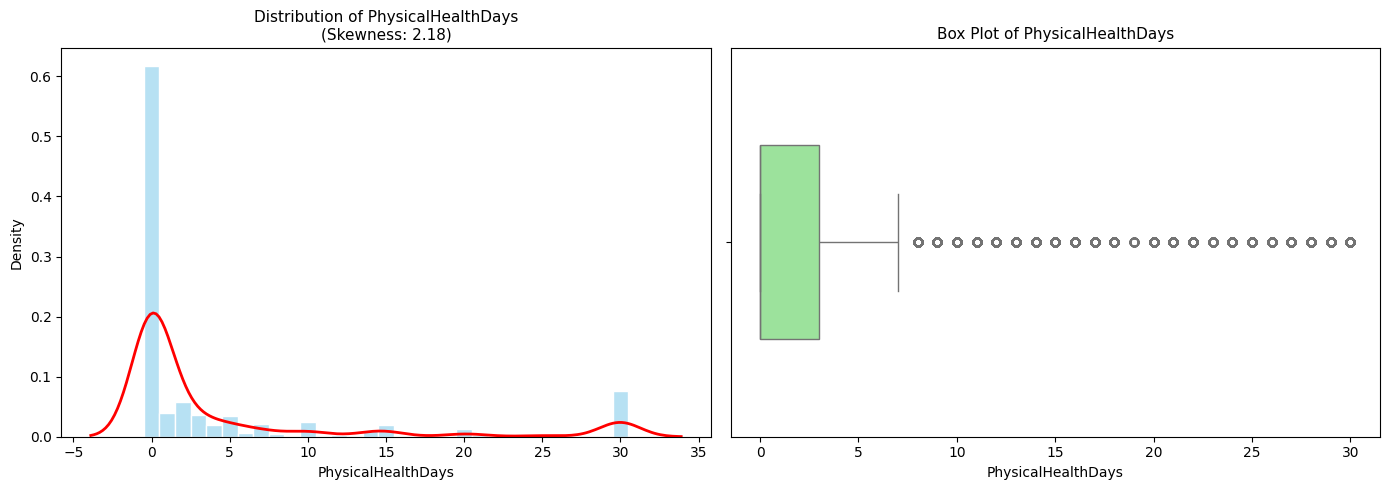

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



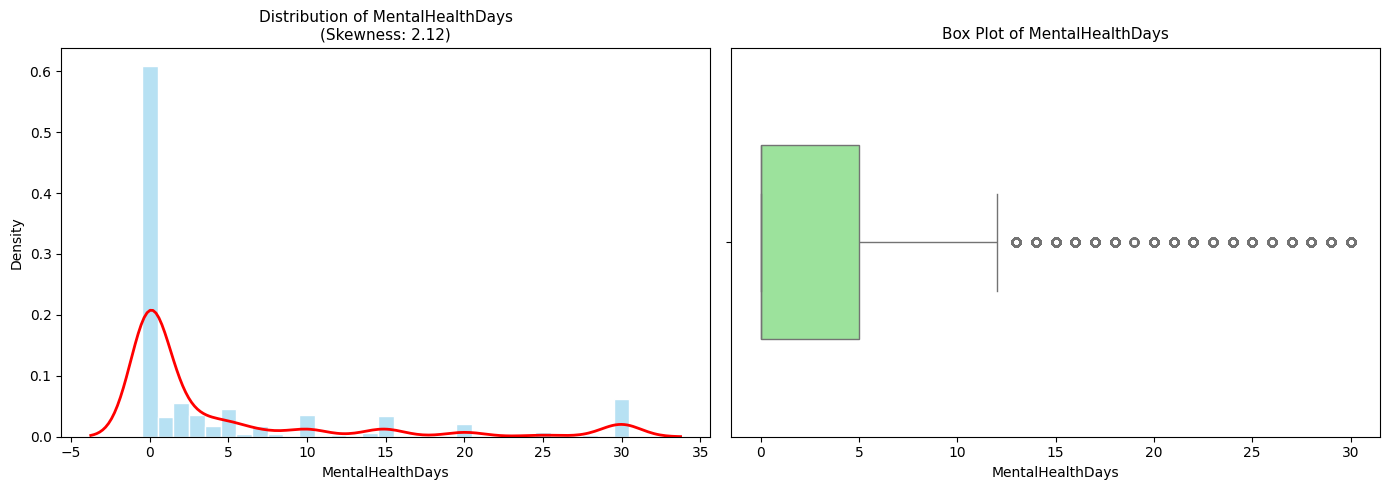

=========== Statistics summary: MENTALHEALTHDAYS ===========
Counts      : 436065
Mean        : 4.3826
Median      : 0.0000
Std Dev     : 8.3875
Skewness    : 2.1232
Shape       : Highly Right-Skewed (Positively Skewed)



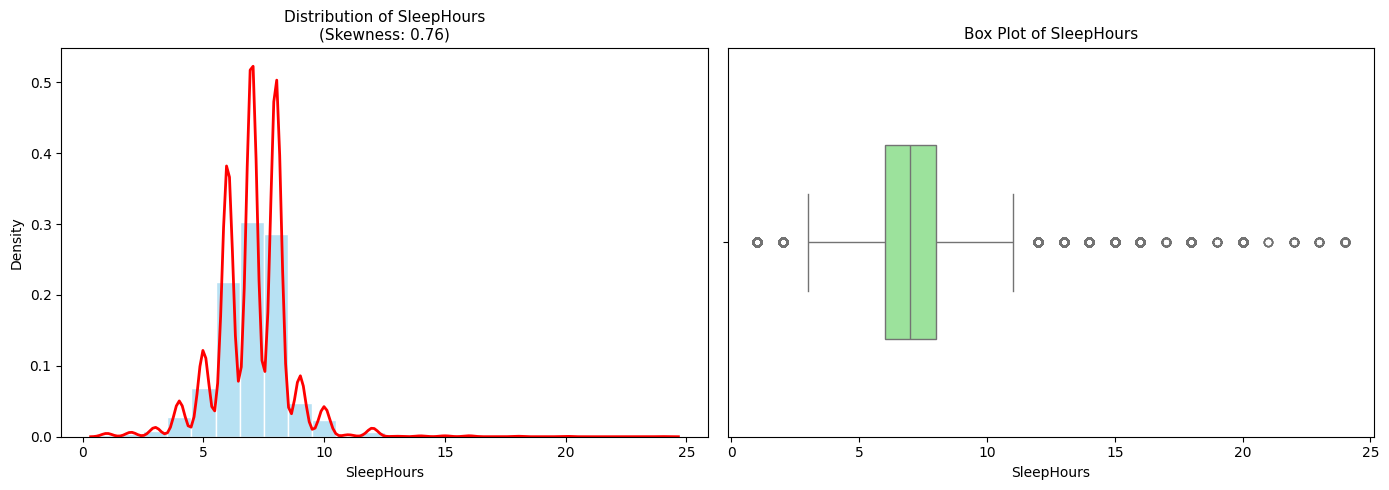

============== Statistics summary: SLEEPHOURS ==============
Counts      : 439679
Mean        : 7.0230
Median      : 7.0000
Std Dev     : 1.5024
Skewness    : 0.7646
Shape       : Moderately Right-Skewed



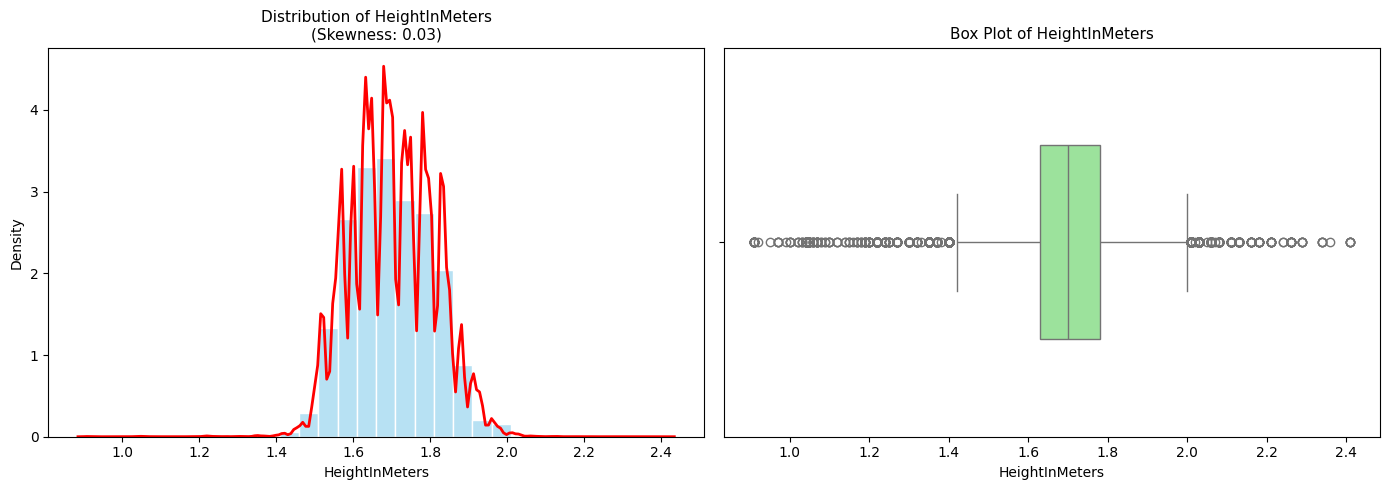

============ Statistics summary: HEIGHTINMETERS ============
Counts      : 416480
Mean        : 1.7027
Median      : 1.7000
Std Dev     : 0.1072
Skewness    : 0.0289
Shape       : Approximately Symmetric



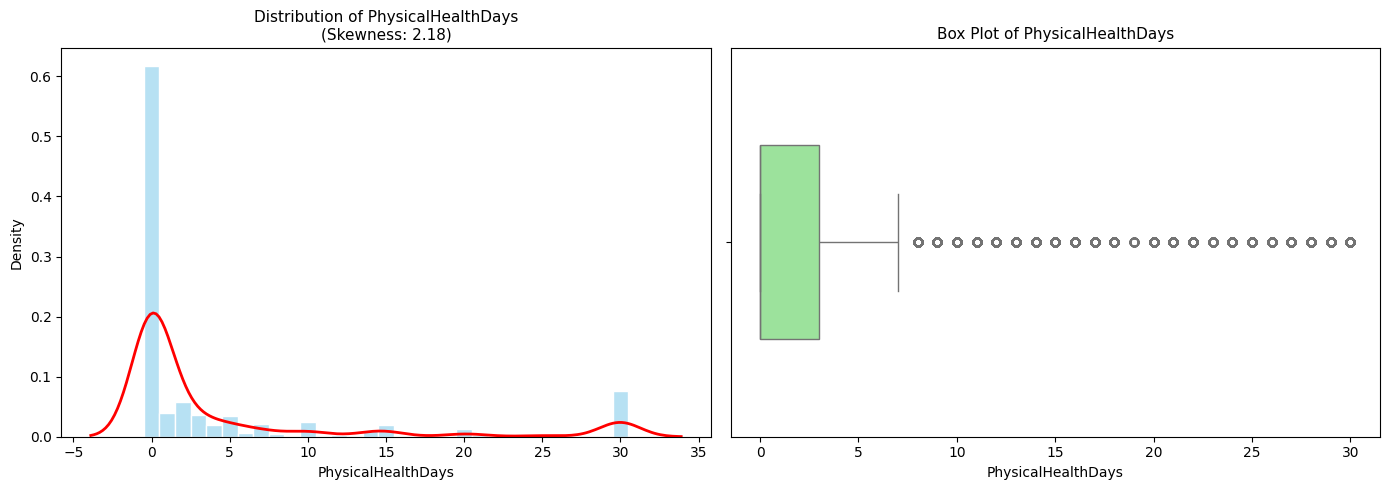

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



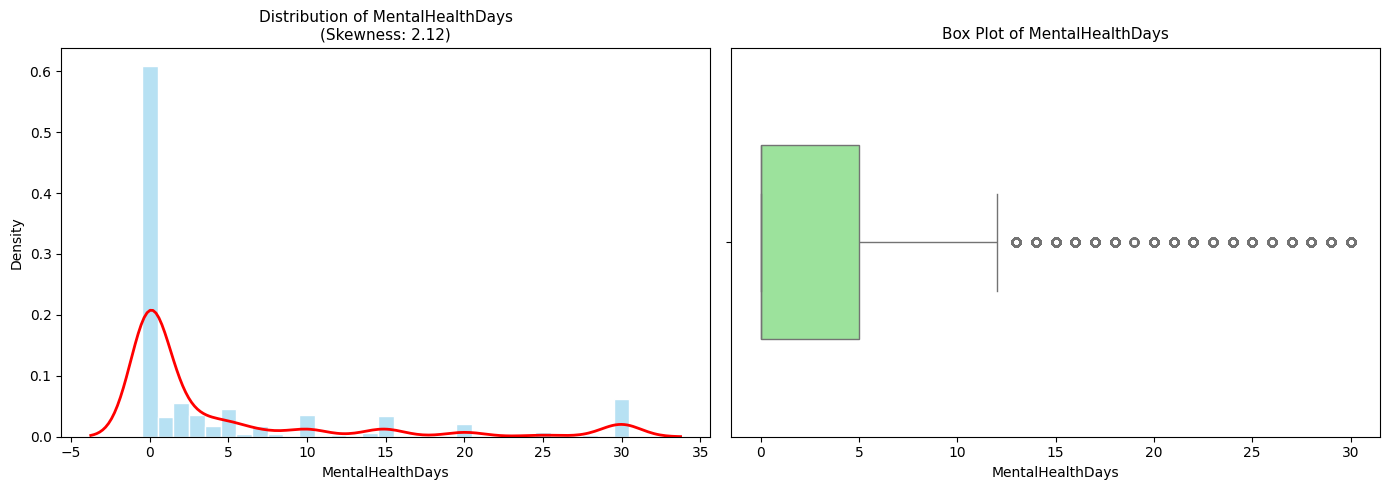

=========== Statistics summary: MENTALHEALTHDAYS ===========
Counts      : 436065
Mean        : 4.3826
Median      : 0.0000
Std Dev     : 8.3875
Skewness    : 2.1232
Shape       : Highly Right-Skewed (Positively Skewed)



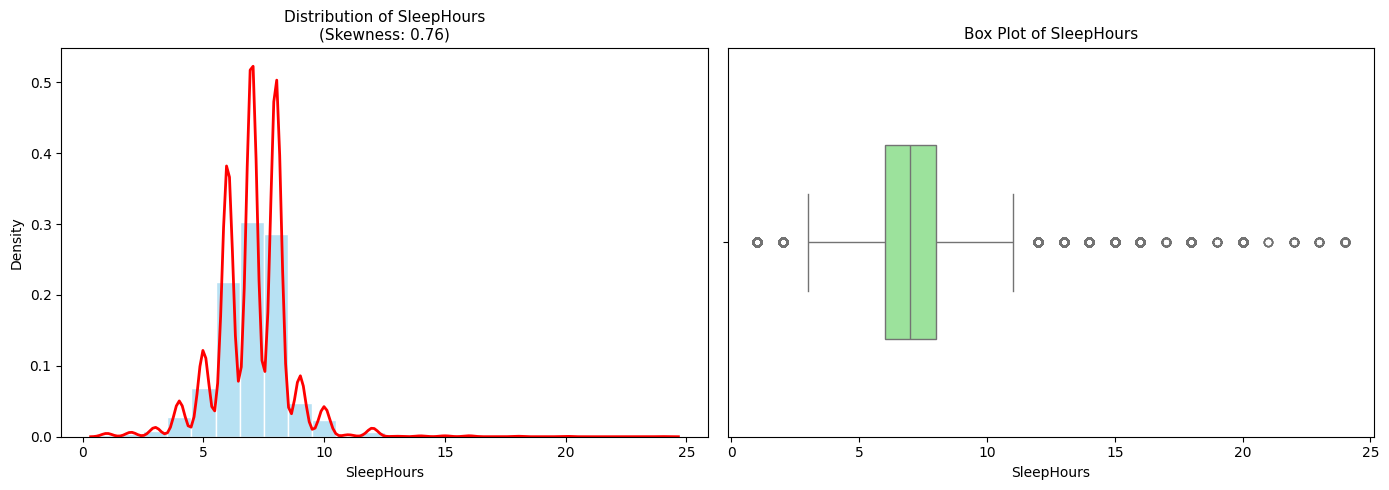

============== Statistics summary: SLEEPHOURS ==============
Counts      : 439679
Mean        : 7.0230
Median      : 7.0000
Std Dev     : 1.5024
Skewness    : 0.7646
Shape       : Moderately Right-Skewed



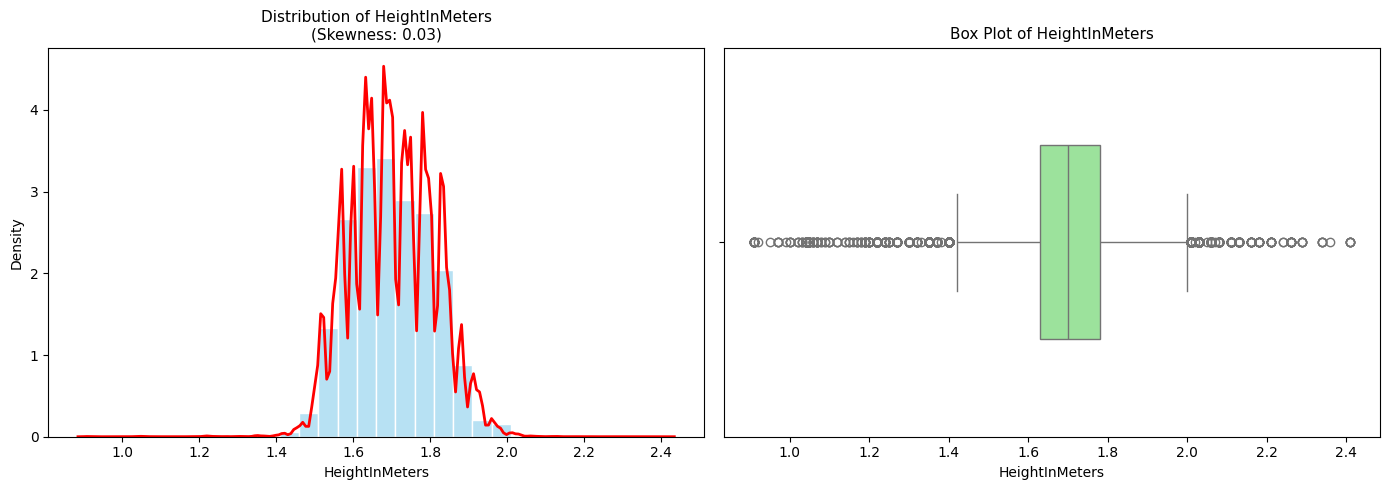

============ Statistics summary: HEIGHTINMETERS ============
Counts      : 416480
Mean        : 1.7027
Median      : 1.7000
Std Dev     : 0.1072
Skewness    : 0.0289
Shape       : Approximately Symmetric



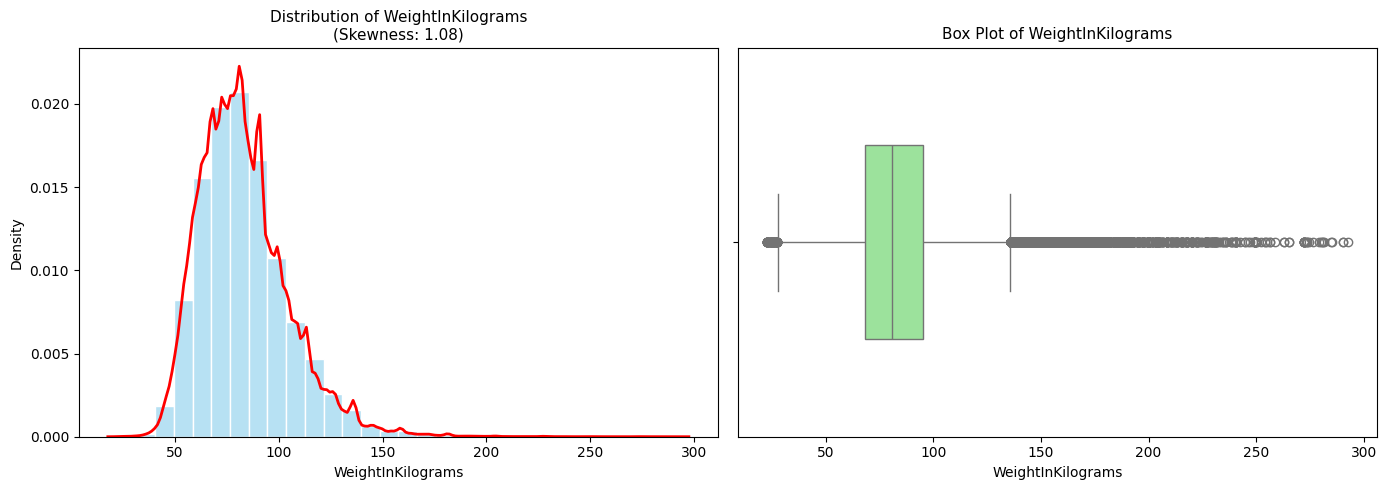

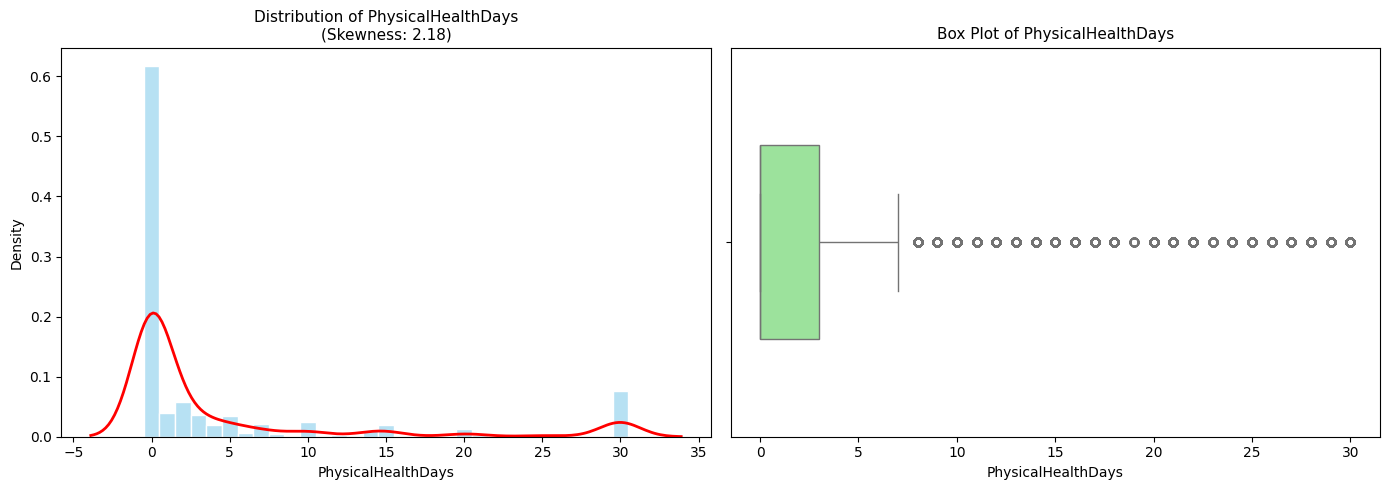

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



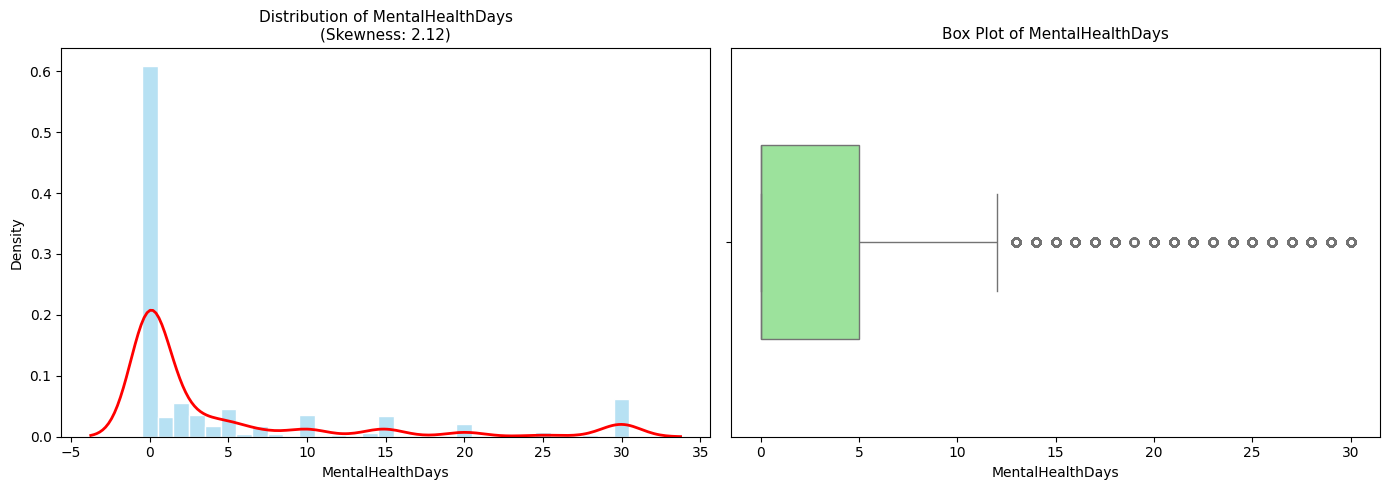

=========== Statistics summary: MENTALHEALTHDAYS ===========
Counts      : 436065
Mean        : 4.3826
Median      : 0.0000
Std Dev     : 8.3875
Skewness    : 2.1232
Shape       : Highly Right-Skewed (Positively Skewed)



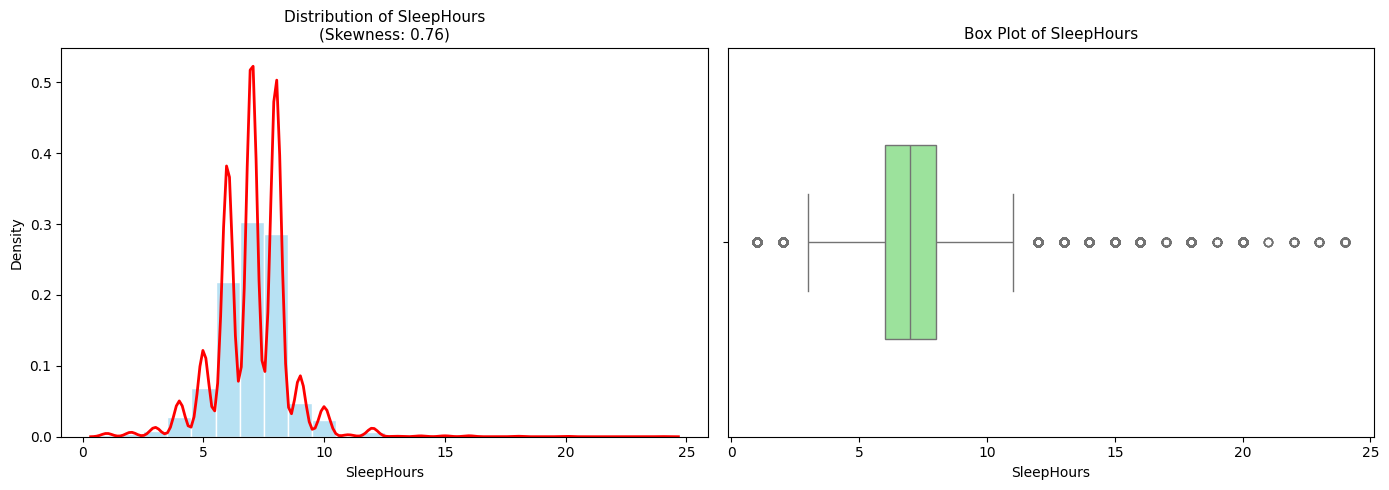

============== Statistics summary: SLEEPHOURS ==============
Counts      : 439679
Mean        : 7.0230
Median      : 7.0000
Std Dev     : 1.5024
Skewness    : 0.7646
Shape       : Moderately Right-Skewed



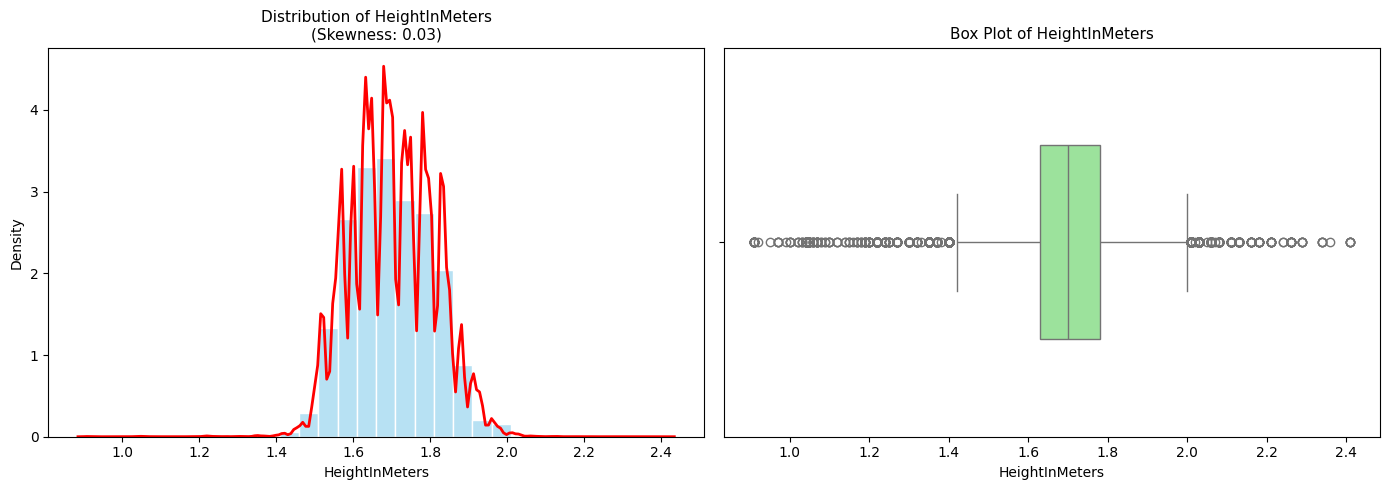

============ Statistics summary: HEIGHTINMETERS ============
Counts      : 416480
Mean        : 1.7027
Median      : 1.7000
Std Dev     : 0.1072
Skewness    : 0.0289
Shape       : Approximately Symmetric



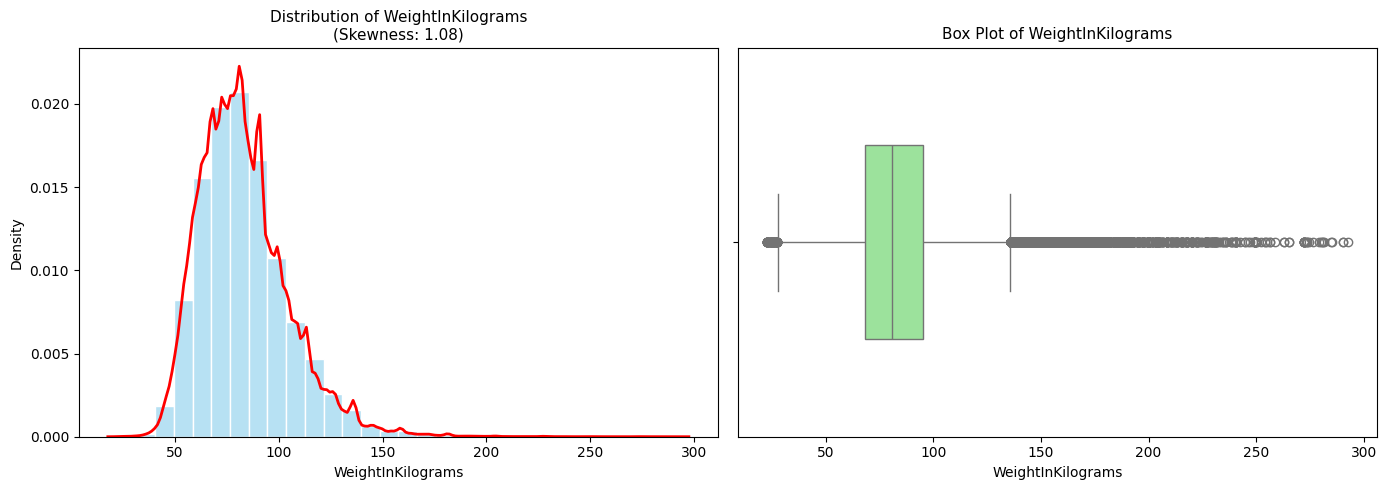

========== Statistics summary: WEIGHTINKILOGRAMS ===========
Counts      : 403054
Mean        : 83.0745
Median      : 80.7400
Std Dev     : 21.4482
Skewness    : 1.0756
Shape       : Highly Right-Skewed (Positively Skewed)



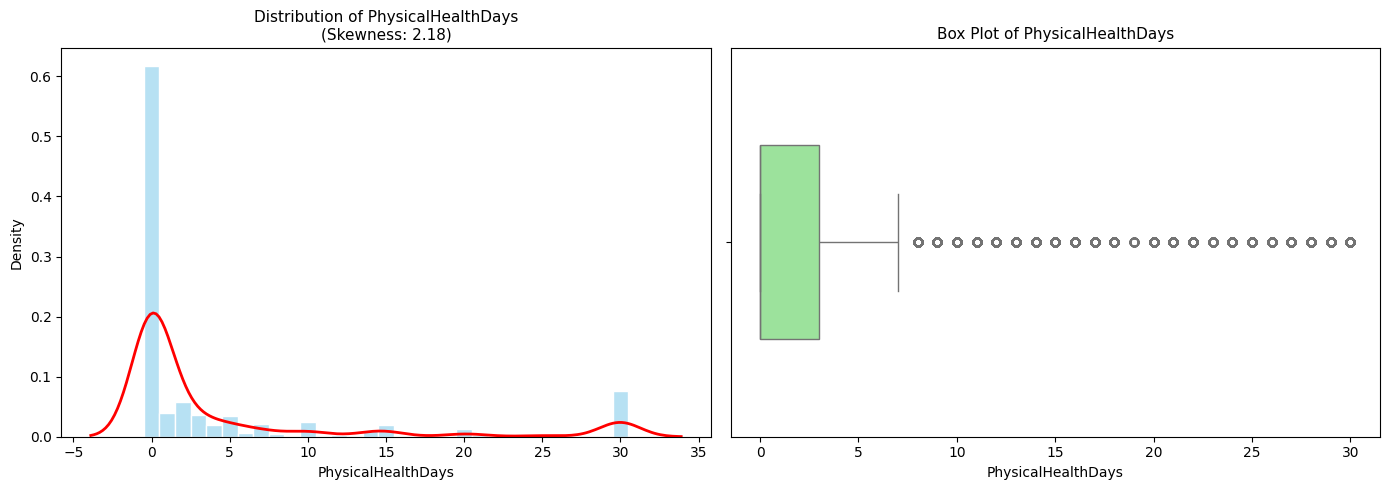

========== Statistics summary: PHYSICALHEALTHDAYS ==========
Counts      : 434205
Mean        : 4.3479
Median      : 0.0000
Std Dev     : 8.6889
Skewness    : 2.1798
Shape       : Highly Right-Skewed (Positively Skewed)



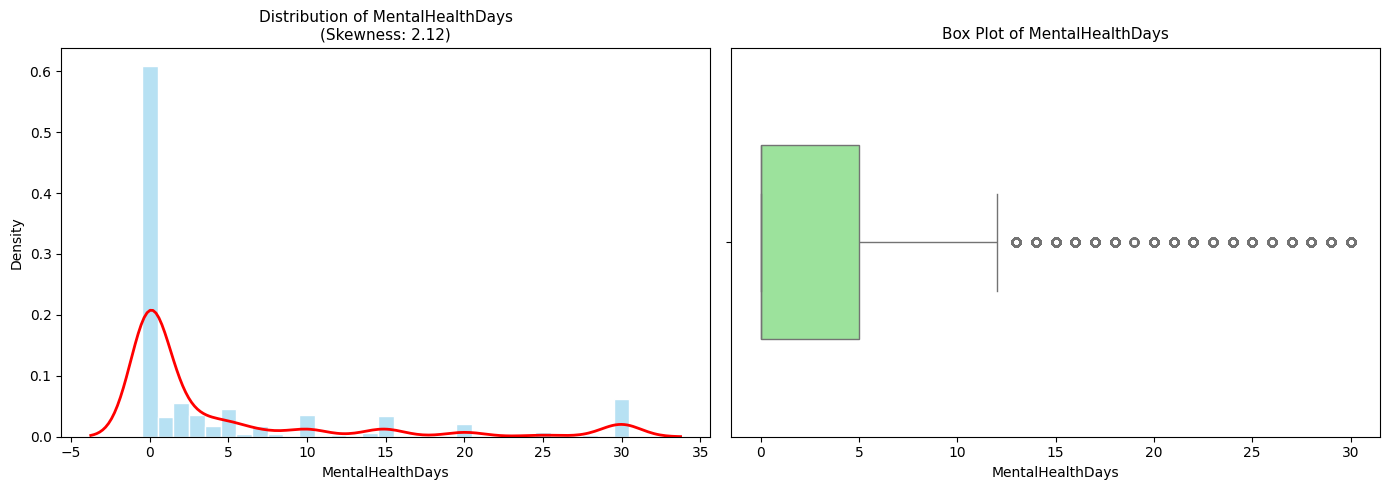

=========== Statistics summary: MENTALHEALTHDAYS ===========
Counts      : 436065
Mean        : 4.3826
Median      : 0.0000
Std Dev     : 8.3875
Skewness    : 2.1232
Shape       : Highly Right-Skewed (Positively Skewed)



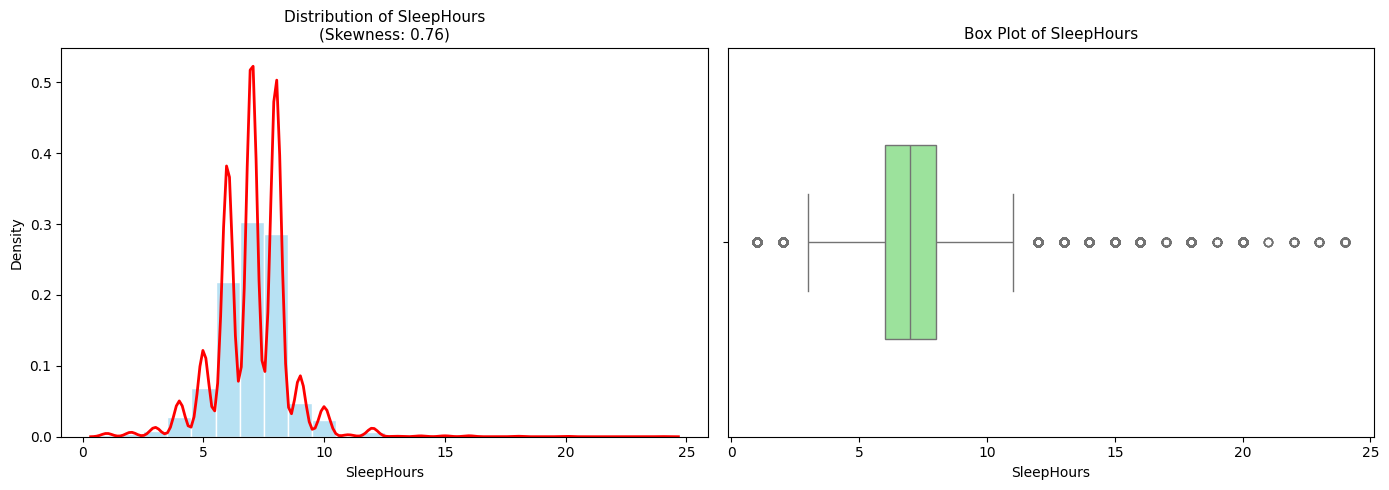

============== Statistics summary: SLEEPHOURS ==============
Counts      : 439679
Mean        : 7.0230
Median      : 7.0000
Std Dev     : 1.5024
Skewness    : 0.7646
Shape       : Moderately Right-Skewed



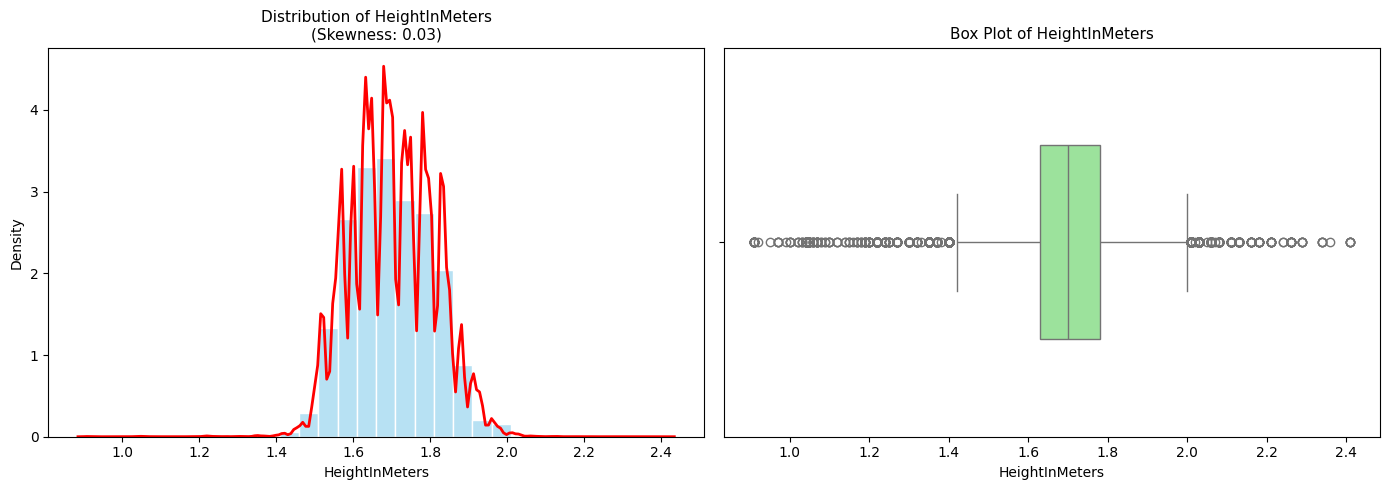

============ Statistics summary: HEIGHTINMETERS ============
Counts      : 416480
Mean        : 1.7027
Median      : 1.7000
Std Dev     : 0.1072
Skewness    : 0.0289
Shape       : Approximately Symmetric



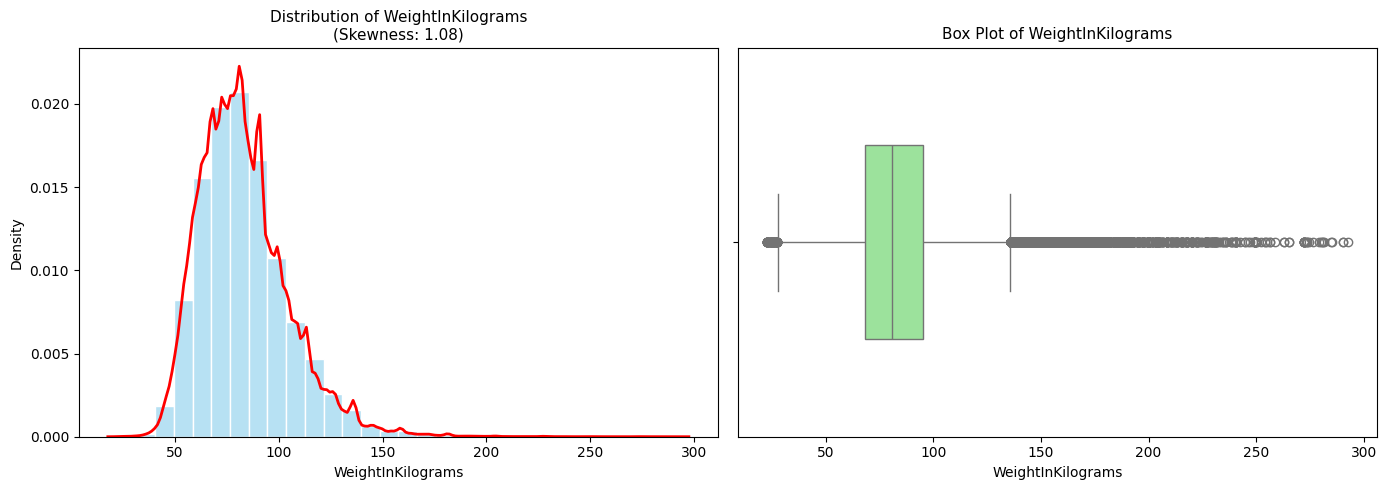

========== Statistics summary: WEIGHTINKILOGRAMS ===========
Counts      : 403054
Mean        : 83.0745
Median      : 80.7400
Std Dev     : 21.4482
Skewness    : 1.0756
Shape       : Highly Right-Skewed (Positively Skewed)



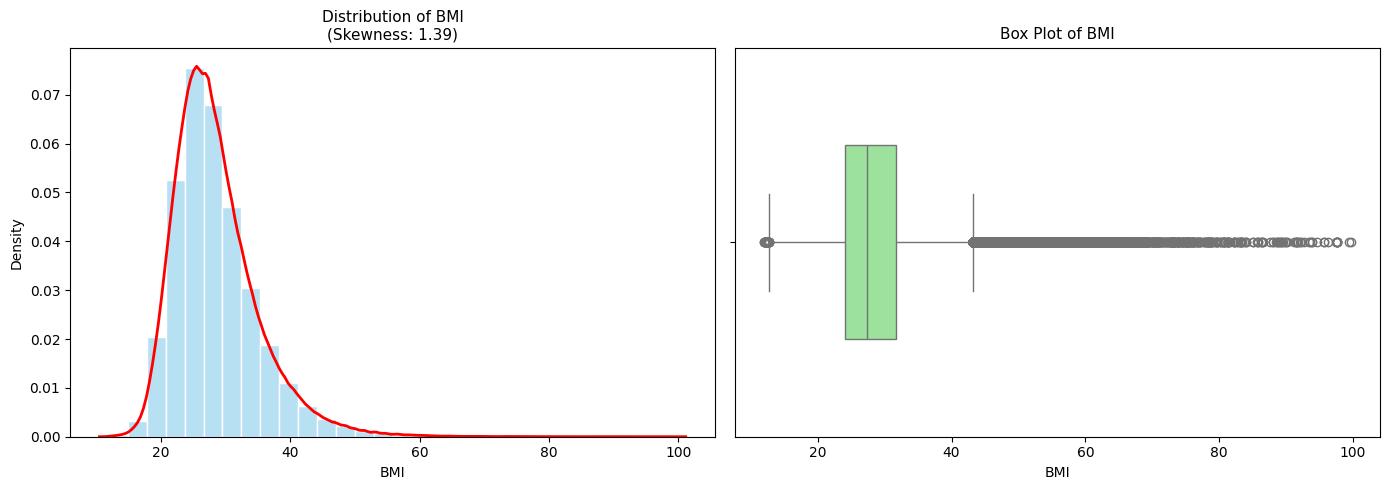

================= Statistics summary: BMI ==================
Counts      : 396326
Mean        : 28.5298
Median      : 27.4400
Std Dev     : 6.5549
Skewness    : 1.3877
Shape       : Highly Right-Skewed (Positively Skewed)



In [ ]:
for col in numerical_columns:
    # 1. Setup Data
    data = df[col].dropna()
    if len(data) == 0:
        continue
    
    # 2. Calculate Statistics
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skew_val = data.skew()
    
    # 3. Create Figure
    plt.figure(figsize=(14, 5))
    
    # --- Plot 1: Histogram (Density Scale) + KDE ---
    plt.subplot(1, 2, 1)
    
    # Logic: Check if data is "Discrete-like" (few unique values, e.g., integers < 50)
    is_discrete = data.nunique() <= 50
    
    if is_discrete:
        # For discrete data (e.g., SleepHours, Days):
        # 1. discrete=True fixes the "thin" bars
        sns.histplot(data, stat="density", discrete=True, color='skyblue', alpha=0.6, kde=False, edgecolor='white')
        
        # 2. bw_adjust=2.0 SMOOTHS the wavy red line so it doesn't oscillate on every integer
        sns.kdeplot(data, color='red', linewidth=2, bw_adjust=2.0)
    else:
        # For continuous data (e.g., BMI, Weight):
        sns.histplot(data, stat="density", bins=30, color='skyblue', alpha=0.6, kde=False, edgecolor='white')
        sns.kdeplot(data, color='red', linewidth=2)
    
    plt.title(f'Distribution of {col}\n(Skewness: {skew_val:.2f})', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Density')

    # --- Plot 2: Box Plot ---
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data, color='lightgreen', width=0.5)
    plt.title(f'Box Plot of {col}', fontsize=11)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()
    
    # 4. Print Statistics (Formatted)
    print(f" Statistics summary: {col.upper()} ".center(60, "="))
    print(f"Counts      : {len(data)}")
    print(f"Mean        : {mean_val:.4f}")
    print(f"Median      : {median_val:.4f}")
    print(f"Std Dev     : {std_val:.4f}")
    print(f"Skewness    : {skew_val:.4f}")
    
    # Interpret Skewness
    skew_desc = "Approximately Symmetric"
    if skew_val > 1:
        skew_desc = "Highly right-skewed (Positively skewed)"
    elif skew_val < -1:
        skew_desc = "Highly left-skewed (Negatively skewed)"
    elif 0.5 < skew_val <= 1:
        skew_desc = "Moderately right-skewed"
    elif -1 <= skew_val < -0.5:
        skew_desc = "Moderately left-skewed"
        
    print(f"Shape       : {skew_desc}")
    print("=" * 60 + "\n")     
    print(f"Shape       : {skew_desc}")
    print("=" * 60 + "\n")

#### Range & Outliers: 
- What are the minimum and maximum values? 
- Are min/max values reasonable, or do they indicate errors? 
- Identify outliers using box plots, IQR method, or z-scores 
- Are outliers genuine extreme values or data entry errorissing) 

In [9]:

REAL_LIFE_LIMITS = {
    'PhysicalHealthDays': (0, 30, "days/month"),
    'MentalHealthDays':   (0, 30, "days/month"),
    'SleepHours':         (1, 24, "hours/day"),     # <1 is rare/fatal long term, >24 is impossible
    'HeightInMeters':     (0.5, 2.8, "meters"),     # Tallest human ~2.72m, shortest adult ~0.54m
    'WeightInKilograms':  (25, 640, "kg"),          # Heaviest human ~635kg
    'BMI':                (10, 150, "index")        # <10 is fatal, >150 is extremely rare/likely e'for col in numerical_columns:
}

for col in numerical_columns:
    data = df[col].dropna()
    if len(data) == 0: continue

    min_val = data.min()
    max_val = data.max()
    
    # IQR Method calculations
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify Outliers
    low_outliers = data[data < lower_bound]
    high_outliers = data[data > upper_bound]
    total_outliers = len(low_outliers) + len(high_outliers)
    print(f" Range and outliers: {col.upper()} ".center(80, "="))

    print(f"1. Min/Max Values:")
    print(f"   Minimum: {min_val}")
    print(f"   Maximum: {max_val}")
    print("-" * 80)
    min_reasonable = min_val >= lower_bound
    max_reasonable = max_val <= upper_bound
    
    print(f"2. Reasonableness Check (vs. IQR Bounds [{lower_bound:.2f}, {upper_bound:.2f}]):")
    if min_reasonable:
        print(f"   Min value is statistically reasonable (inside lower bound).")
    else:
        print(f"   Min value is a statistical outlier (smaller than {lower_bound:.2f}).")
    if max_reasonable:
        print(f"   Max value is statistically reasonable (inside upper bound).")
    else:
        print(f"   Max value is a statistical outlier (larger than upper bound).")
    print("-" * 80)

    print(f"3. Outlier Identification:")
    print(f"   Total Outliers: {total_outliers} ({total_outliers/len(data)*100:.2f}% of data)")
    print(f"   - Below Lower Bound: {len(low_outliers)}")
    print(f"   - Above Upper Bound: {len(high_outliers)}")
    print("-" * 80)
    
    print(f"\n4. Final Verdict: Genuine Extreme vs. Data Error?")
    
    # Logic for High Outliers
    if len(high_outliers) > 0:
        extreme_highs = high_outliers.nlargest(5).values
        limit_max = REAL_LIFE_LIMITS[col][1]
        unit = REAL_LIFE_LIMITS[col][2]
        
        # If the statistical outlier is within real-life limits -> GENUINE
        if max_val <= limit_max:
             print(f"   Genuine: The high outliers {extreme_highs} are statistically high\n"
                   f"      but physically possible (within {limit_max} {unit}).\n"
                   f"      -> These represent valid, extreme cases (e.g., Obesity, Insomnia).")
        # If the statistical outlier exceeds real-life limits -> ERROR
        else:
             print(f"   Data error: The values {extreme_highs} exceed the\n"
                   f"      physically possible limit of {limit_max} {unit}.\n"
                   f"      -> These are likely data entry errors.")
    
    else:
        print(" No high outliers detected.")

    print("\n" + "="*80 + "\n")

==================== Range and outliers: PHYSICALHEALTHDAYS ====================
1. Min/Max Values:
   Minimum: 0.0
   Maximum: 30.0
--------------------------------------------------------------------------------
2. Reasonableness Check (vs. IQR Bounds [-4.50, 7.50]):
   Min value is statistically reasonable (inside lower bound).
   Max value is a statistical outlier (larger than upper bound).
--------------------------------------------------------------------------------
3. Outlier Identification:
   Total Outliers: 72269 (16.64% of data)
   - Below Lower Bound: 0
   - Above Upper Bound: 72269
--------------------------------------------------------------------------------

4. Final Verdict: Genuine Extreme vs. Data Error?
   Genuine: The high outliers [30. 30. 30. 30. 30.] are statistically high
      but physically possible (within 30 days/month).
      -> These represent valid, extreme cases (e.g., Obesity, Insomnia).


===================== Range and outliers: MENTALHEALTHDAYS =

#### Data Quality: 
- What percentage of values are missing? 
- Are there any impossible values? (e.g., negative ages, prices = 0) 
- Are there placeholder values? (e.g., 999, -1, 0 used to indicate missing) 

In [10]:
# Data Quality Analysis for Numerical Columns

SUSPICIOUS_PLACEHOLDERS = [-1, -9, -99, -999, 999, 9999, 0]
REAL_LIFE_LIMITS = {
    'PhysicalHealthDays': (0, 30),
    'MentalHealthDays':   (0, 30),
    'SleepHours':         (0, 24),
    'HeightInMeters':     (0.3, 3.0),  
    'WeightInKilograms':  (20, 650),   
    'BMI':                (10, 150)    
}

for col in numerical_columns:
    data_all = df[col]  # Include NaN
    data_clean = df[col].dropna()
    
    if len(data_clean) == 0:
        continue
    
    print(f" Data Quality: {col.upper()} ".center(70, "="))
    
    # 1. Missing Values Analysis
    missing_count = data_all.isnull().sum()
    missing_pct = (missing_count / len(data_all)) * 100
    
    print(f"1. Missing Values:")
    print(f"   Missing count: {missing_count:,}")
    print(f"   Missing percentage: {missing_pct:.2f}%")
    
    if missing_pct > 5:
        print(f"   WARNING: High missing rate (>{missing_pct:.1f}%)")
    elif missing_pct > 0:
        print(f"   Moderate missing rate")
    else:
        print(f"   No missing values")
    
    print("-" * 70)
    
    # 2. Impossible Values Check
    min_limit, max_limit = REAL_LIFE_LIMITS.get(col, (None, None))
    
    print(f"2. Impossible Values (Real-world limits):")
    
    if min_limit is not None and max_limit is not None:
        impossible_low = data_clean[data_clean < min_limit]
        impossible_high = data_clean[data_clean > max_limit]
        total_impossible = len(impossible_low) + len(impossible_high)
        
        print(f"   Expected range: [{min_limit} - {max_limit}]")
        print(f"   Actual range: [{data_clean.min()} - {data_clean.max()}]")
        print(f"   Impossible values: {total_impossible} ({total_impossible/len(data_clean)*100:.2f}%)")
        
        if len(impossible_low) > 0:
            print(f"     - Too low (<{min_limit}): {len(impossible_low)} values")
            if len(impossible_low) <= 5:
                print(f"       Examples: {impossible_low.tolist()}")
        
        if len(impossible_high) > 0:
            print(f"     - Too high (>{max_limit}): {len(impossible_high)} values")
            if len(impossible_high) <= 5:
                print(f"       Examples: {impossible_high.nlargest(5).tolist()}")
                
        if total_impossible == 0:
            print(f"   All values are within realistic bounds")
    else:
        print(f"   No predefined limits for this column")
    
    print("-" * 70)
    
    # 3. Placeholder Values Detection
    print(f"3. Placeholder Values:")
    
    placeholder_found = []
    for placeholder in SUSPICIOUS_PLACEHOLDERS:
        count = (data_clean == placeholder).sum()
        if count > 0:
            percentage = (count / len(data_clean)) * 100
            placeholder_found.append((placeholder, count, percentage))
    
    if placeholder_found:
        print(f"   Suspicious placeholder values detected:")
        for placeholder, count, pct in placeholder_found:
            print(f"     - Value {placeholder}: {count} times ({pct:.2f}%)")
            
        # Special attention to zeros (might be legitimate)
        zero_count = (data_clean == 0).sum()
        if zero_count > 0:
            zero_pct = (zero_count / len(data_clean)) * 100
            if zero_pct > 10:
                print(f"   High zero percentage ({zero_pct:.1f}%) - investigate if legitimate")
    else:
        print(f"   No obvious placeholder values detected")
    
    print("-" * 70)
    
    # 4. Data Quality Summary
    print(f"4. Quality Summary:")
    
    quality_issues = []
    if missing_pct > 5:
        quality_issues.append(f"High missing rate ({missing_pct:.1f}%)")
    
    if min_limit is not None and max_limit is not None:
        impossible_count = len(data_clean[(data_clean < min_limit) | (data_clean > max_limit)])
        if impossible_count > 0:
            quality_issues.append(f"{impossible_count} impossible values")
    
    if placeholder_found:
        quality_issues.append(f"Potential placeholder values")
    
    if quality_issues:
        print(f"   Issues found: {', '.join(quality_issues)}")
    else:
        print(f"   Good data quality - no major issues detected")
    
    print("=" * 70 + "\n")

================== Data Quality: PHYSICALHEALTHDAYS ==================
1. Missing Values:
   Missing count: 10,927
   Missing percentage: 2.45%
   Moderate missing rate
----------------------------------------------------------------------
2. Impossible Values (Real-world limits):
   Expected range: [0 - 30]
   Actual range: [0.0 - 30.0]
   Impossible values: 0 (0.00%)
   All values are within realistic bounds
----------------------------------------------------------------------
3. Placeholder Values:
   Suspicious placeholder values detected:
     - Value 0: 267819 times (61.68%)
   High zero percentage (61.7%) - investigate if legitimate
----------------------------------------------------------------------
4. Quality Summary:
   Issues found: Potential placeholder values

=================== Data Quality: MENTALHEALTHDAYS ===================
1. Missing Values:
   Missing count: 9,067
   Missing percentage: 2.04%
   Moderate missing rate
---------------------------------------------

### 2.2.6 Categorical columns analysis 

### Finding all categorical columns

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns detected: {categorical_columns}")


Categorical columns detected: ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


### Value Distribution: 
- How many unique/distinct values are there? 
- What are the top 5-10 most frequent values? 
- Create visualizations: bar charts, count plots 
- Is the distribution balanced or highly imbalanced? 

========================== Value distribution: State ===========================
1. Basic information:
   Total values: 445,132
   Missing values: 0 (0.00%)
   Unique values: 54
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Washington                  26,152 (  5.9%)
    2. New York                    17,800 (  4.0%)
    3. Minnesota                   16,821 (  3.8%)
    4. Ohio                        16,487 (  3.7%)
    5. Maryland                    16,418 (  3.7%)
    6. Texas                       14,245 (  3.2%)
    7. Florida                     13,393 (  3.0%)
    8. Wisconsin                   11,276 (  2.5%)
    9. Kansas                      11,247 (  2.5%)
   10. Massachusetts               11,029 (  2.5%)
   ... and 44 more categories
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 5.9% of data
   Least frequent categ

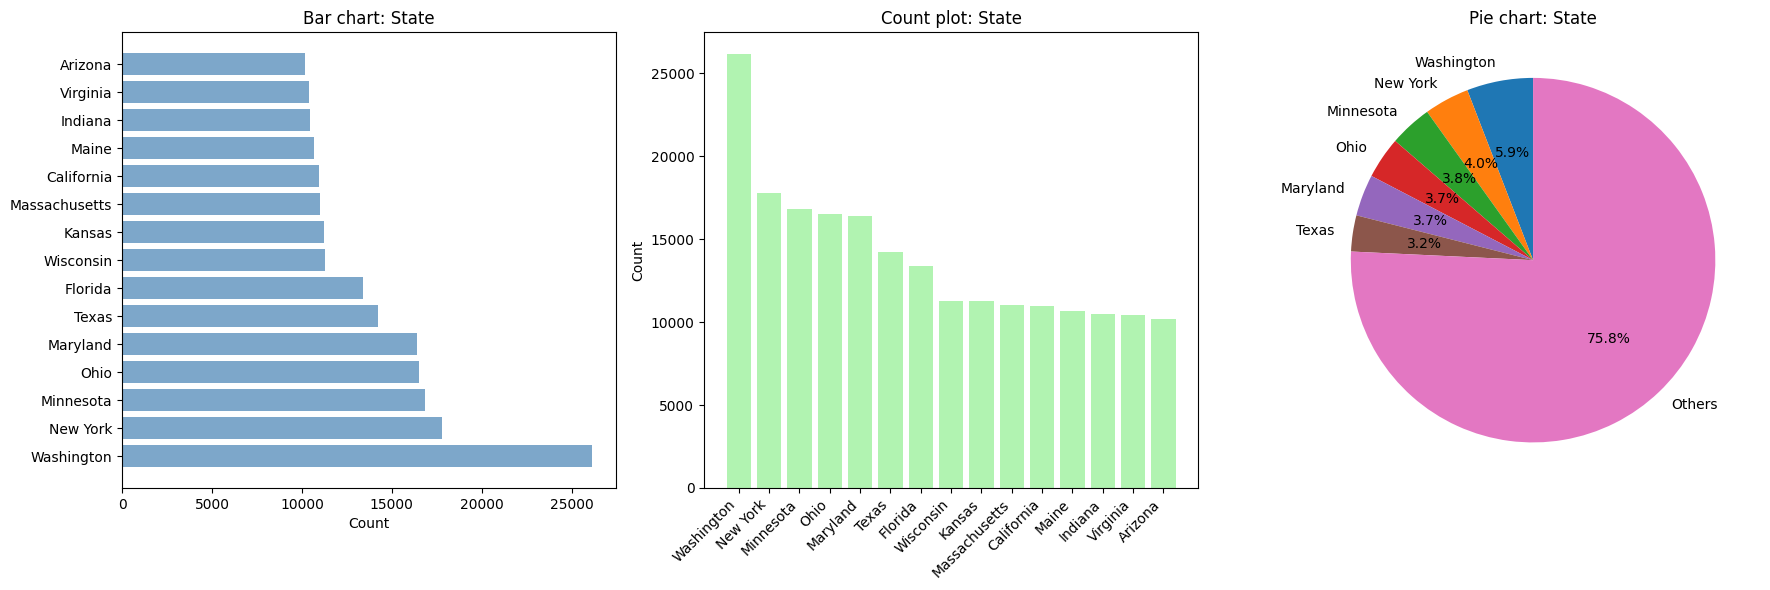

   Remaining 39 categories represent 53.4% of data

=========================== Value distribution: Sex ============================
1. Basic information:
   Total values: 445,132
   Missing values: 0 (0.00%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Female                     235,893 ( 53.0%)
    2. Male                       209,239 ( 47.0%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 53.0% of data
   Least frequent category: 47.0% of data
   Balance score (Gini): 0.498 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 0 (0.00%)
   Unique values: 2
--------------------------------------------------------------------------------


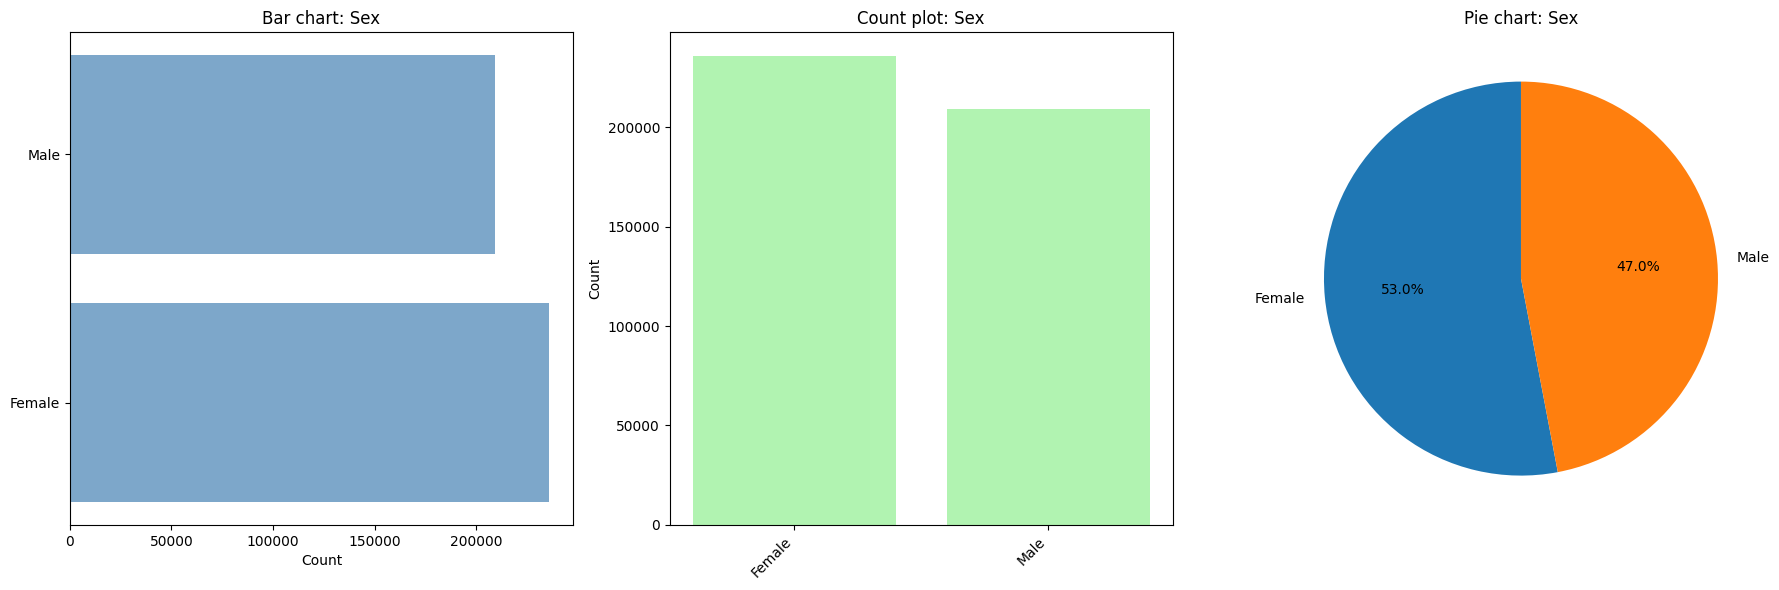

   Chart shows all categories

====================== Value distribution: GeneralHealth =======================
1. Basic information:
   Total values: 445,132
   Missing values: 1,198 (0.27%)
   Unique values: 5
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Very good                  148,444 ( 33.4%)
    2. Good                       143,598 ( 32.3%)
    3. Excellent                   71,878 ( 16.2%)
    4. Fair                        60,273 ( 13.6%)
    5. Poor                        19,741 (  4.4%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 33.4% of data
   Least frequent category: 4.4% of data
   Balance score (Gini): 0.737 (0=balanced, 1=imbalanced)
   Status: Relatively imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445

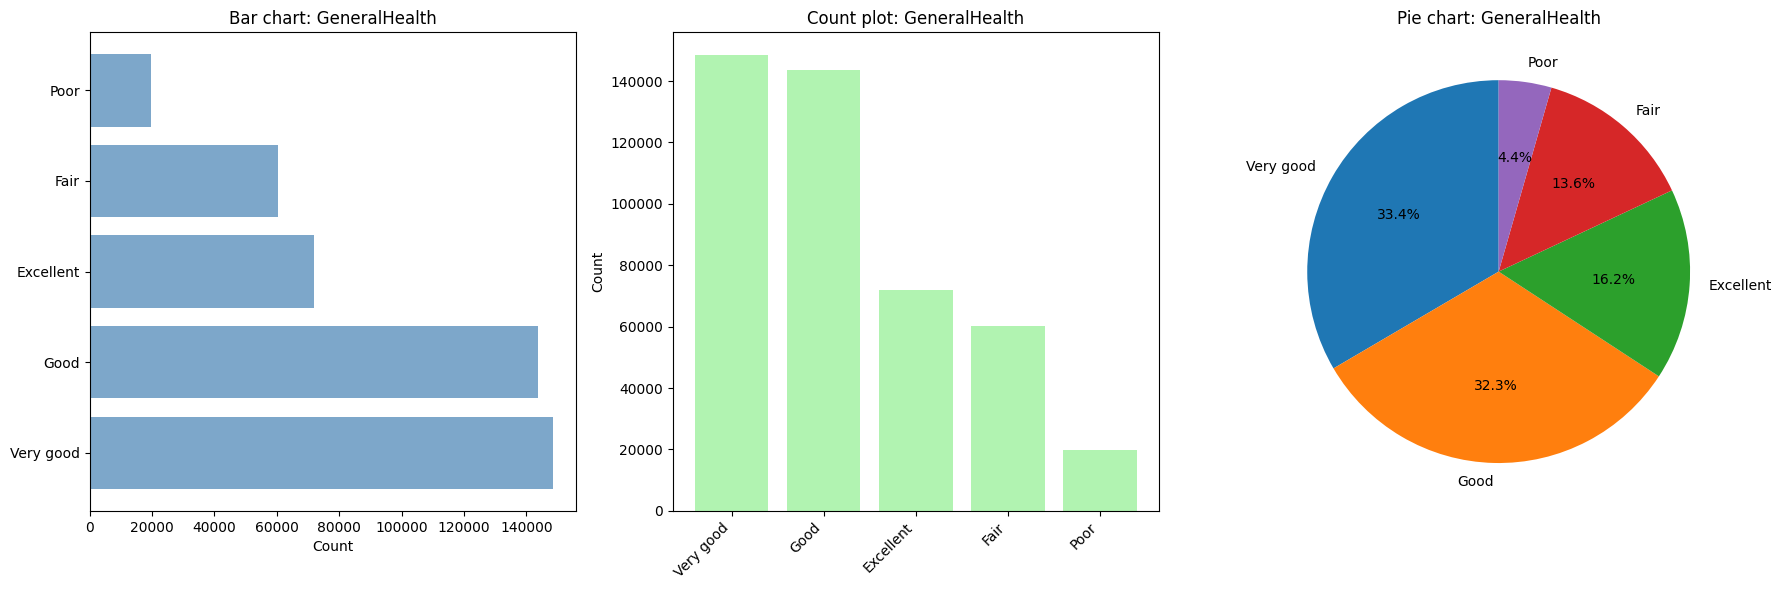

   Chart shows all categories

===================== Value distribution: LastCheckupTime ======================
1. Basic information:
   Total values: 445,132
   Missing values: 8,308 (1.87%)
   Unique values: 4
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Within past year (anytime less than 12 months ago)  350,944 ( 80.3%)
    2. Within past 2 years (1 year but less than 2 years ago)   41,919 (  9.6%)
    3. Within past 5 years (2 years but less than 5 years ago)   24,882 (  5.7%)
    4. 5 or more years ago         19,079 (  4.4%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 80.3% of data
   Least frequent category: 4.4% of data
   Balance score (Gini): 0.340 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic info

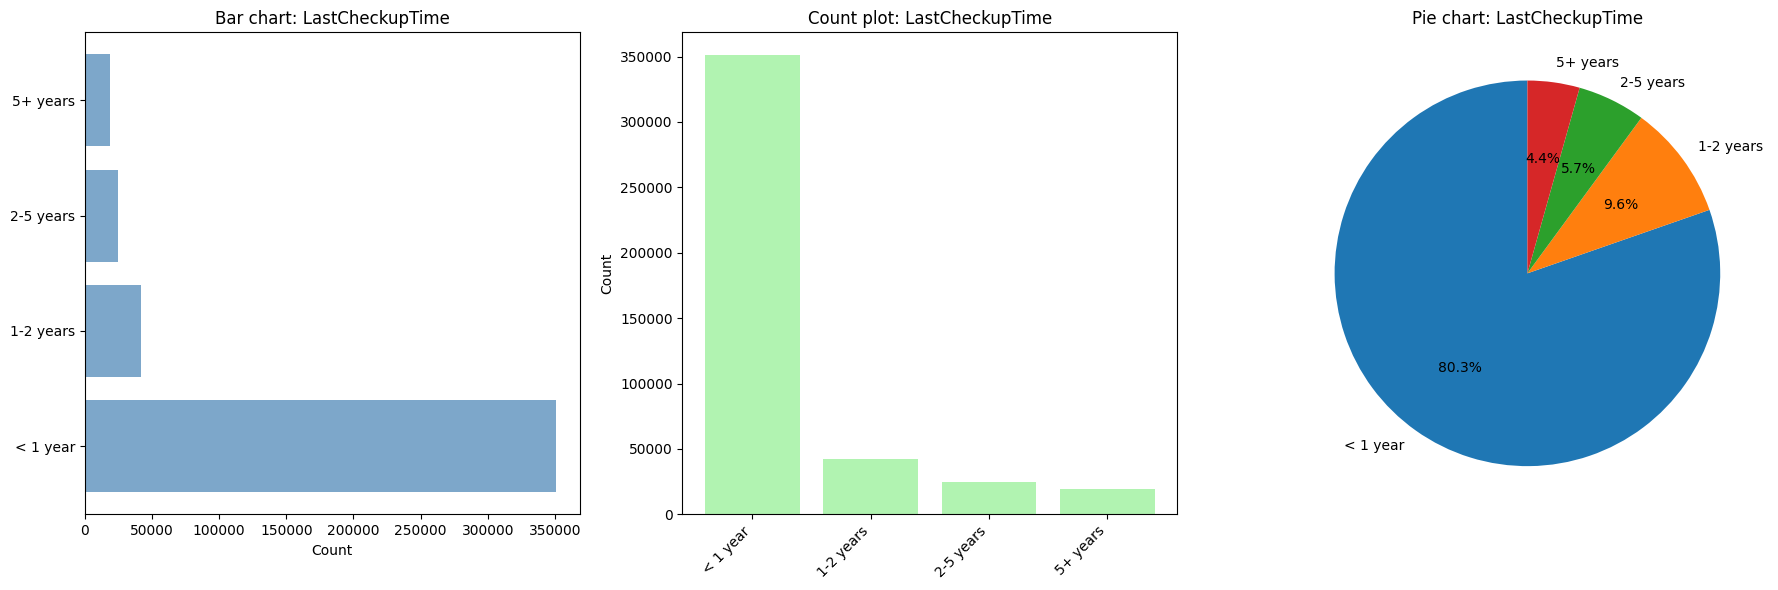

   Chart shows all categories

==================== Value distribution: PhysicalActivities ====================
1. Basic information:
   Total values: 445,132
   Missing values: 1,093 (0.25%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Yes                        337,559 ( 76.0%)
    2. No                         106,480 ( 24.0%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 76.0% of data
   Least frequent category: 24.0% of data
   Balance score (Gini): 0.365 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 1,093 (0.25%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most fr

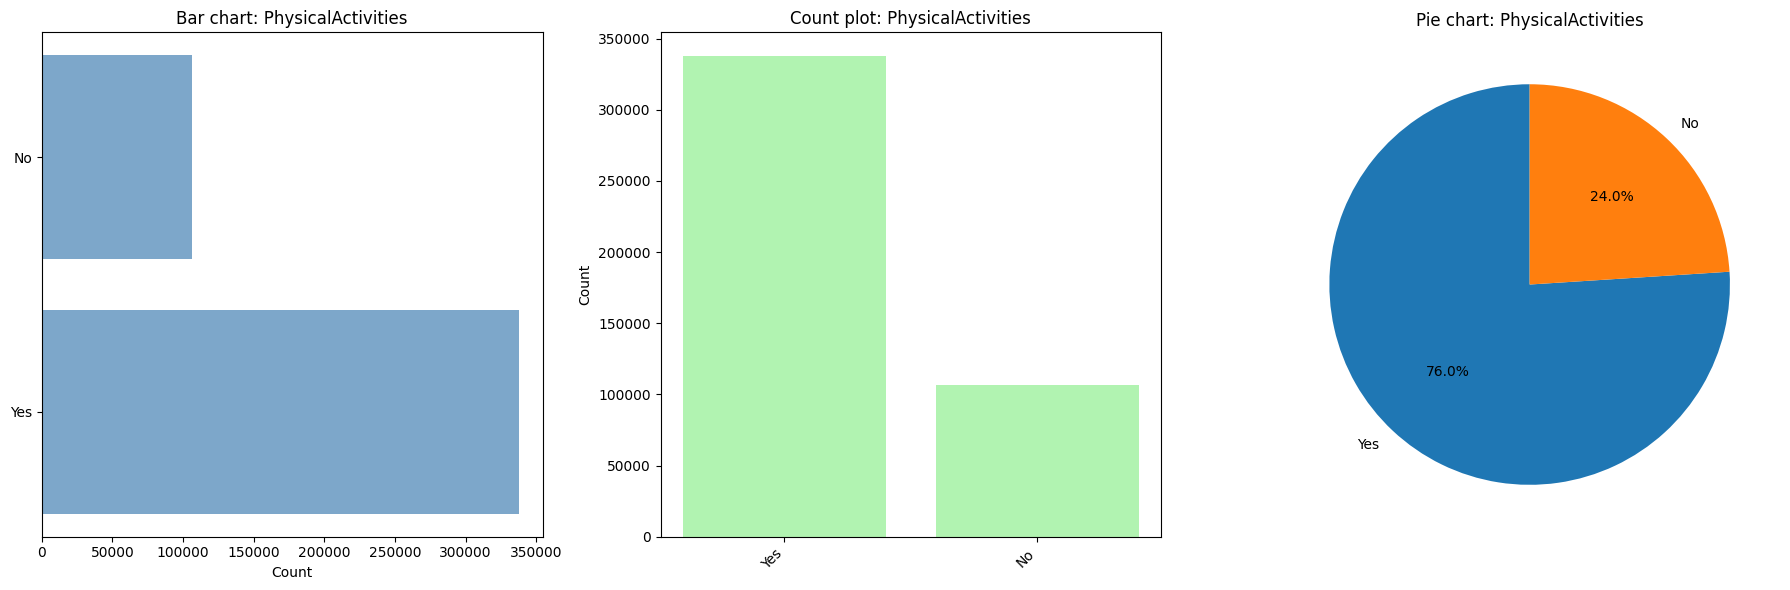

   Chart shows all categories

======================= Value distribution: RemovedTeeth =======================
1. Basic information:
   Total values: 445,132
   Missing values: 11,360 (2.55%)
   Unique values: 4
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. None of them               233,455 ( 53.8%)
    2. 1 to 5                     129,294 ( 29.8%)
    3. 6 or more, but not all      45,570 ( 10.5%)
    4. All                         25,453 (  5.9%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 53.8% of data
   Least frequent category: 5.9% of data
   Balance score (Gini): 0.607 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 11,360 (2.55%)
   Unique v

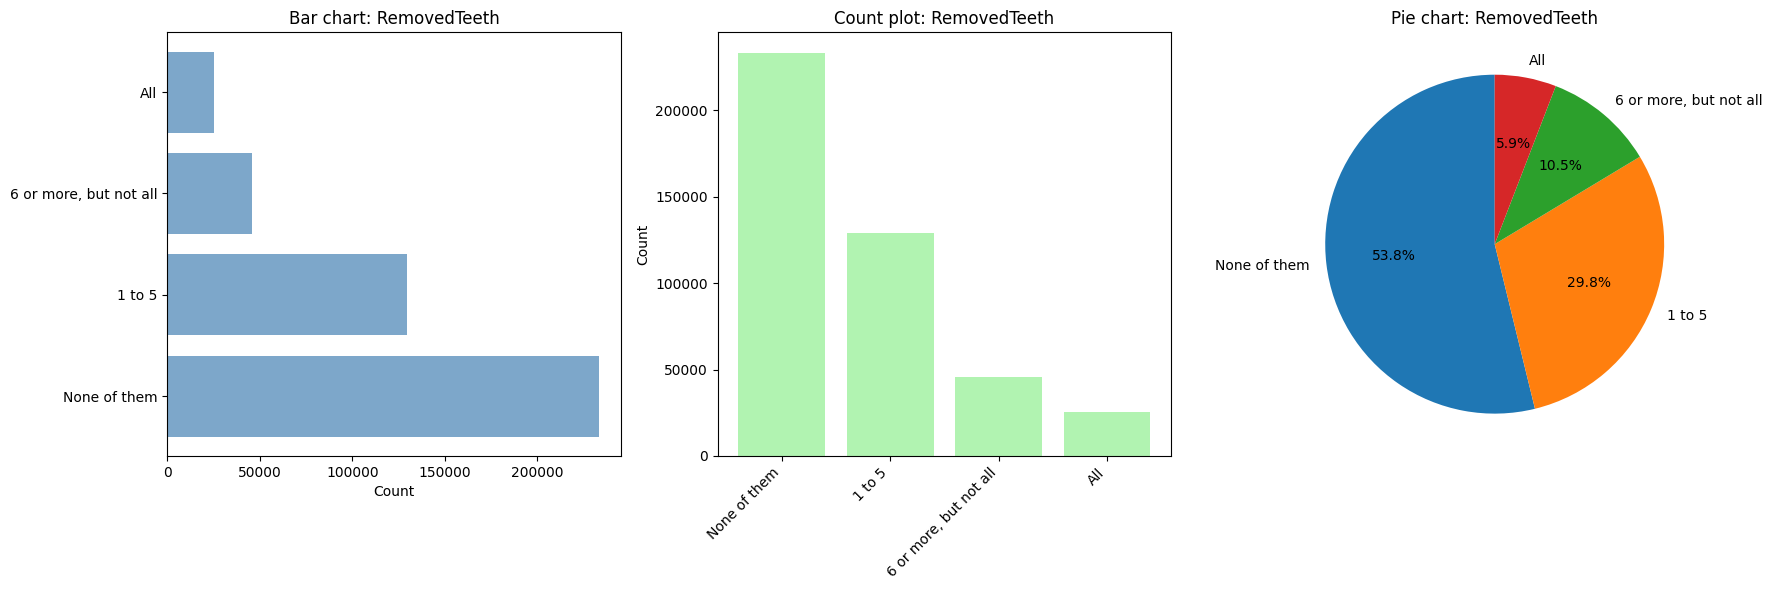

   Chart shows all categories

====================== Value distribution: HadHeartAttack ======================
1. Basic information:
   Total values: 445,132
   Missing values: 3,065 (0.69%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         416,959 ( 94.3%)
    2. Yes                         25,108 (  5.7%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 94.3% of data
   Least frequent category: 5.7% of data
   Balance score (Gini): 0.107 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 3,065 (0.69%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most 

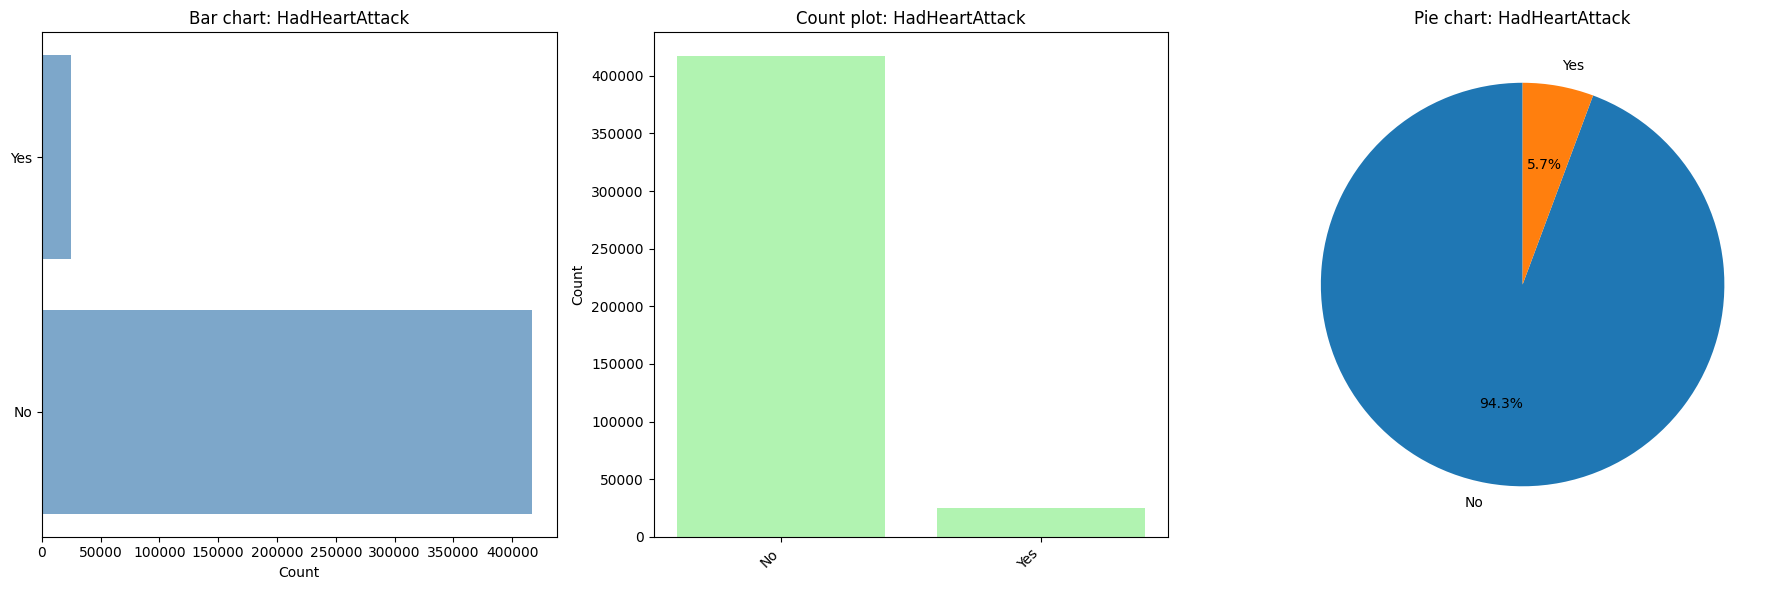

   Chart shows all categories

======================== Value distribution: HadAngina =========================
1. Basic information:
   Total values: 445,132
   Missing values: 4,405 (0.99%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         414,176 ( 94.0%)
    2. Yes                         26,551 (  6.0%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 94.0% of data
   Least frequent category: 6.0% of data
   Balance score (Gini): 0.113 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 4,405 (0.99%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most 

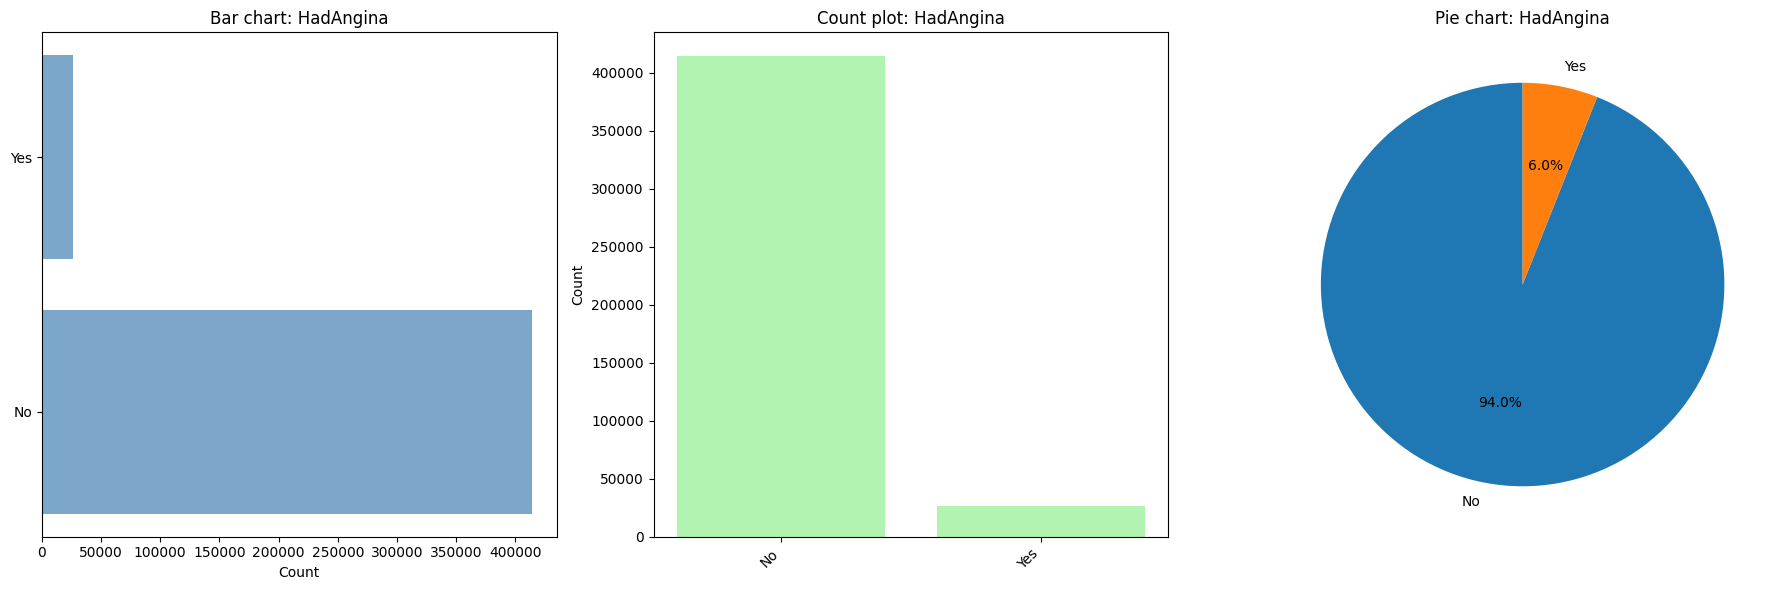

   Chart shows all categories

======================== Value distribution: HadStroke =========================
1. Basic information:
   Total values: 445,132
   Missing values: 1,557 (0.35%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         424,336 ( 95.7%)
    2. Yes                         19,239 (  4.3%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 95.7% of data
   Least frequent category: 4.3% of data
   Balance score (Gini): 0.083 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 1,557 (0.35%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most 

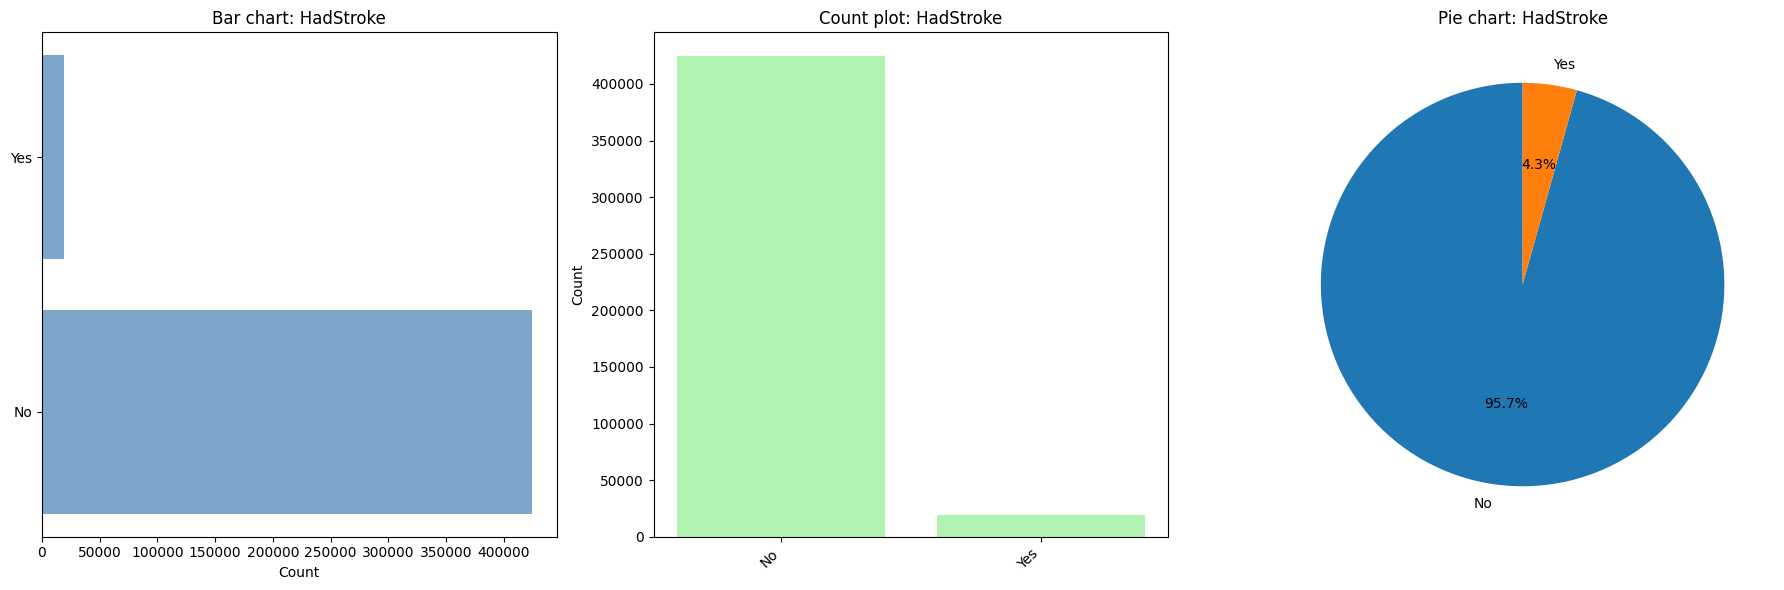

   Chart shows all categories

======================== Value distribution: HadAsthma =========================
1. Basic information:
   Total values: 445,132
   Missing values: 1,773 (0.40%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         376,665 ( 85.0%)
    2. Yes                         66,694 ( 15.0%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 85.0% of data
   Least frequent category: 15.0% of data
   Balance score (Gini): 0.256 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 1,773 (0.40%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most fr

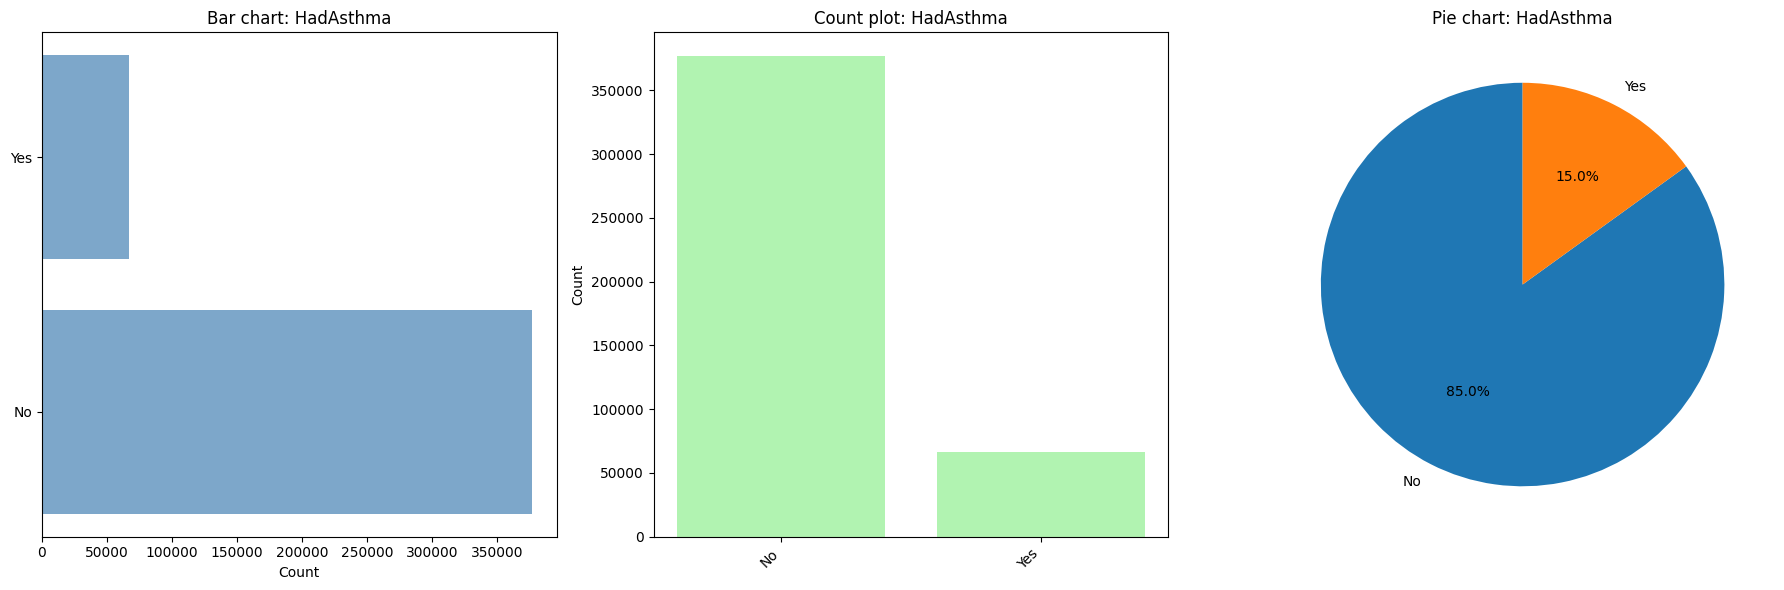

   Chart shows all categories

====================== Value distribution: HadSkinCancer =======================
1. Basic information:
   Total values: 445,132
   Missing values: 3,143 (0.71%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         406,504 ( 92.0%)
    2. Yes                         35,485 (  8.0%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 92.0% of data
   Least frequent category: 8.0% of data
   Balance score (Gini): 0.148 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 3,143 (0.71%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most 

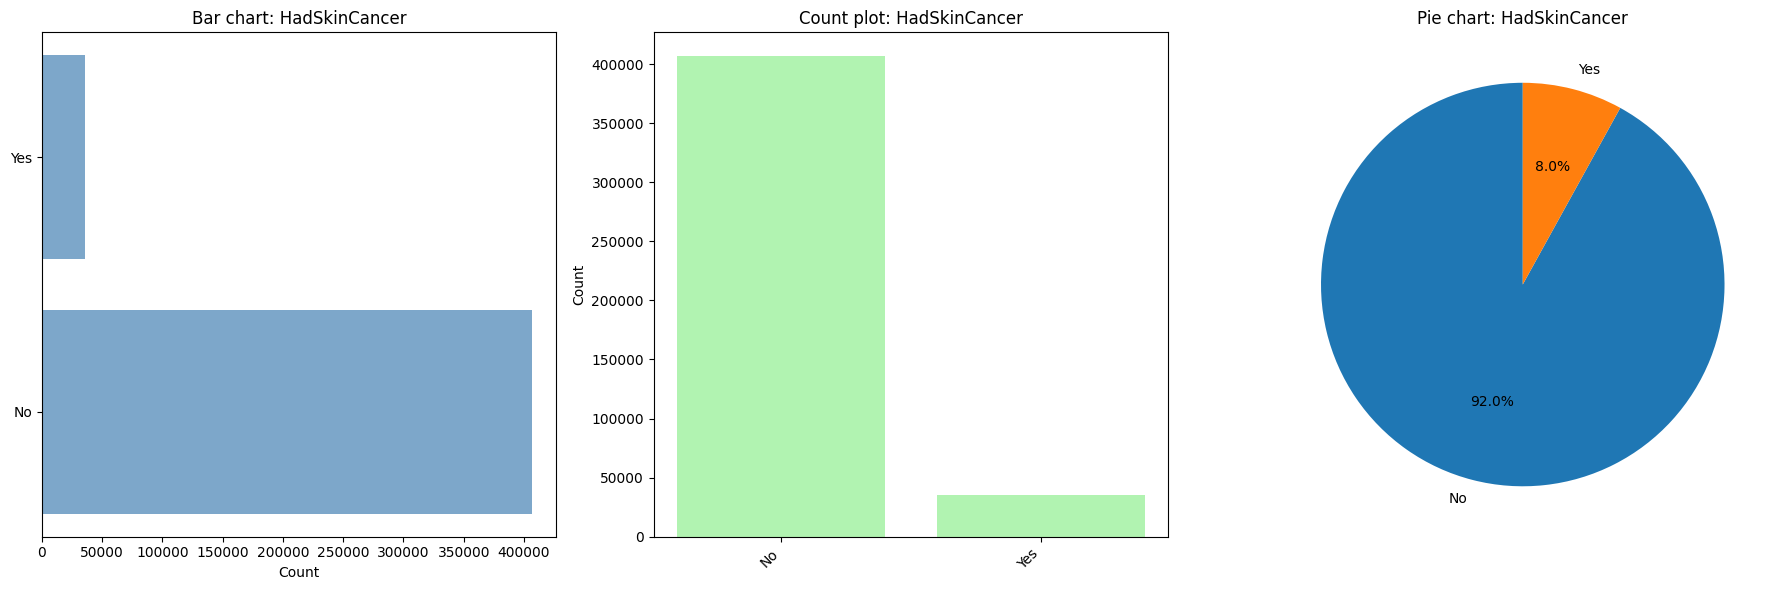

   Chart shows all categories

========================= Value distribution: HadCOPD ==========================
1. Basic information:
   Total values: 445,132
   Missing values: 2,219 (0.50%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         407,257 ( 91.9%)
    2. Yes                         35,656 (  8.1%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 91.9% of data
   Least frequent category: 8.1% of data
   Balance score (Gini): 0.148 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 2,219 (0.50%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most 

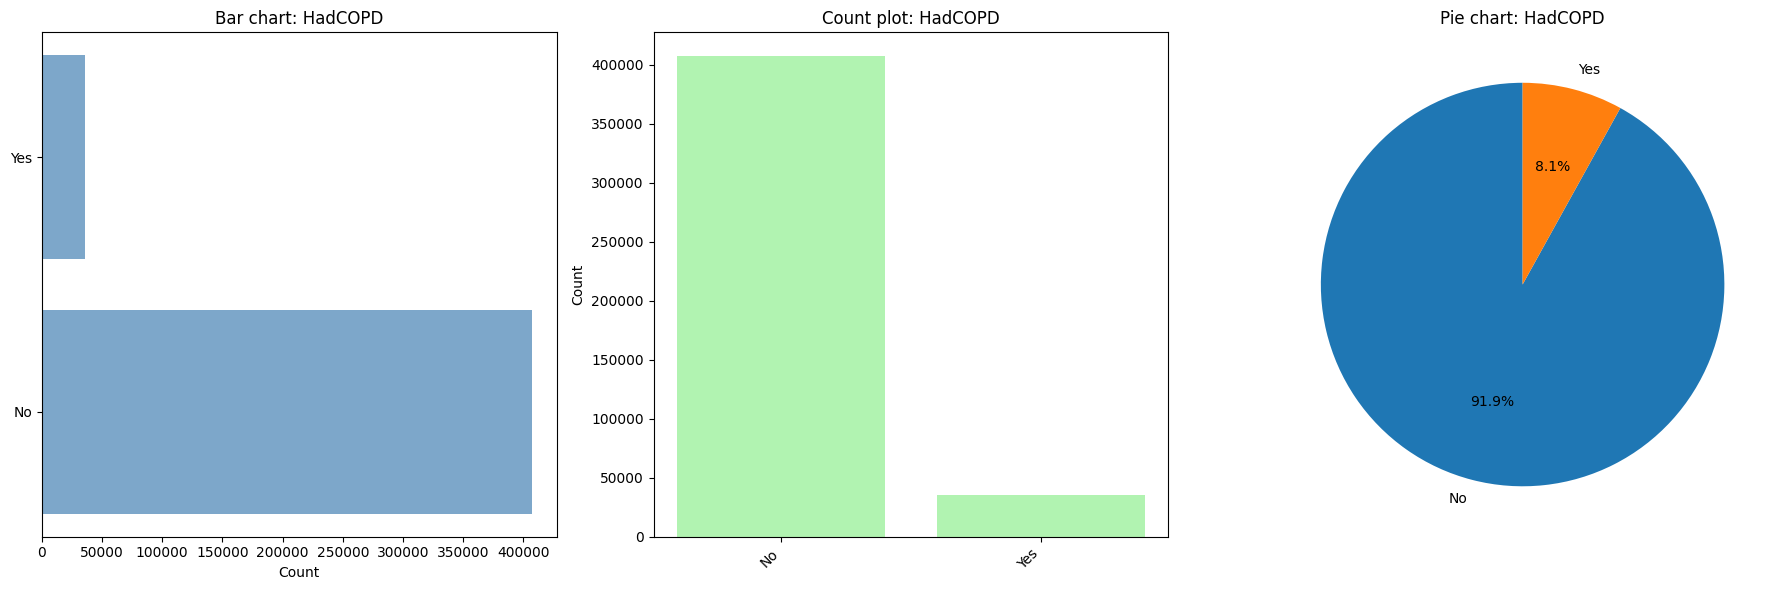

   Chart shows all categories

================== Value distribution: HadDepressiveDisorder ===================
1. Basic information:
   Total values: 445,132
   Missing values: 2,812 (0.63%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         350,910 ( 79.3%)
    2. Yes                         91,410 ( 20.7%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 79.3% of data
   Least frequent category: 20.7% of data
   Balance score (Gini): 0.328 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 2,812 (0.63%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most fr

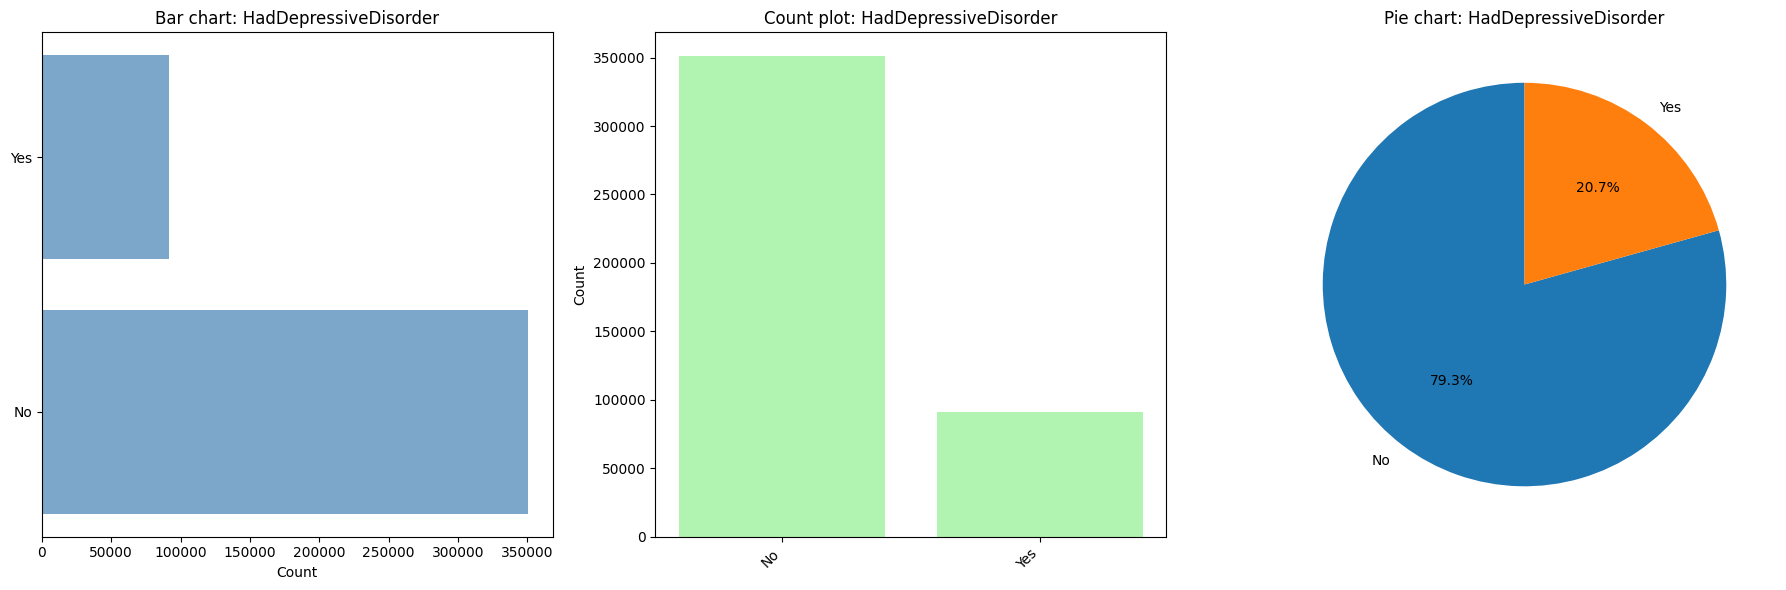

   Chart shows all categories

===================== Value distribution: HadKidneyDisease =====================
1. Basic information:
   Total values: 445,132
   Missing values: 1,926 (0.43%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         422,891 ( 95.4%)
    2. Yes                         20,315 (  4.6%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 95.4% of data
   Least frequent category: 4.6% of data
   Balance score (Gini): 0.087 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 1,926 (0.43%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most 

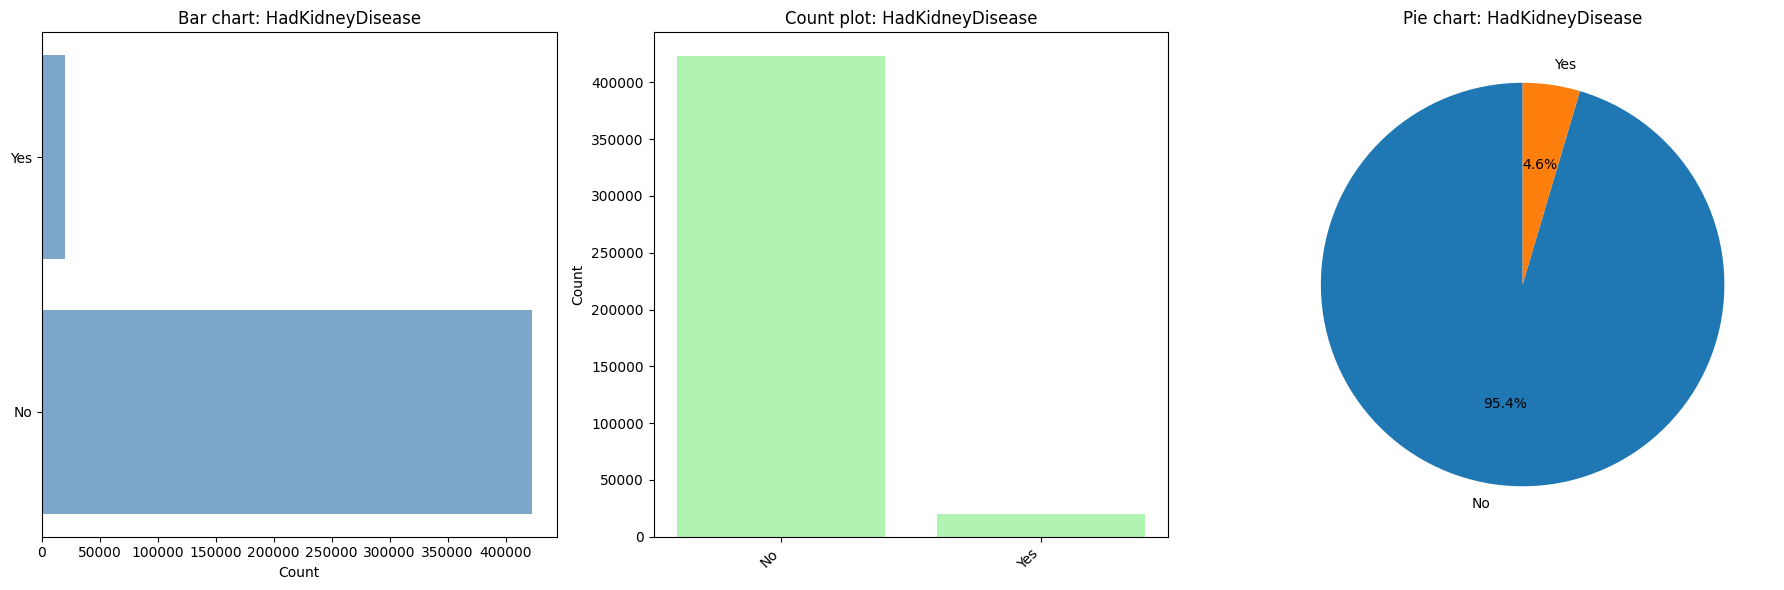

   Chart shows all categories

======================= Value distribution: HadArthritis =======================
1. Basic information:
   Total values: 445,132
   Missing values: 2,633 (0.59%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         291,351 ( 65.8%)
    2. Yes                        151,148 ( 34.2%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 65.8% of data
   Least frequent category: 34.2% of data
   Balance score (Gini): 0.450 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 2,633 (0.59%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 mos

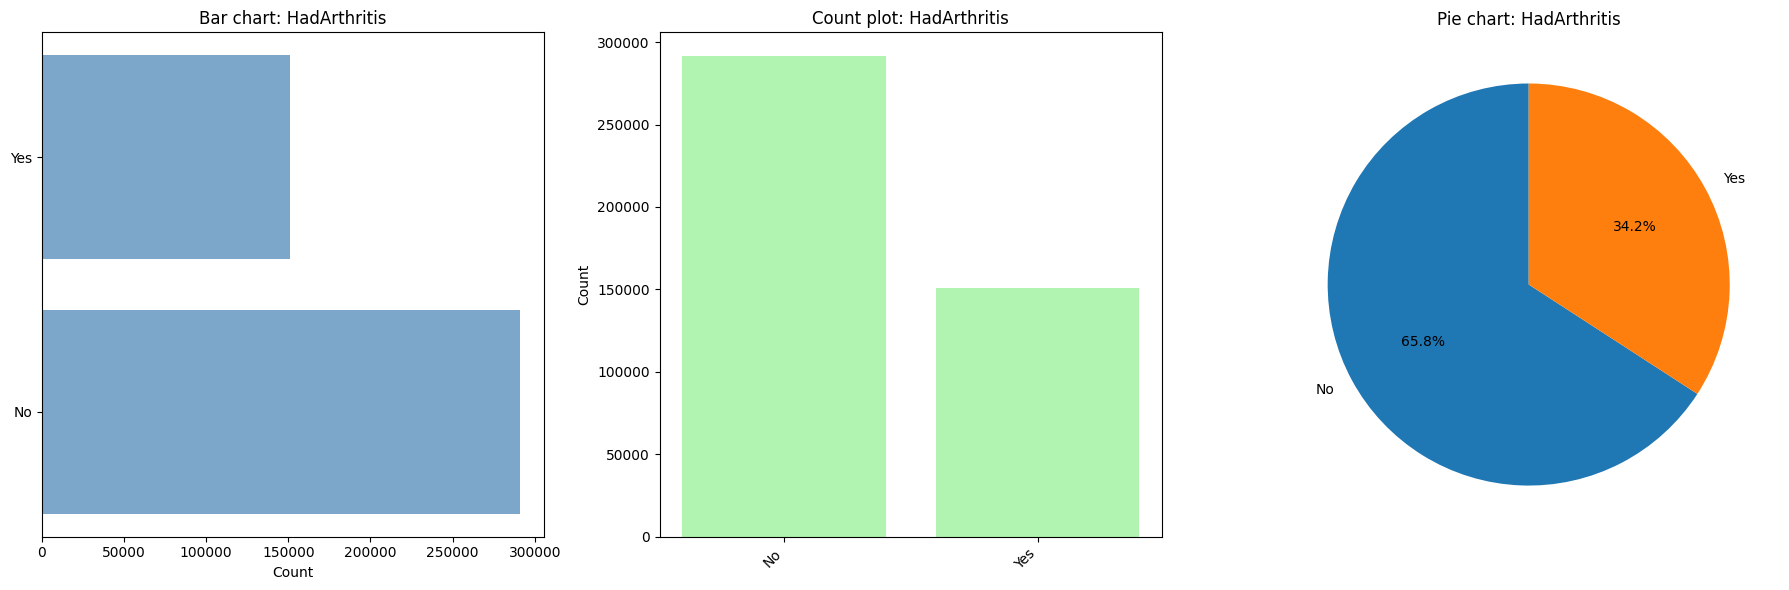

   Chart shows all categories

======================= Value distribution: HadDiabetes ========================
1. Basic information:
   Total values: 445,132
   Missing values: 1,087 (0.24%)
   Unique values: 4
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         368,722 ( 83.0%)
    2. Yes                         61,158 ( 13.8%)
    3. No, pre-diabetes or borderline diabetes   10,329 (  2.3%)
    4. Yes, but only during pregnancy (female)    3,836 (  0.9%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 83.0% of data
   Least frequent category: 0.9% of data
   Balance score (Gini): 0.291 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
   Rare categories (<1%): 1 categories
   Consider grouping rare categories for modeling
-------------------------------------------------------------------------------

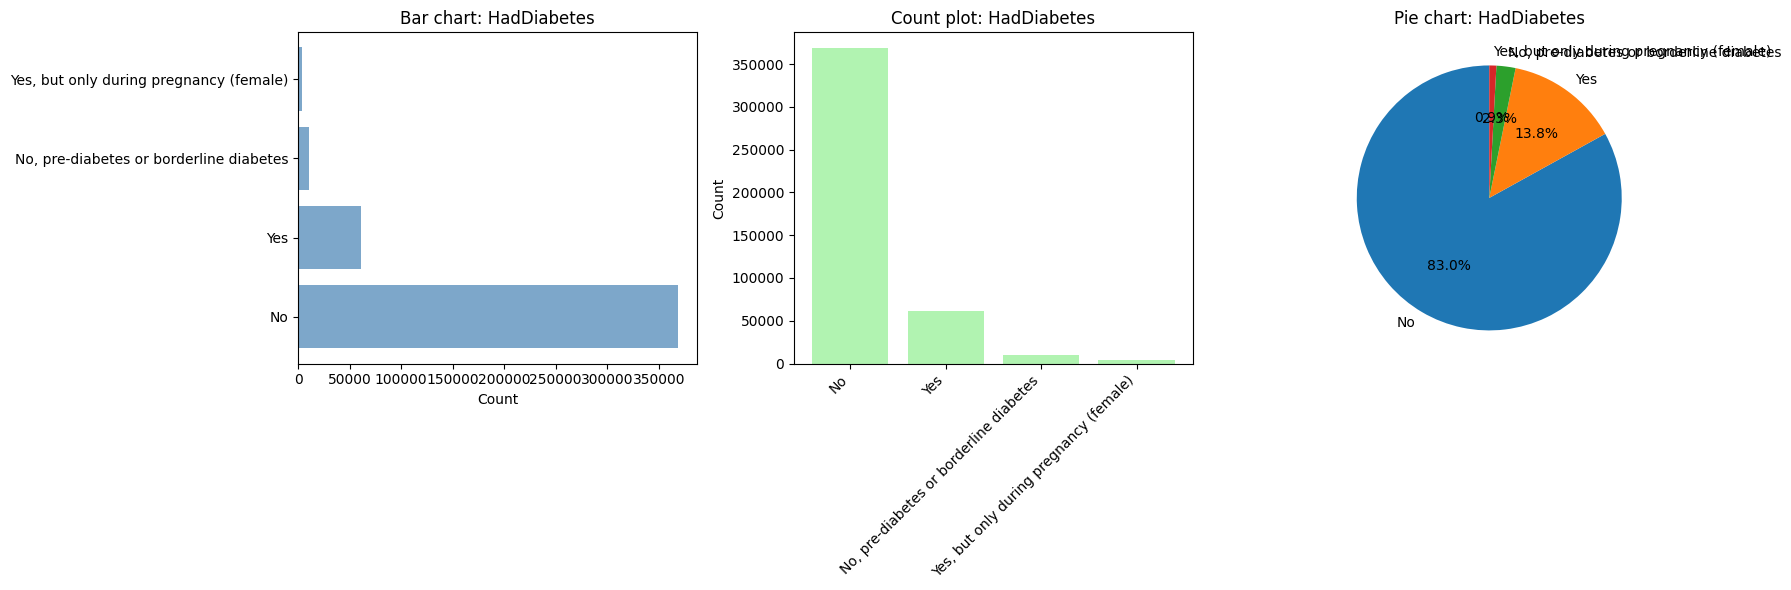

   Chart shows all categories

=================== Value distribution: DeafOrHardOfHearing ====================
1. Basic information:
   Total values: 445,132
   Missing values: 20,647 (4.64%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         385,539 ( 90.8%)
    2. Yes                         38,946 (  9.2%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 90.8% of data
   Least frequent category: 9.2% of data
   Balance score (Gini): 0.167 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 20,647 (4.64%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 mos

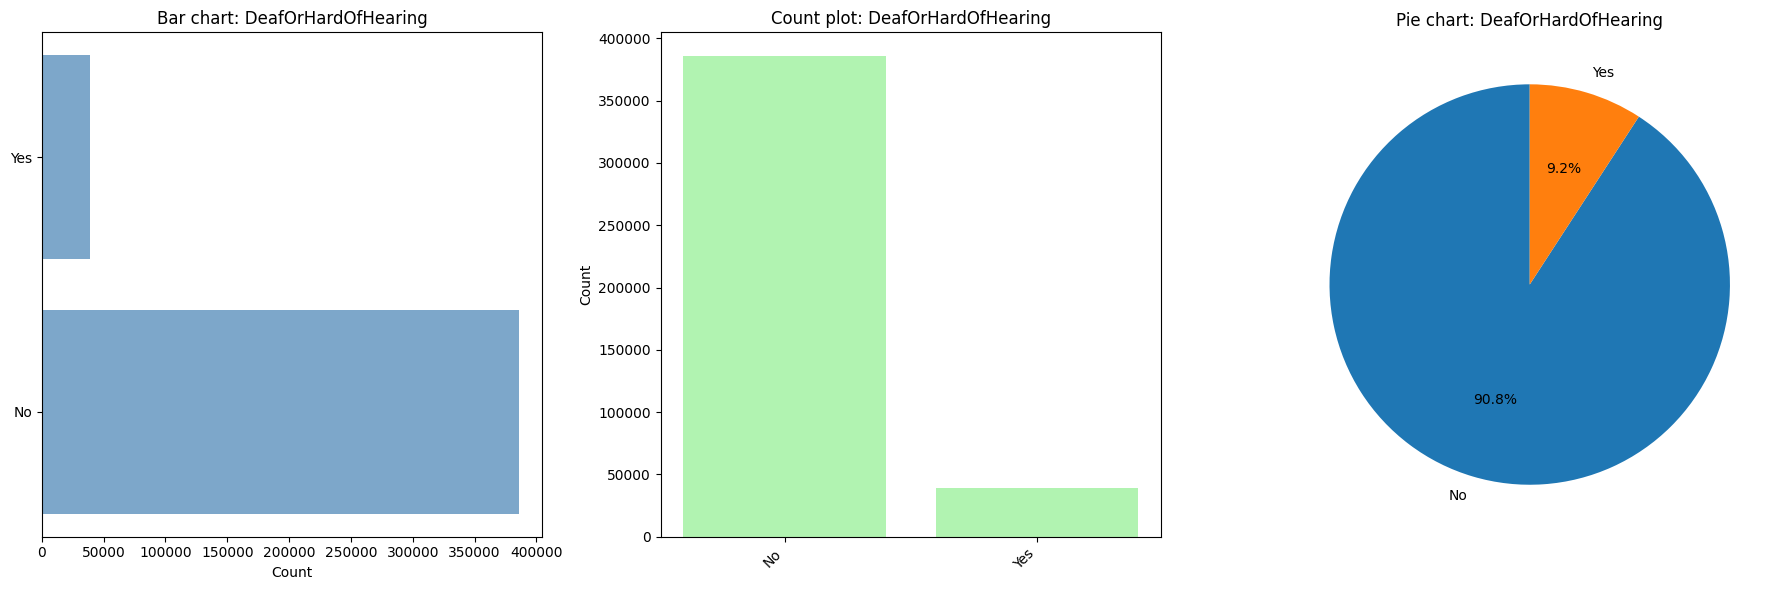

   Chart shows all categories

================= Value distribution: BlindOrVisionDifficulty ==================
1. Basic information:
   Total values: 445,132
   Missing values: 21,564 (4.84%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         399,910 ( 94.4%)
    2. Yes                         23,658 (  5.6%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 94.4% of data
   Least frequent category: 5.6% of data
   Balance score (Gini): 0.105 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 21,564 (4.84%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 mos

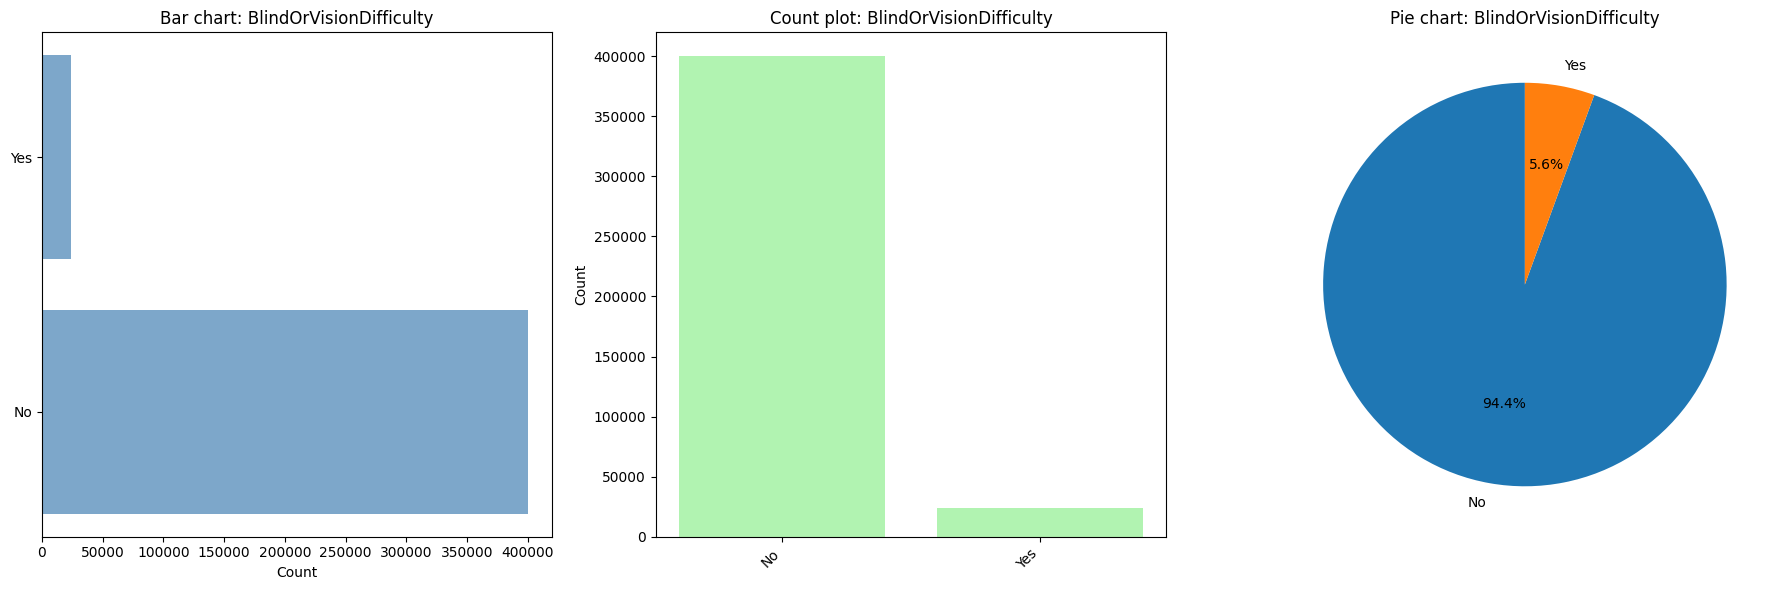

   Chart shows all categories

================= Value distribution: DifficultyConcentrating ==================
1. Basic information:
   Total values: 445,132
   Missing values: 24,240 (5.45%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         370,792 ( 88.1%)
    2. Yes                         50,100 ( 11.9%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 88.1% of data
   Least frequent category: 11.9% of data
   Balance score (Gini): 0.210 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 24,240 (5.45%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most 

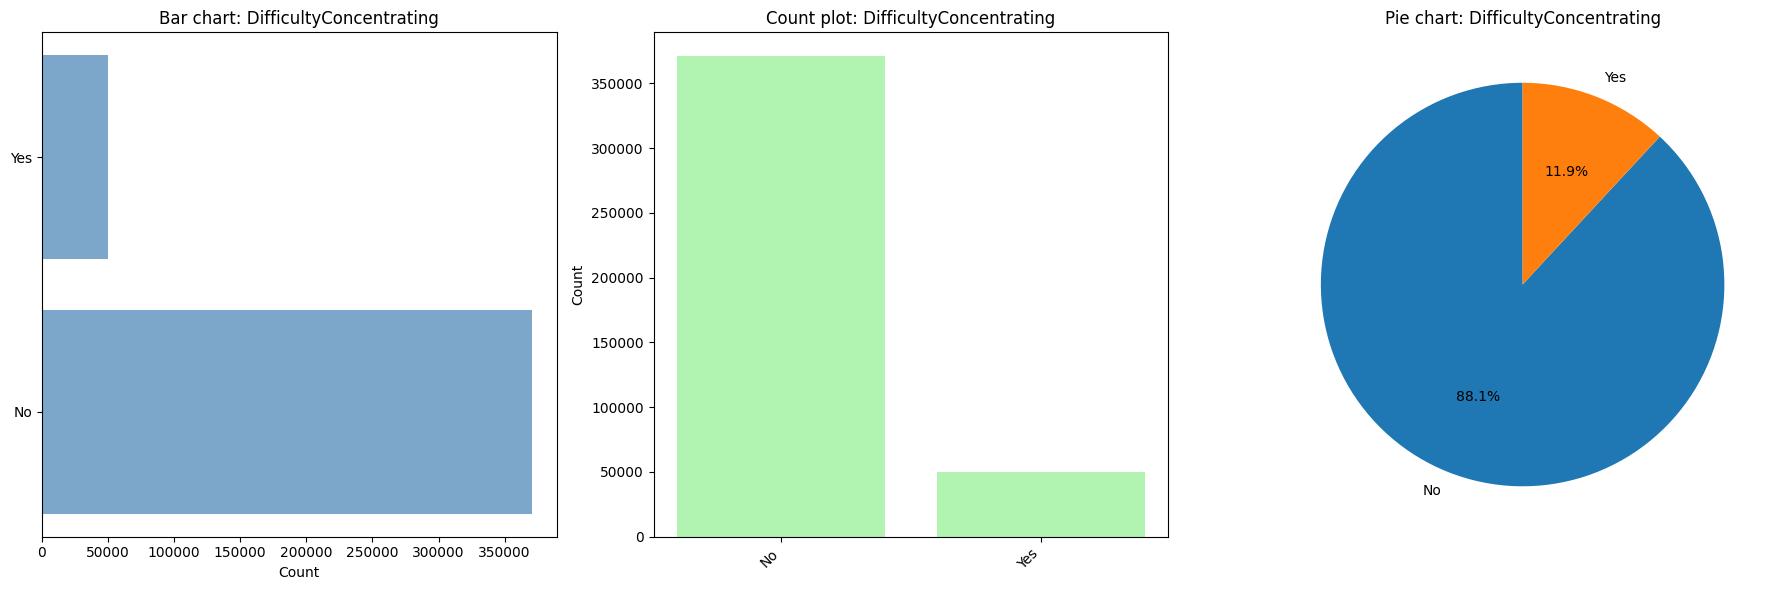

   Chart shows all categories

==================== Value distribution: DifficultyWalking =====================
1. Basic information:
   Total values: 445,132
   Missing values: 24,012 (5.39%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         353,039 ( 83.8%)
    2. Yes                         68,081 ( 16.2%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 83.8% of data
   Least frequent category: 16.2% of data
   Balance score (Gini): 0.271 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 24,012 (5.39%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most 

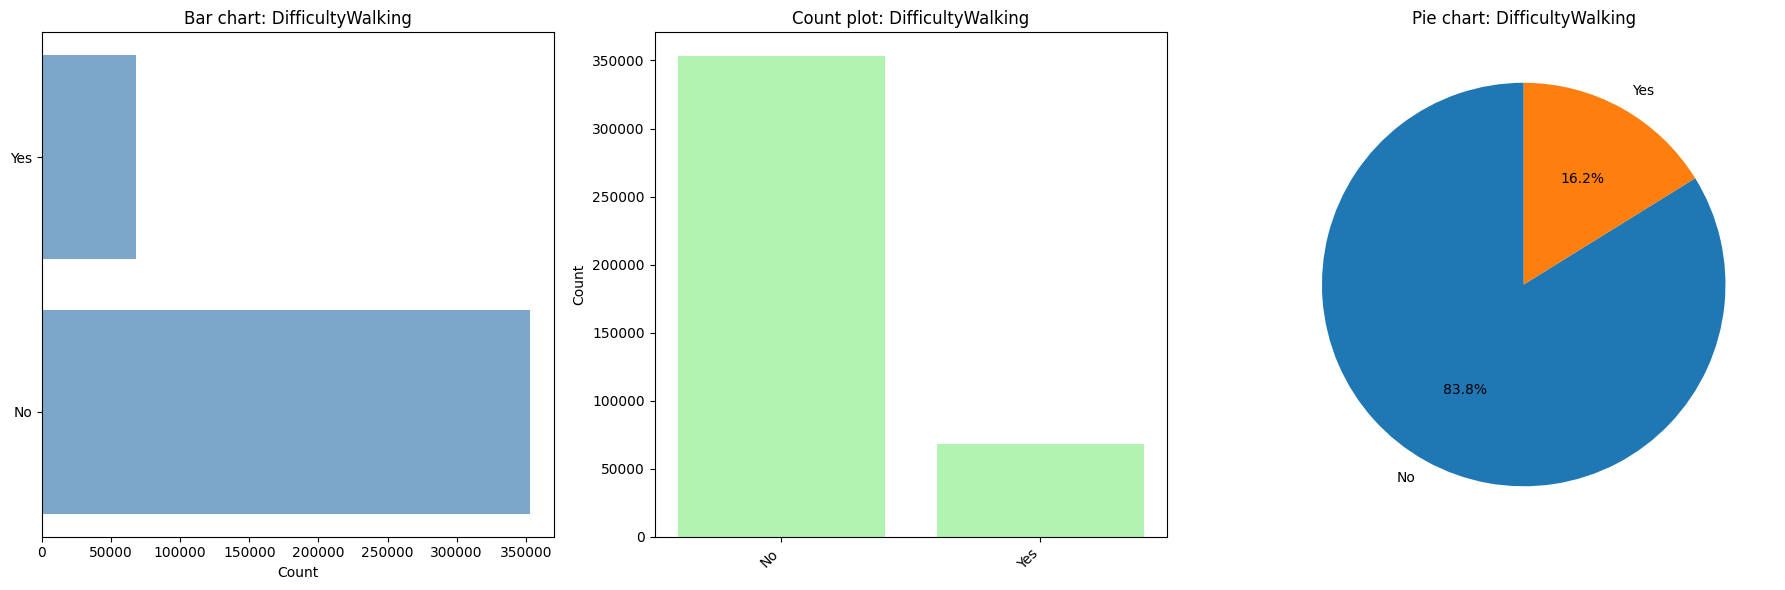

   Chart shows all categories

================ Value distribution: DifficultyDressingBathing =================
1. Basic information:
   Total values: 445,132
   Missing values: 23,915 (5.37%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         404,404 ( 96.0%)
    2. Yes                         16,813 (  4.0%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 96.0% of data
   Least frequent category: 4.0% of data
   Balance score (Gini): 0.077 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 23,915 (5.37%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 mos

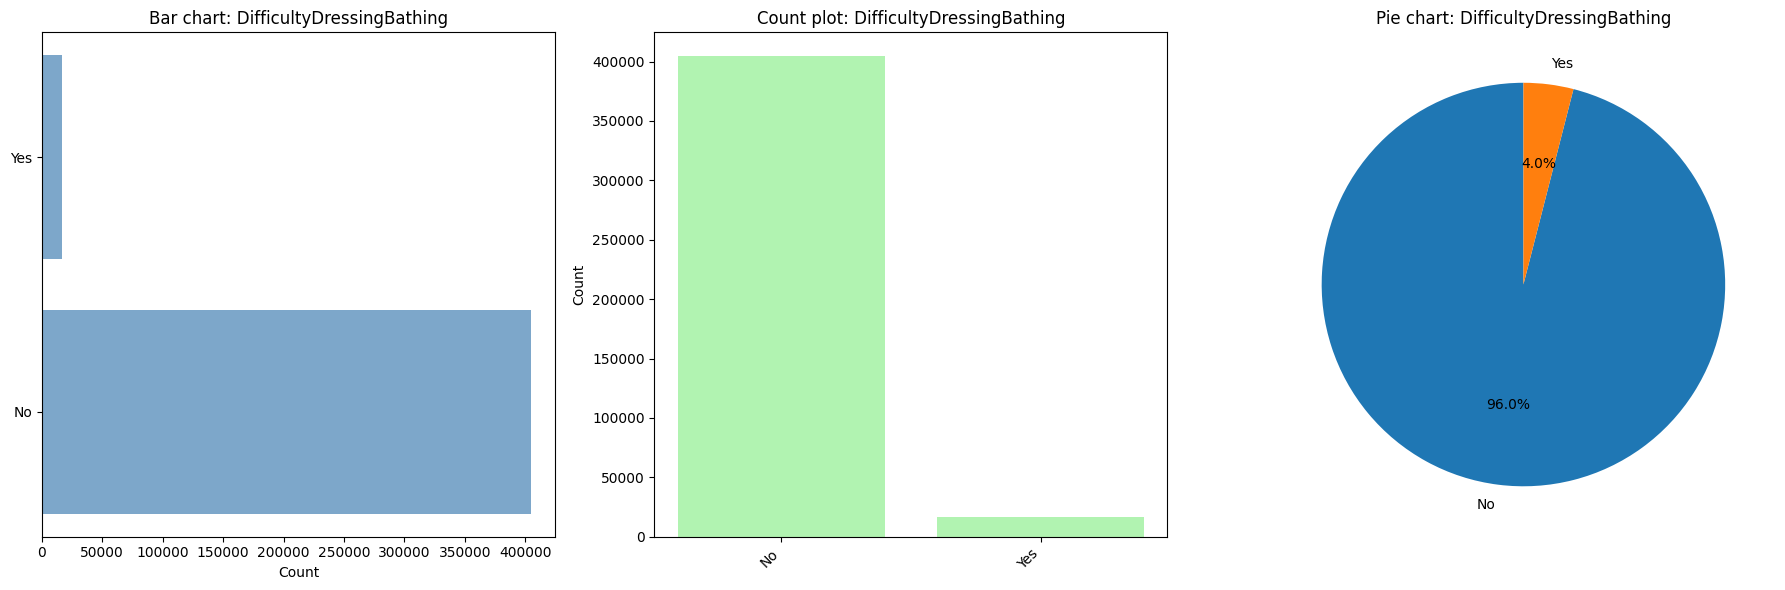

   Chart shows all categories

==================== Value distribution: DifficultyErrands =====================
1. Basic information:
   Total values: 445,132
   Missing values: 25,656 (5.76%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         387,029 ( 92.3%)
    2. Yes                         32,447 (  7.7%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 92.3% of data
   Least frequent category: 7.7% of data
   Balance score (Gini): 0.143 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 25,656 (5.76%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 mos

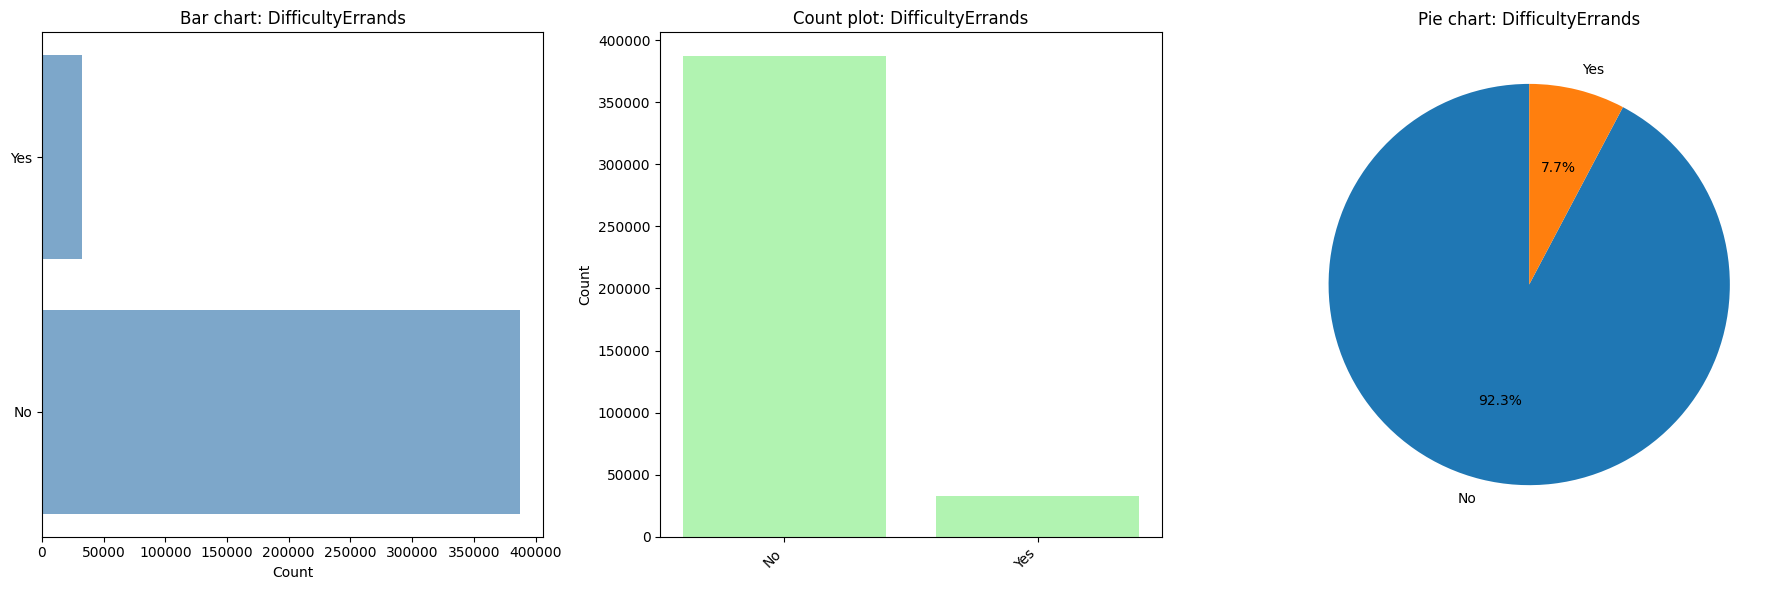

   Chart shows all categories

======================= Value distribution: SmokerStatus =======================
1. Basic information:
   Total values: 445,132
   Missing values: 35,462 (7.97%)
   Unique values: 4
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Never smoked               245,955 ( 60.0%)
    2. Former smoker              113,774 ( 27.8%)
    3. Current smoker - now smokes every day   36,003 (  8.8%)
    4. Current smoker - now smokes some days   13,938 (  3.4%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 60.0% of data
   Least frequent category: 3.4% of data
   Balance score (Gini): 0.554 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 35

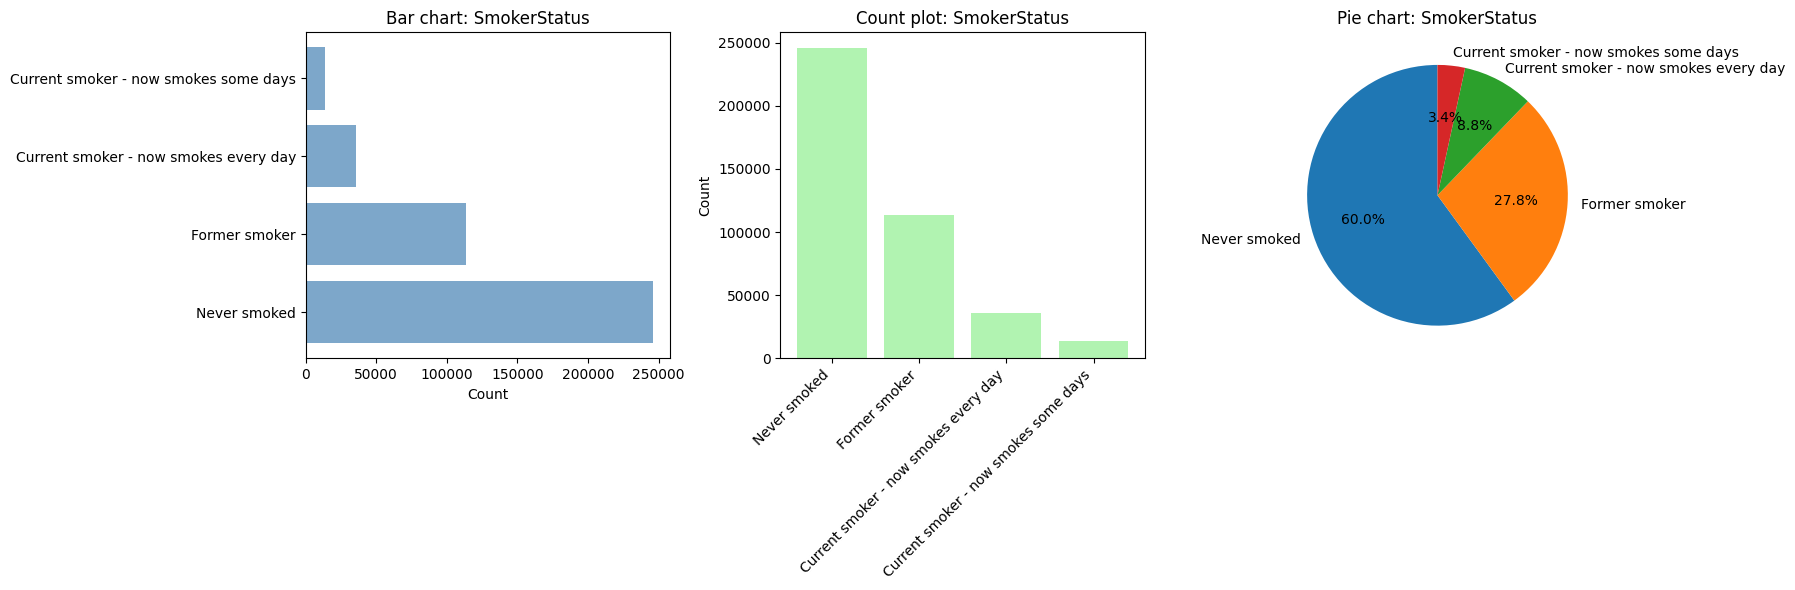

   Chart shows all categories

===================== Value distribution: ECigaretteUsage ======================
1. Basic information:
   Total values: 445,132
   Missing values: 35,660 (8.01%)
   Unique values: 4
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Never used e-cigarettes in my entire life  311,988 ( 76.2%)
    2. Not at all (right now)      75,368 ( 18.4%)
    3. Use them some days          11,734 (  2.9%)
    4. Use them every day          10,382 (  2.5%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 76.2% of data
   Least frequent category: 2.5% of data
   Balance score (Gini): 0.384 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 35,660 (8.01%)

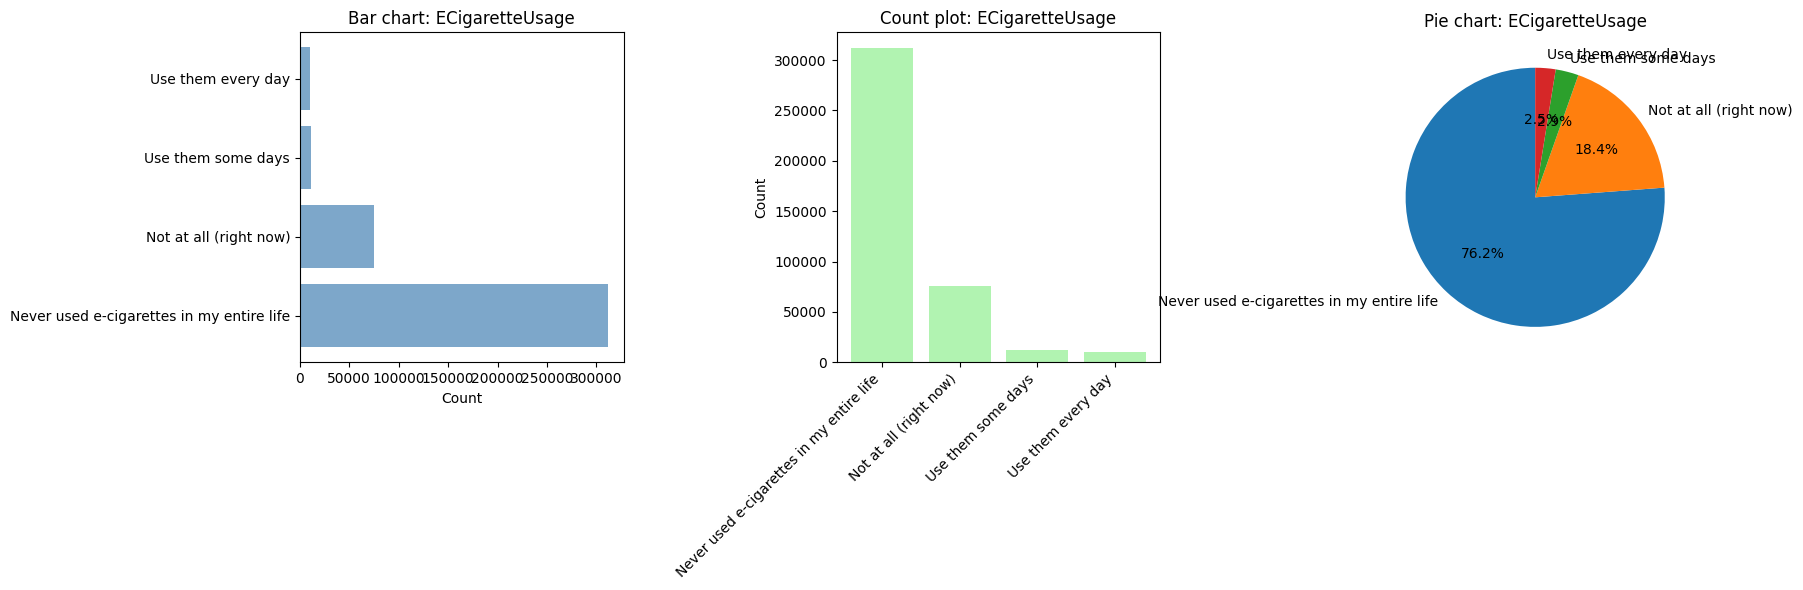

   Chart shows all categories

======================== Value distribution: ChestScan =========================
1. Basic information:
   Total values: 445,132
   Missing values: 56,046 (12.59%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         223,221 ( 57.4%)
    2. Yes                        165,865 ( 42.6%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 57.4% of data
   Least frequent category: 42.6% of data
   Balance score (Gini): 0.489 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 56,046 (12.59%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10

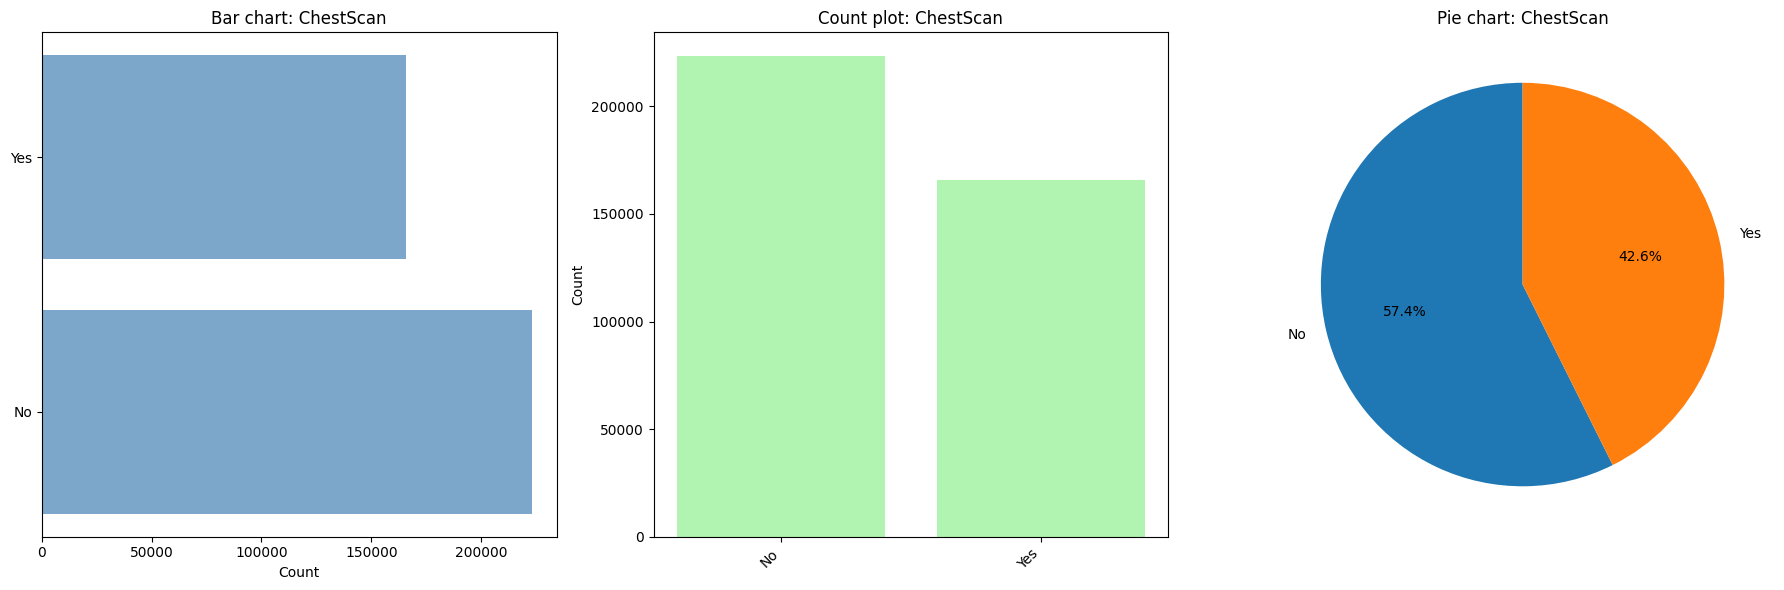

   Chart shows all categories

================== Value distribution: RaceEthnicityCategory ===================
1. Basic information:
   Total values: 445,132
   Missing values: 14,057 (3.16%)
   Unique values: 5
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. White only, Non-Hispanic   320,421 ( 74.3%)
    2. Hispanic                    42,917 ( 10.0%)
    3. Black only, Non-Hispanic    35,446 (  8.2%)
    4. Other race only, Non-Hispanic   22,713 (  5.3%)
    5. Multiracial, Non-Hispanic    9,578 (  2.2%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 74.3% of data
   Least frequent category: 2.2% of data
   Balance score (Gini): 0.428 (0=balanced, 1=imbalanced)
   Status: Highly imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 44

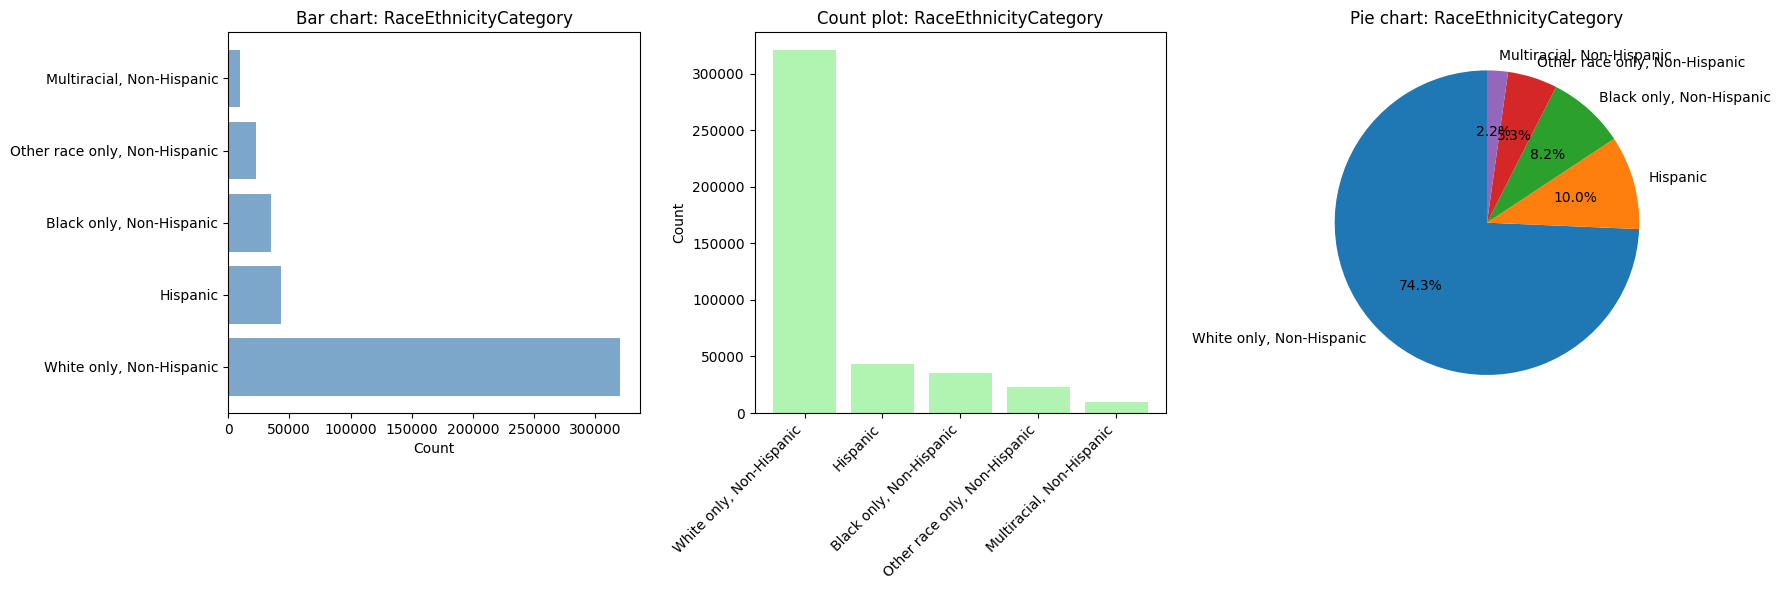

   Chart shows all categories

======================= Value distribution: AgeCategory ========================
1. Basic information:
   Total values: 445,132
   Missing values: 9,079 (2.04%)
   Unique values: 13
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Age 65 to 69                47,099 ( 10.8%)
    2. Age 60 to 64                44,511 ( 10.2%)
    3. Age 70 to 74                43,472 ( 10.0%)
    4. Age 55 to 59                36,821 (  8.4%)
    5. Age 80 or older             36,251 (  8.3%)
    6. Age 50 to 54                33,644 (  7.7%)
    7. Age 75 to 79                32,518 (  7.5%)
    8. Age 40 to 44                29,942 (  6.9%)
    9. Age 45 to 49                28,531 (  6.5%)
   10. Age 35 to 39                28,526 (  6.5%)
   ... and 3 more categories
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 10

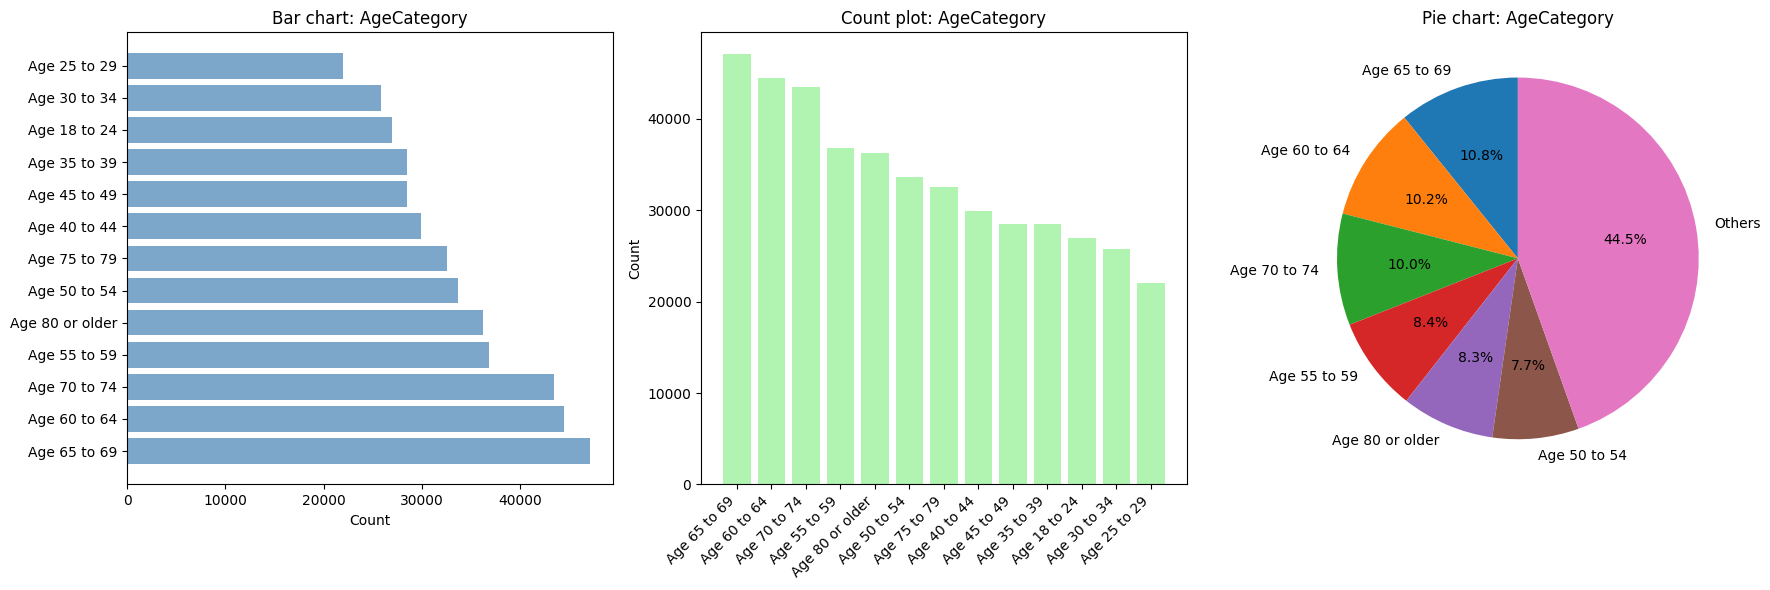

   Chart shows all categories

===================== Value distribution: AlcoholDrinkers ======================
1. Basic information:
   Total values: 445,132
   Missing values: 46,574 (10.46%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Yes                        210,891 ( 52.9%)
    2. No                         187,667 ( 47.1%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 52.9% of data
   Least frequent category: 47.1% of data
   Balance score (Gini): 0.498 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 46,574 (10.46%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10

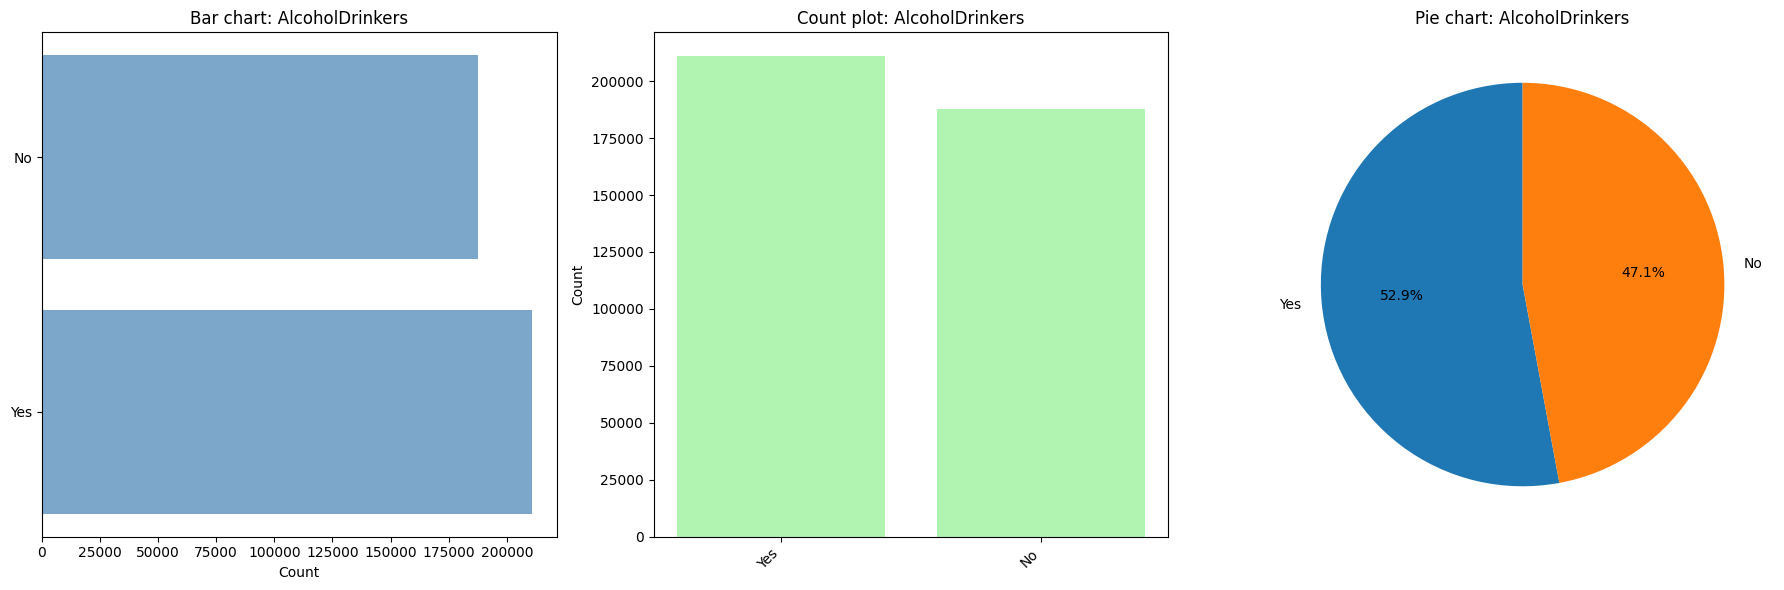

   Chart shows all categories

======================== Value distribution: HIVTesting ========================
1. Basic information:
   Total values: 445,132
   Missing values: 66,127 (14.86%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         249,919 ( 65.9%)
    2. Yes                        129,086 ( 34.1%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 65.9% of data
   Least frequent category: 34.1% of data
   Balance score (Gini): 0.449 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 66,127 (14.86%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10

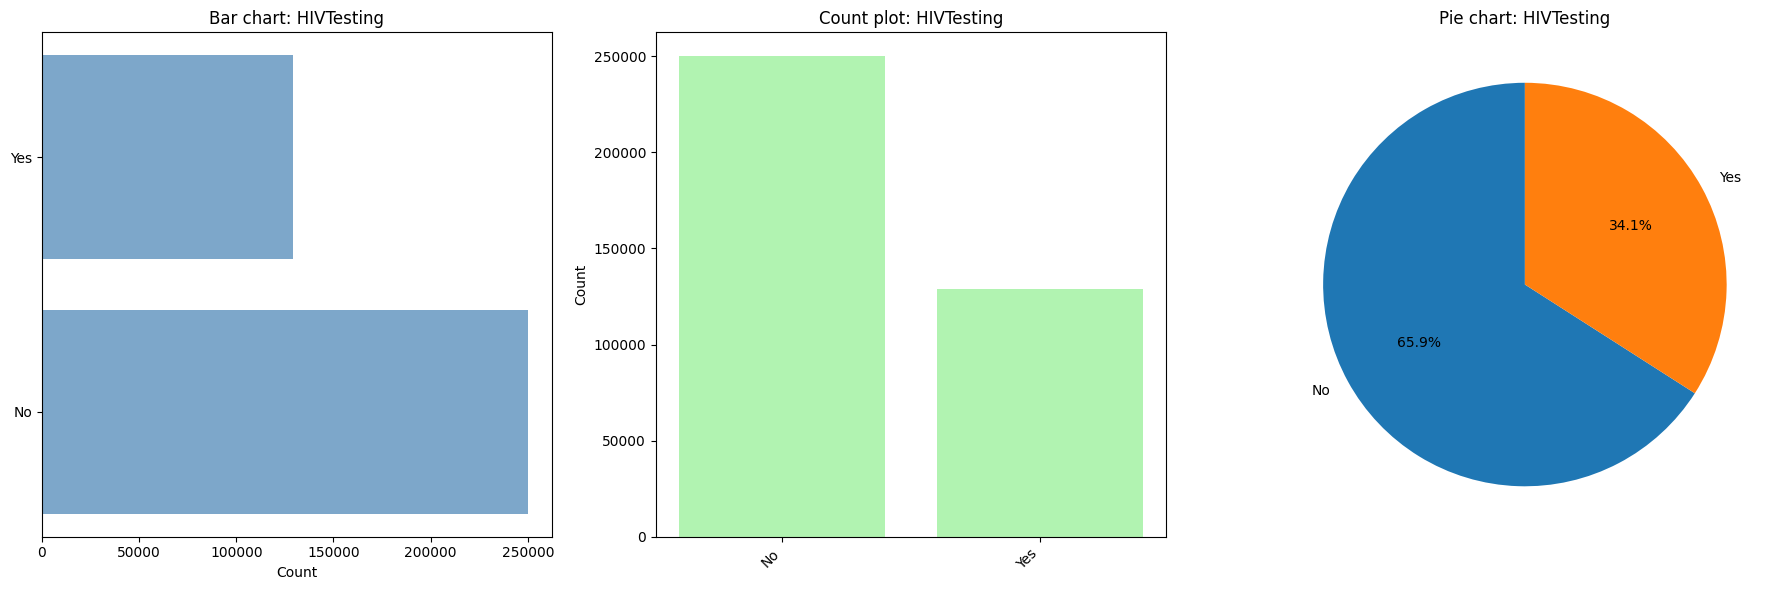

   Chart shows all categories

======================= Value distribution: FluVaxLast12 =======================
1. Basic information:
   Total values: 445,132
   Missing values: 47,121 (10.59%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. Yes                        209,256 ( 52.6%)
    2. No                         188,755 ( 47.4%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 52.6% of data
   Least frequent category: 47.4% of data
   Balance score (Gini): 0.499 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 47,121 (10.59%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10

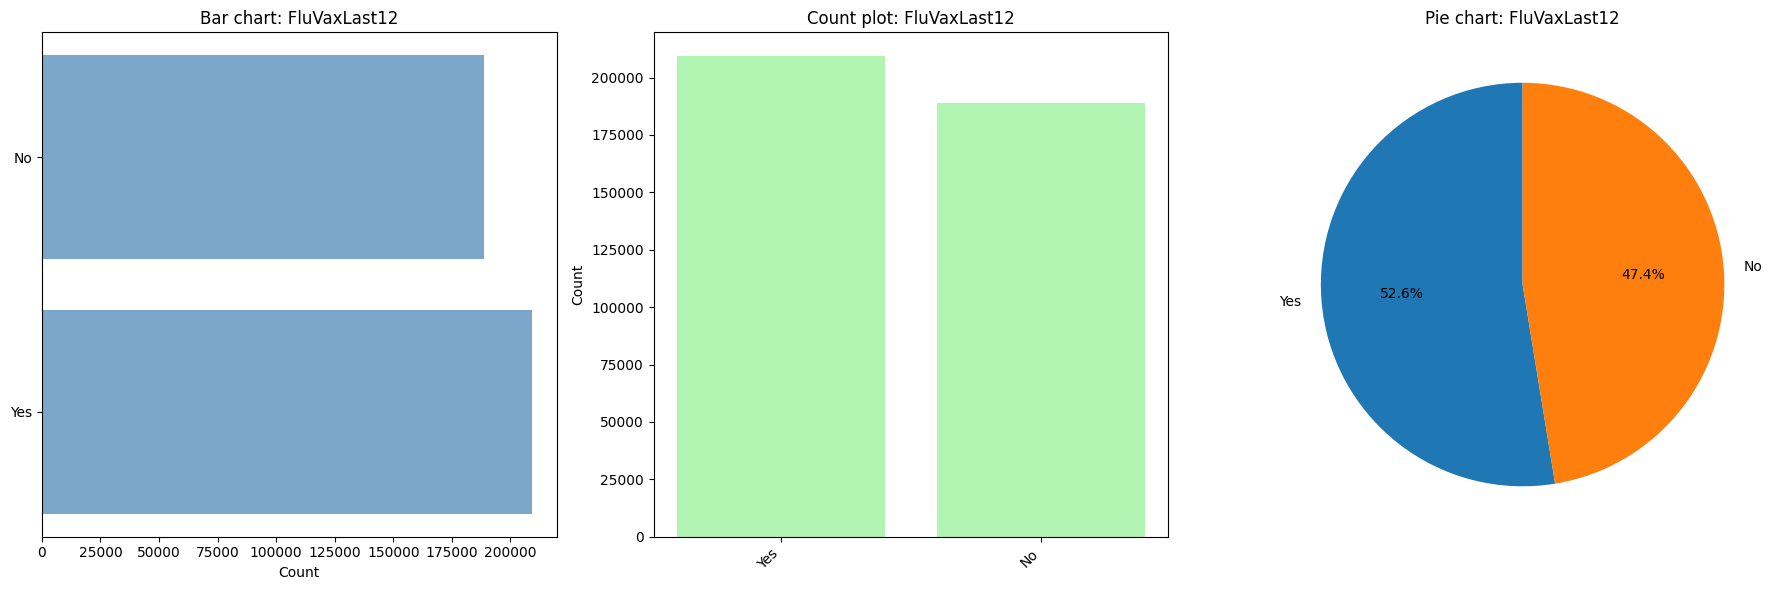

   Chart shows all categories

====================== Value distribution: PneumoVaxEver =======================
1. Basic information:
   Total values: 445,132
   Missing values: 77,040 (17.31%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         215,604 ( 58.6%)
    2. Yes                        152,488 ( 41.4%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 58.6% of data
   Least frequent category: 41.4% of data
   Balance score (Gini): 0.485 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 77,040 (17.31%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10

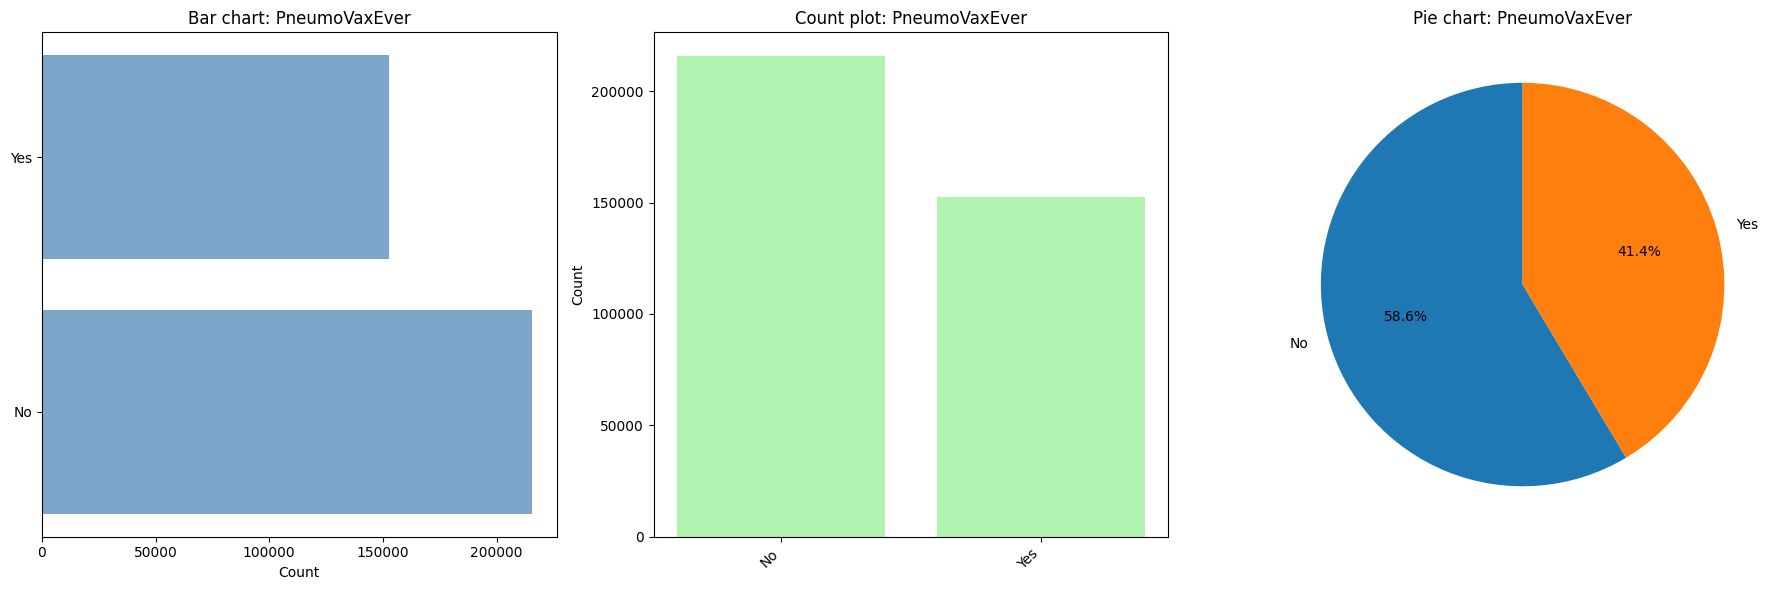

   Chart shows all categories

==================== Value distribution: TetanusLast10Tdap =====================
1. Basic information:
   Total values: 445,132
   Missing values: 82,516 (18.54%)
   Unique values: 4
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No, did not receive any tetanus shot in the past 10 years  121,493 ( 33.5%)
    2. Yes, received tetanus shot but not sure what type  113,725 ( 31.4%)
    3. Yes, received Tdap          99,943 ( 27.6%)
    4. Yes, received tetanus shot, but not Tdap   27,455 (  7.6%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 33.5% of data
   Least frequent category: 7.6% of data
   Balance score (Gini): 0.708 (0=balanced, 1=imbalanced)
   Status: Relatively imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information

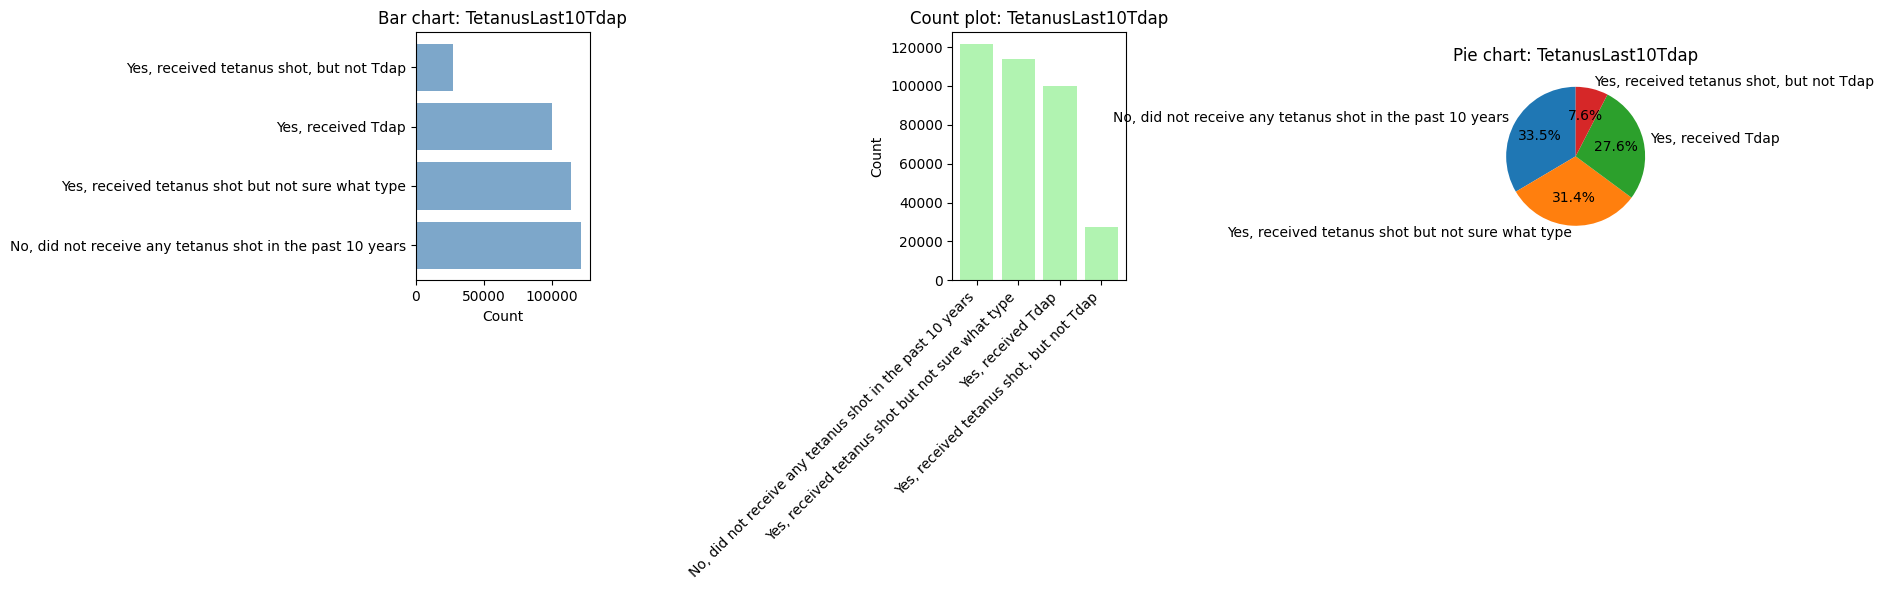

   Chart shows all categories

===================== Value distribution: HighRiskLastYear =====================
1. Basic information:
   Total values: 445,132
   Missing values: 50,623 (11.37%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         377,324 ( 95.6%)
    2. Yes                         17,185 (  4.4%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 95.6% of data
   Least frequent category: 4.4% of data
   Balance score (Gini): 0.083 (0=balanced, 1=imbalanced)
   Status: Extremely imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 50,623 (11.37%)
   Unique values: 2
--------------------------------------------------------------------------------
2. Top 10 m

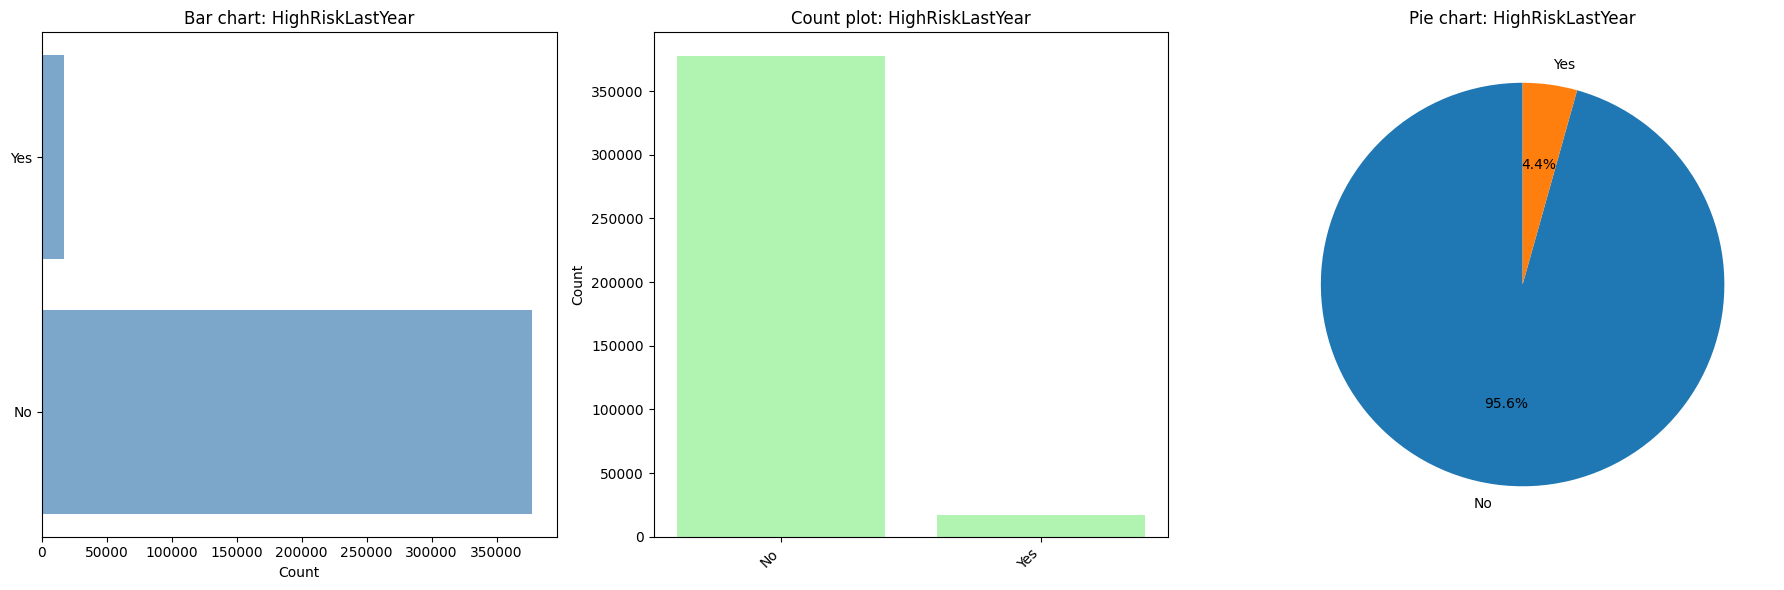

   Chart shows all categories

========================= Value distribution: CovidPos =========================
1. Basic information:
   Total values: 445,132
   Missing values: 50,764 (11.40%)
   Unique values: 3
--------------------------------------------------------------------------------
2. Top 10 most frequent values:
    1. No                         270,055 ( 68.5%)
    2. Yes                        110,877 ( 28.1%)
    3. Tested positive using home test without a health professional   13,436 (  3.4%)
--------------------------------------------------------------------------------
3. Distribution balance:
   Most frequent category: 68.5% of data
   Least frequent category: 3.4% of data
   Balance score (Gini): 0.451 (0=balanced, 1=imbalanced)
   Status: Moderately imbalanced
--------------------------------------------------------------------------------
4. Visualization:
1. Basic information:
   Total values: 445,132
   Missing values: 50,764 (11.40%)
   Unique values: 3
----

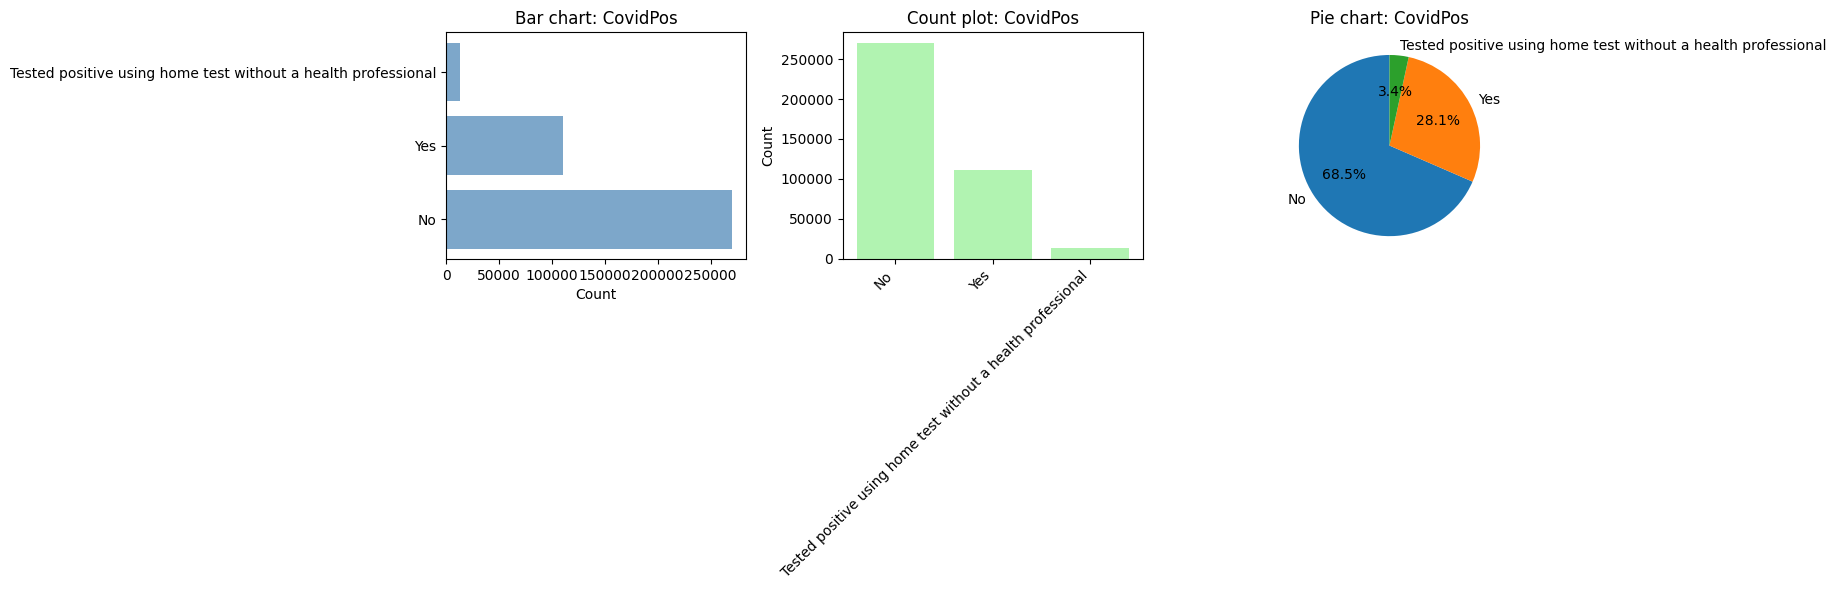

   Chart shows all categories



In [ ]:
for col in categorical_columns:
    print(f" Value distribution: {col} ".center(80, "="))
    
    # 1. Vectorized basic statistics using NumPy
    col_data = df[col].values
    is_missing = pd.isna(col_data)
    total_values = len(col_data)
    non_missing_mask = ~is_missing
    non_missing_data = col_data[non_missing_mask]
    
    missing_count = np.sum(is_missing)
    non_missing = len(non_missing_data)
    missing_pct = (missing_count / total_values) * 100
    
    # Fast unique count using NumPy
    unique_values, counts = np.unique(non_missing_data, return_counts=True)
    unique_count = len(unique_values)
    
    print(f"1. Basic information:")
    print(f"   Total values: {total_values:,}")
    print(f"   Missing values: {missing_count:,} ({missing_pct:.2f}%)")
    print(f"   Unique values: {unique_count}")
    print("-" * 80)
    
    # 2. Vectorized frequency analysis
    sort_idx = np.argsort(-counts)  # Sort descending
    top_10_idx = sort_idx[:min(10, len(sort_idx))]
    
    print(f"2. Top 10 most frequent values:")
    percentages = (counts[top_10_idx] / non_missing) * 100
    
    # Vectorized string formatting
    for i, idx in enumerate(top_10_idx):
        value = str(unique_values[idx])
        count = counts[idx]
        pct = percentages[i]
        print(f"   {i+1:2d}. {value:<25} {count:>8,} ({pct:>5.1f}%)")
    
    if unique_count > 10:
        remaining = unique_count - 10
        print(f"   ... and {remaining} more categories")
    
    print("-" * 80)
    
    # 3. Distribution balance using NumPy
    print(f"3. Distribution balance:")
    
    proportions = counts / non_missing
    most_frequent_pct = np.max(proportions) * 100
    least_frequent_pct = np.min(proportions) * 100
    
    # Vectorized Gini calculation
    gini = 1 - np.sum(proportions ** 2)
    
    print(f"   Most frequent category: {most_frequent_pct:.1f}% of data")
    print(f"   Least frequent category: {least_frequent_pct:.1f}% of data")
    print(f"   Balance score (Gini): {gini:.3f} (0=balanced, 1=imbalanced)")
    
    # Balance classification without icons
    if most_frequent_pct > 90:
        balance_status = "Extremely imbalanced"
    elif most_frequent_pct > 70:
        balance_status = "Highly imbalanced"
    elif most_frequent_pct > 50:
        balance_status = "Moderately imbalanced"
    else:
        balance_status = "Relatively imbalanced"
    
    print(f"   Status: {balance_status}")
    
    # Vectorized rare categories analysis
    rare_threshold = 0.01  # 1% threshold
    rare_mask = proportions < rare_threshold
    rare_count = np.sum(rare_mask)
    
    if rare_count > 0:
        print(f"   Rare categories (<1%): {rare_count} categories")
        print(f"   Consider grouping rare categories for modeling")
    
    print("-" * 80)
    
    # 4. Create optimized visualizations
    print(f"4. Visualization:")
    
    max_categories = min(15, unique_count)
    plot_values = unique_values[sort_idx[:max_categories]]
    plot_counts = counts[sort_idx[:max_categories]]
    
    # Shorten labels for specific columns with long category names
    shortened_labels = list(plot_values.copy())

    if col == 'LastCheckupTime':
        label_map = {
            'Within past year (anytime less than 12 months ago)': '< 1 year',
            'Within past 2 years (1 year but less than 2 years ago)': '1-2 years',
            'Within past 5 years (2 years but less than 5 years ago)': '2-5 years',
            '5 or more years ago': '5+ years',
            'Never': 'Never'
        }
        shortened_labels = [
            label_map.get(str(label), str(label)[:15] + '...' if len(str(label)) > 15 else str(label))
            for label in plot_values
        ]

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Bar chart
    y_pos = np.arange(len(plot_values))
    axes[0].barh(y_pos, plot_counts, color='steelblue', alpha=0.7)
    axes[0].set_yticks(y_pos)
    axes[0].set_yticklabels(shortened_labels)
    axes[0].set_xlabel('Count')
    axes[0].set_title(f'Bar chart: {col}')
    
    # Count plot (vertical bar chart)
    axes[1].bar(range(len(plot_counts)), plot_counts, color='lightgreen', alpha=0.7)
    axes[1].set_xticks(range(len(shortened_labels)))
    axes[1].set_xticklabels(shortened_labels, rotation=45, ha='right')
    axes[1].set_ylabel('Count')
    axes[1].set_title(f'Count plot: {col}')
    
    # Pie chart
    if unique_count <= 8:
        # Show all categories in pie chart
        pie_labels = shortened_labels
        pie_counts = plot_counts
    else:
        # Group smaller categories as "Others"
        top_8_counts = plot_counts[:8]
        others_count = np.sum(counts) - np.sum(top_8_counts)
        pie_labels = shortened_labels[:8] + ['Others']
        pie_counts = np.append(top_8_counts, others_count)
    
    axes[2].pie(pie_counts, labels=pie_labels, autopct='%1.1f%%', startangle=90)
    axes[2].set_title(f'Pie chart: {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Summary without icons
    if unique_count <= max_categories:
        print(f"   Chart shows all categories")
    else:
        remaining_count = unique_count - max_categories
        remaining_total = np.sum(counts[sort_idx[max_categories:]])
        remaining_pct = (remaining_total / non_missing) * 100
        print(f"   Remaining {remaining_count} categories represent {remaining_pct:.1f}% of data")
    
    print("=" * 80 + "\n")
    

### Data Quality: 
<ol>
    <li> What percentage of values are missing? 
    <li> Are there inconsistencies in categories?(Example: "Male", "male", "M", "m" all meaning the same thing, Typos or variations in spelling)
    <li> Are there unexpected or abnormal values? 
    <li> Are there categories with very few observations? Should they be grouped?
<ol>

In [ ]:
for col in categorical_columns:
    print(f" Data Quality Assessment: {col} ".center(80, "="))
    
    # Get column data
    col_data = df[col]
    total_count = len(col_data)
    non_missing = col_data.dropna()
    missing_count = col_data.isnull().sum()
    
    # 1. Missing Values Assessment
    missing_pct = (missing_count / total_count) * 100
    print(f"1. Missing Values:")
    print(f"   Count: {missing_count:,} / {total_count:,}")
    print(f"   Percentage: {missing_pct:.2f}%")
    
    if missing_pct == 0:
        missing_quality = "Excellent"
    elif missing_pct < 5:
        missing_quality = "Good"
    elif missing_pct < 15:
        missing_quality = "Moderate"
    else:
        missing_quality = "Poor"
    
    print(f"   Quality Rating: {missing_quality}")
    print("-" * 80)
    
    # 2. Category Inconsistency Detection
    print(f"2. Category Inconsistencies:")
    
    if len(non_missing) == 0:
        print("   No data to analyze (all missing)")
        print("-" * 80)
        continue
    
    # Normalize values for comparison
    unique_values = non_missing.unique()
    normalized_groups = defaultdict(list)
    
    for value in unique_values:
        # Create normalized version: lowercase, no extra spaces, alphanumeric only
        normalized = re.sub(r'[^a-zA-Z0-9]', '', str(value).lower().strip())
        normalized_groups[normalized].append(str(value))
    
    # Find potential inconsistencies
    inconsistencies = []
    for norm_key, variants in normalized_groups.items():
        if len(variants) > 1:
            inconsistencies.append(variants)
    
    if inconsistencies:
        print(f"   Potential inconsistencies found: {len(inconsistencies)} groups")
        for i, variants in enumerate(inconsistencies[:3], 1):  # Show first 3
            print(f"     Group {i}: {variants}")
        if len(inconsistencies) > 3:
            print(f"     ... and {len(inconsistencies) - 3} more groups")
    else:
        print("   No obvious inconsistencies detected")
    
    print("-" * 80)
    
    # 3. Abnormal Value Detection
    print(f"3. Abnormal Values:")
    
    abnormal_patterns = []
    
    # Check for values that look like numeric codes in string format
    numeric_like = [v for v in unique_values if str(v).isdigit() and len(str(v)) > 2]
    if numeric_like:
        abnormal_patterns.append(f"Numeric-like codes: {len(numeric_like)} values")
    
    # Check for very long strings (might be errors)
    long_strings = [v for v in unique_values if len(str(v)) > 50]
    if long_strings:
        abnormal_patterns.append(f"Very long strings: {len(long_strings)} values")
    
    # Check for special characters or encoding issues
    special_chars = [v for v in unique_values if re.search(r'[^\w\s\-\(\)\/\.]', str(v))]
    if special_chars:
        abnormal_patterns.append(f"Special characters: {len(special_chars)} values")
    
    if abnormal_patterns:
        for pattern in abnormal_patterns:
            print(f"   {pattern}")
    else:
        print("   No abnormal patterns detected")
    
    print("-" * 80)
    
    # 4. Rare Categories Analysis
    print(f"4. Rare Categories (<1% of data):")
    
    value_counts = non_missing.value_counts()
    total_non_missing = len(non_missing)
    
    rare_threshold = 0.01  # 1%
    rare_categories = value_counts[value_counts / total_non_missing < rare_threshold]
    
    if len(rare_categories) > 0:
        rare_total_count = rare_categories.sum()
        rare_pct = (rare_total_count / total_non_missing) * 100
        
        print(f"   Rare categories: {len(rare_categories)}")
        print(f"   Total rare observations: {rare_total_count:,} ({rare_pct:.2f}%)")
        
        # Show examples of rarest categories
        print("   Examples of rarest:")
        for cat, count in rare_categories.head(3).items():
            pct = (count / total_non_missing) * 100
            print(f"     '{cat}': {count} ({pct:.3f}%)")
        
        if len(rare_categories) > 20:
            print(f"   Recommendation: Consider grouping {len(rare_categories)} rare categories into 'Other'")
    else:
        print("   No rare categories detected")
    
    print("-" * 80)
    
    # 5. Overall Quality Score
    print(f"5. Overall Quality Assessment:")
    
    # Calculate quality scores (0-100)
    missing_score = max(0, 100 - missing_pct * 2)  # Penalty for missing data
    consistency_score = max(0, 100 - len(inconsistencies) * 10)  # Penalty for inconsistencies
    abnormal_score = max(0, 100 - len(abnormal_patterns) * 15)  # Penalty for abnormal patterns
    balance_score = min(100, (1 - (len(rare_categories) / len(unique_values))) * 100) if len(unique_values) > 0 else 100
    
    overall_score = (missing_score + consistency_score + abnormal_score + balance_score) / 4
    
    print(f"   Missing Data Score: {missing_score:.1f}/100")
    print(f"   Consistency Score: {consistency_score:.1f}/100")
    print(f"   Abnormal Values Score: {abnormal_score:.1f}/100")
    print(f"   Category Balance Score: {balance_score:.1f}/100")
    print(f"   OVERALL QUALITY SCORE: {overall_score:.1f}/100")
    
    # Quality grade
    if overall_score >= 90:
        grade = "Excellent (A)"
    elif overall_score >= 80:
        grade = "Good (B)"
    elif overall_score >= 70:
        grade = "Fair (C)"
    elif overall_score >= 60:
        grade = "Poor (D)"
    else:
        grade = "Very Poor (F)"
    
    print(f"   Quality Grade: {grade}")
    
    # Actionable recommendations
    print(f"\n6. Solutionss:")
    recommendations = []
    
    if missing_pct > 5:
        recommendations.append("Address missing values before analysis")
    if inconsistencies:
        recommendations.append("Standardize category names")
    if abnormal_patterns:
        recommendations.append("Investigate and clean abnormal values")
    if len(rare_categories) > 10:
        recommendations.append("Consider grouping rare categories")
    
    if recommendations:
        for i, rec in enumerate(recommendations, 1):
            print(f"   {i}. {rec}")
    else:
        print("   No immediate action required - good quality data")
    
    print("=" * 80 + "\n")

======================== Data Quality Assessment: State ========================
1. Missing Values:
   Count: 0 / 445,132
   Percentage: 0.00%
   Quality Rating: Excellent
--------------------------------------------------------------------------------
2. Category Inconsistencies:
   No obvious inconsistencies detected
--------------------------------------------------------------------------------
3. Abnormal Values:
   No abnormal patterns detected
--------------------------------------------------------------------------------
4. Rare Categories (<1% of data):
   No obvious inconsistencies detected
--------------------------------------------------------------------------------
3. Abnormal Values:
   No abnormal patterns detected
--------------------------------------------------------------------------------
4. Rare Categories (<1% of data):
   Rare categories: 10
   Total rare observations: 34,822 (7.82%)
   Examples of rarest:
     'Mississippi': 4239 (0.952%)
     'North Dakota'

## 2.2.7 Missing value analysis

### Overall Assessment: 
<ol>
    <li> Create a missing values summary: column name, count, and percentage missing 
    <li> Visualize missing data patterns (heatmap or bar chart) 
    <li> Are missing values random, or is there a pattern?  
    <li> Do certain rows or groups have more missing values?
<ol> 

================== MISSING DATA ANALYSIS - OVERALL ASSESSMENT ==================

1. MISSING VALUES SUMMARY
------------------------------------------------------------
Column                    Missing Count   Total Count  Missing % 
-----------------------------------------------------------------
TetanusLast10Tdap         82516           445132       18.54     %
PneumoVaxEver             77040           445132       17.31     %
HIVTesting                66127           445132       14.86     %
ChestScan                 56046           445132       12.59     %
CovidPos                  50764           445132       11.40     %
HighRiskLastYear          50623           445132       11.37     %
BMI                       48806           445132       10.96     %
FluVaxLast12              47121           445132       10.59     %
AlcoholDrinkers           46574           445132       10.46     %
WeightInKilograms         42078           445132       9.45      %
ECigaretteUsage           356

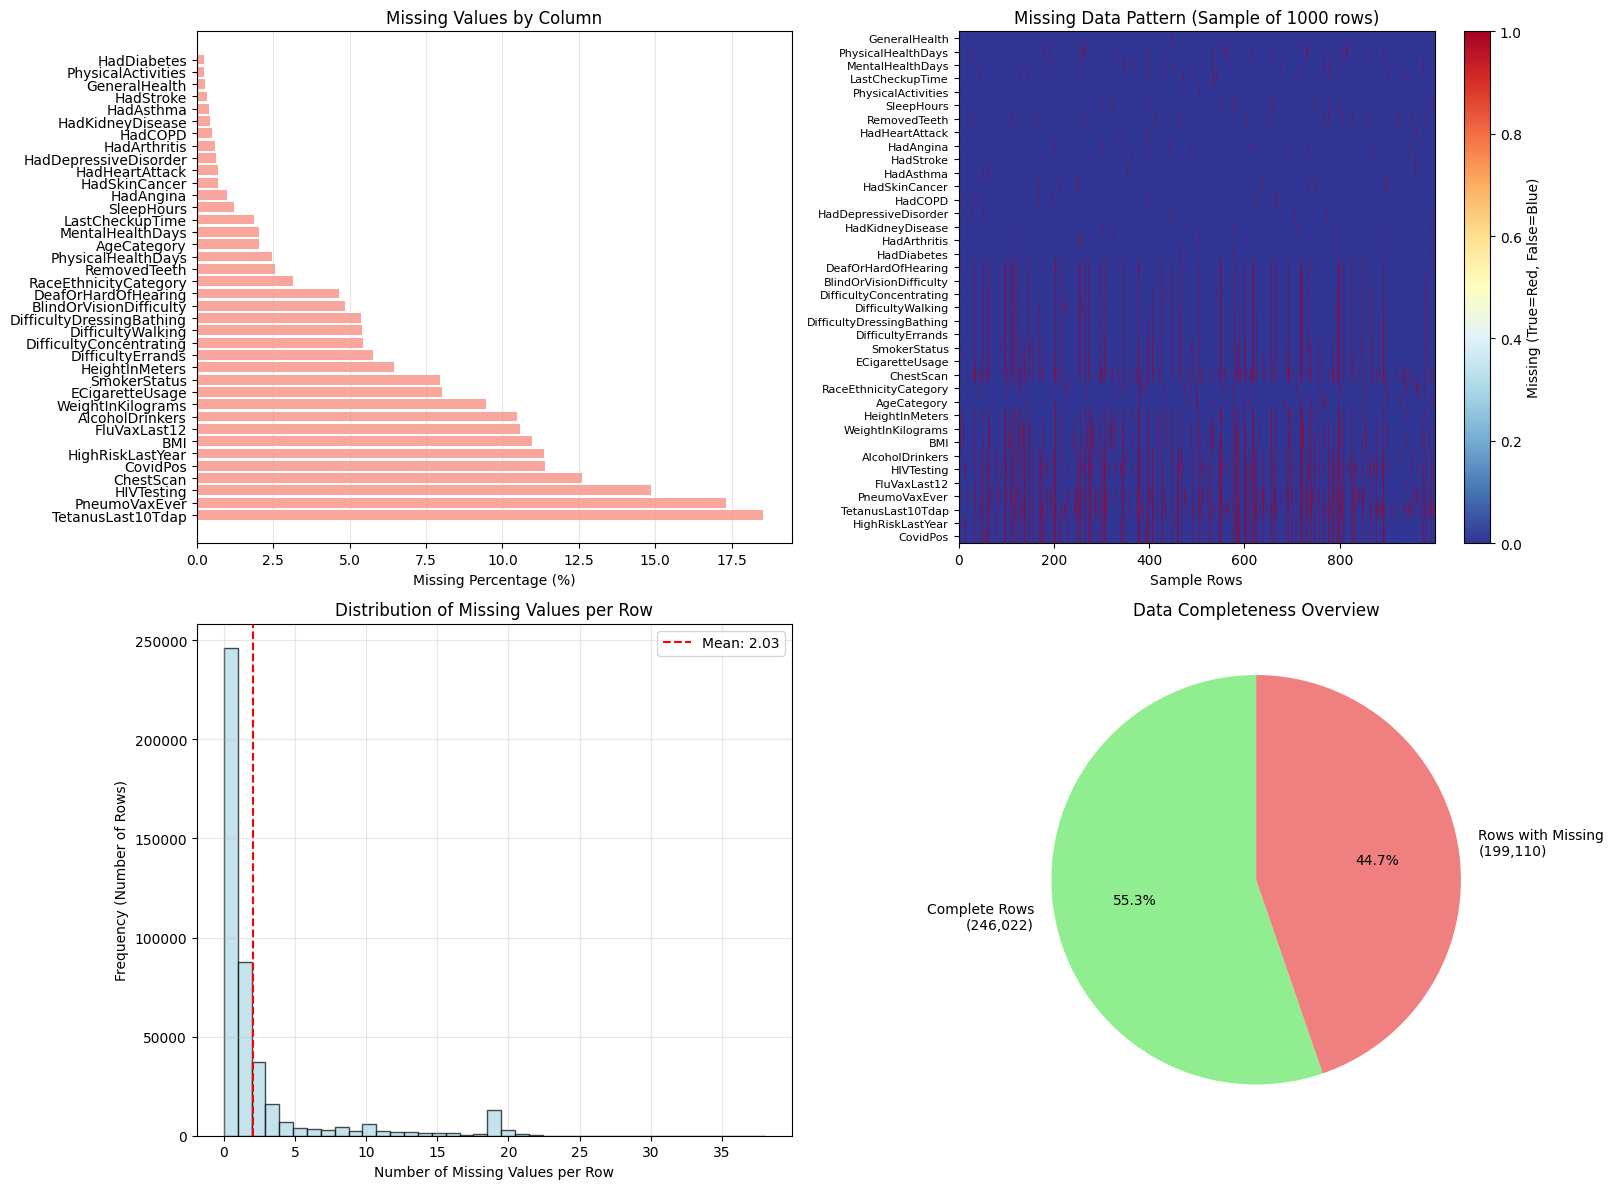


3. MISSING DATA PATTERNS ANALYSIS
------------------------------------------------------------
Pattern Analysis:
Strong correlations in missing patterns found:
  - DeafOrHardOfHearing & BlindOrVisionDifficulty: 0.906
  - DeafOrHardOfHearing & DifficultyConcentrating: 0.850
  - DeafOrHardOfHearing & DifficultyWalking: 0.852
  - DeafOrHardOfHearing & DifficultyDressingBathing: 0.853
  - DeafOrHardOfHearing & DifficultyErrands: 0.822
  - DeafOrHardOfHearing & SmokerStatus: 0.691
  - DeafOrHardOfHearing & ECigaretteUsage: 0.690
  - DeafOrHardOfHearing & ChestScan: 0.538
  - DeafOrHardOfHearing & HeightInMeters: 0.720
  - DeafOrHardOfHearing & WeightInKilograms: 0.561
  - DeafOrHardOfHearing & BMI: 0.543
  - DeafOrHardOfHearing & AlcoholDrinkers: 0.597
  - DeafOrHardOfHearing & FluVaxLast12: 0.592
  - DeafOrHardOfHearing & HighRiskLastYear: 0.568
  - DeafOrHardOfHearing & CovidPos: 0.567
  - BlindOrVisionDifficulty & DifficultyConcentrating: 0.885
  - BlindOrVisionDifficulty & DifficultyWa

In [ ]:
# Calculate missing values for all columns
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Total_Count': len(df),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

# Sort by missing percentage (descending)
missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)

# Display summary table
print(f"{'Column':<25} {'Missing Count':<15} {'Total Count':<12} {'Missing %':<10}")
print("-" * 65)

for _, row in missing_summary.iterrows():
    if row['Missing_Count'] > 0:  # Only show columns with missing values
        print(f"{row['Column']:<25} {row['Missing_Count']:<15} {row['Total_Count']:<12} {row['Missing_Percentage']:<10.2f}%")

# Summary statistics
total_missing_values = missing_summary['Missing_Count'].sum()
total_possible_values = len(df) * len(df.columns)
overall_missing_pct = (total_missing_values / total_possible_values) * 100

print(f"\nOverall missing summary:")
print(f"Total missing values: {total_missing_values:,}")
print(f"Total possible values: {total_possible_values:,}")
print(f"Overall missing percentage: {overall_missing_pct:.2f}%")

# Columns with no missing values
complete_columns = missing_summary[missing_summary['Missing_Count'] == 0]['Column'].tolist()
print(f"\nColumns with NO missing values: {len(complete_columns)}")
print(f"Columns with missing values: {len(missing_summary[missing_summary['Missing_Count'] > 0])}")

# 2. Visualize missing data patterns
print(f"\n2. MISSING DATA VISUALIZATION")
print("-" * 60)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Bar chart of missing values by column
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]
if len(columns_with_missing) > 0:
    axes[0,0].barh(range(len(columns_with_missing)), columns_with_missing['Missing_Percentage'], 
                   color='salmon', alpha=0.7)
    axes[0,0].set_yticks(range(len(columns_with_missing)))
    axes[0,0].set_yticklabels(columns_with_missing['Column'])
    axes[0,0].set_xlabel('Missing Percentage (%)')
    axes[0,0].set_title('Missing Values by Column')
    axes[0,0].grid(axis='x', alpha=0.3)
else:
    axes[0,0].text(0.5, 0.5, 'No Missing Values Found', 
                   ha='center', va='center', transform=axes[0,0].transAxes, fontsize=14)
    axes[0,0].set_title('Missing Values by Column')

# Plot 2: Missing values heatmap (sample of data)
sample_size = min(1000, len(df))  # Sample for visualization
df_sample = df.sample(n=sample_size, random_state=42)
missing_matrix = df_sample.isnull()

# Only show columns that have missing values
cols_with_missing = [col for col in df.columns if df[col].isnull().sum() > 0]
if len(cols_with_missing) > 0:
    missing_subset = missing_matrix[cols_with_missing]
    im = axes[0,1].imshow(missing_subset.T, cmap='RdYlBu_r', aspect='auto')
    axes[0,1].set_yticks(range(len(cols_with_missing)))
    axes[0,1].set_yticklabels(cols_with_missing, fontsize=8)
    axes[0,1].set_xlabel('Sample Rows')
    axes[0,1].set_title(f'Missing Data Pattern (Sample of {sample_size} rows)')
    plt.colorbar(im, ax=axes[0,1], label='Missing (True=Red, False=Blue)')
else:
    axes[0,1].text(0.5, 0.5, 'No Missing Values to Visualize', 
                   ha='center', va='center', transform=axes[0,1].transAxes, fontsize=12)
    axes[0,1].set_title('Missing Data Heatmap')

# Plot 3: Missing values per row distribution
missing_per_row = df.isnull().sum(axis=1)
axes[1,0].hist(missing_per_row, bins=min(50, missing_per_row.max() + 1), 
               color='lightblue', alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Number of Missing Values per Row')
axes[1,0].set_ylabel('Frequency (Number of Rows)')
axes[1,0].set_title('Distribution of Missing Values per Row')
axes[1,0].grid(alpha=0.3)

# Add statistics to the plot
axes[1,0].axvline(missing_per_row.mean(), color='red', linestyle='--', 
                  label=f'Mean: {missing_per_row.mean():.2f}')
axes[1,0].legend()

# Plot 4: Completeness overview (pie chart)
complete_rows = (missing_per_row == 0).sum()
partial_missing = (missing_per_row > 0).sum()

if partial_missing > 0:
    sizes = [complete_rows, partial_missing]
    labels = [f'Complete Rows\n({complete_rows:,})', f'Rows with Missing\n({partial_missing:,})']
    colors = ['lightgreen', 'lightcoral']
    
    axes[1,1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Data Completeness Overview')
else:
    axes[1,1].text(0.5, 0.5, 'All Rows Complete\n(No Missing Values)', 
                   ha='center', va='center', transform=axes[1,1].transAxes, fontsize=12)
    axes[1,1].set_title('Data Completeness Overview')

plt.tight_layout()
plt.show()

# 3. Analyze missing data patterns
print(f"\n3. MISSING DATA PATTERNS ANALYSIS")
print("-" * 60)

# Check for patterns in missing values
print("Pattern Analysis:")

# Are missing values random or systematic?
if total_missing_values > 0:
    # Calculate missing value correlation
    missing_corr = df.isnull().corr()
    
    # Find highly correlated missing patterns (>0.5 correlation)
    high_corr_pairs = []
    for i in range(len(missing_corr.columns)):
        for j in range(i+1, len(missing_corr.columns)):
            corr_val = missing_corr.iloc[i, j]
            if abs(corr_val) > 0.5 and not np.isnan(corr_val):
                high_corr_pairs.append({
                    'col1': missing_corr.columns[i],
                    'col2': missing_corr.columns[j],
                    'correlation': corr_val
                })
    
    if high_corr_pairs:
        print("Strong correlations in missing patterns found:")
        for pair in high_corr_pairs:
            print(f"  - {pair['col1']} & {pair['col2']}: {pair['correlation']:.3f}")
        print("\nThis suggests SYSTEMATIC missing patterns (not random)")
    else:
        print("No strong correlations in missing patterns found")
        print("Missing values appear to be more RANDOM in nature")
    
    # Rows with the most missing values
    max_missing_per_row = missing_per_row.max()
    rows_most_missing = (missing_per_row == max_missing_per_row).sum()
    
    print(f"\nMissing values distribution:")
    print(f"  - Maximum missing values in a single row: {max_missing_per_row}")
    print(f"  - Number of rows with maximum missing: {rows_most_missing}")
    print(f"  - Average missing values per row: {missing_per_row.mean():.2f}")
    print(f"  - Rows with no missing values: {complete_rows:,} ({(complete_rows/len(df)*100):.1f}%)")
    
    # Check if certain groups have more missing values
    print(f"\n4. GROUP-BASED MISSING PATTERNS")
    print("-" * 60)
    
    # Analyze missing patterns by key demographic variables
    demographic_cols = ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory']
    
    for col in demographic_cols:
        if col in df.columns and not df[col].isnull().all():
            print(f"\nMissing patterns by {col}:")
            
            # Calculate missing percentage by group
            group_missing = df.groupby(col)[missing_summary[missing_summary['Missing_Count'] > 0]['Column'].tolist()].apply(
                lambda x: x.isnull().sum() / len(x) * 100
            )
            
            if len(group_missing) > 0:
                # Show top 3 groups with most missing values
                total_missing_by_group = group_missing.sum(axis=1).sort_values(ascending=False)
                print(f"  Top 3 groups with most missing data:")
                for i, (group, missing_pct) in enumerate(total_missing_by_group.head(3).items()):
                    print(f"    {i+1}. {group}: {missing_pct:.1f}% average missing")
            else:
                print(f"  No missing patterns to analyze for {col}")

else:
    print("No missing values found in the dataset!")
    print("Data appears to be complete across all columns and rows.")

print("\n" + "=" * 80)

### Per Column Strategy: 
<ol>
<li> Why might values be missing? (random, not applicable, data collection issue) 
<li> What is your plan to handle them? (remove, impute, keep as separate category) 
<ol>

In [ ]:
# Per-Column Missing Data Strategy Analysis

# Get columns with missing values
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0].copy()

# Define column categories based on the 7 main groups
column_categories = {
    'Demographics': ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory'],
    'Heart Conditions': ['HadHeartAttack', 'HadAngina', 'HadStroke'],
    'Physical Health Metrics': ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'BMI', 'HeightInMeters', 'WeightInKilograms'],
    'Chronic Conditions': ['HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'],
    'Disabilities': ['DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands'],
    'Lifestyle': ['SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepHours'],
    'Healthcare & Prevention': ['LastCheckupTime', 'RemovedTeeth', 'ChestScan', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
}

# Strategy rules based on missing percentage and data type
def get_strategy(column, missing_pct, is_categorical=True):
    """Determine handling strategy based on column characteristics"""
    
    if missing_pct < 5:
        if is_categorical:
            return "Drop rows (low impact)", "Removal"
        else:
            return "Mean/Median imputation", "Imputation"
    else:
        if is_categorical:
            return "Create 'Unknown/Missing' category", "New Category"
        else:
            return "Advanced imputation (KNN/Model-based)", "Advanced Imputation"

# Analyze each column with missing values
for idx, row in columns_with_missing.iterrows():
    col = row['Column']
    missing_count = row['Missing_Count']
    missing_pct = row['Missing_Percentage']
    
    print(f"\n📊 COLUMN: {col}")
    print("=" * 60)
    
    # Determine category
    category = "Uncategorized"
    for cat_name, cat_cols in column_categories.items():
        if col in cat_cols:
            category = cat_name
            break
    
    print(f"Category: {category}")
    print(f"Missing: {missing_count:,} ({missing_pct:.2f}%)")
    
    # Determine if categorical or numerical
    is_categorical = df[col].dtype == 'object'
    data_type = "Categorical" if is_categorical else "Numerical"
    print(f"Data Type: {data_type}")
    
    # Get current values for context
    if is_categorical:
        unique_vals = df[col].dropna().unique()
        print(f"Current Values: {list(unique_vals)[:5]}")  # Show first 5
        if len(unique_vals) > 5:
            print(f"... and {len(unique_vals)-5} more categories")
    else:
        print(f"Range: {df[col].min():.2f} - {df[col].max():.2f}")
    
    print("\n🔍 Reasons for MISSING values:")
    
    # Category-specific reasons for missing values
    if category == "Demographics":
        print("   • Participant privacy concerns or refusal to disclose")
        print("   • Data collection errors or system issues")
        print("   • Survey skip patterns or incomplete responses")
        
    elif category == "Heart Conditions":
        print("   • Participant unaware of condition (undiagnosed)")
        print("   • Reluctance to disclose serious medical conditions")
        print("   • 'Don't know' responses for uncertain diagnoses")
        
    elif category == "Physical Health Metrics":
        print("   • Measurement not taken during survey")
        print("   • Participant unable/unwilling to provide measurement")
        print("   • Equipment issues or self-reporting difficulties")
        
    elif category == "Chronic Conditions":
        print("   • Participant unaware of condition (undiagnosed)")
        print("   • Reluctance to disclose medical information")
        print("   • 'Don't know' responses in original survey")
        
    elif category == "Disabilities":
        print("   • Sensitive topic - reluctance to disclose")
        print("   • Unclear question interpretation")
        print("   • Question not applicable to participant")
        
    elif category == "Lifestyle":
        print("   • Privacy concerns about personal habits")
        print("   • Social desirability bias (underreporting)")
        print("   • Unclear question interpretation")
        
    elif category == "Healthcare & Prevention":
        print("   • Memory issues (can't recall exact timing)")
        print("   • Question not applicable to participant")
        print("   • Survey fatigue or incomplete responses")
        
    else:  # Uncategorized
        print("   • General survey non-response")
        print("   • Question complexity or ambiguity")
        print("   • Random data collection issues")
    
    # Get strategy recommendation
    strategy, strategy_type = get_strategy(col, missing_pct, is_categorical)
    
    print(f"\n RECOMMENDED STRATEGY: {strategy}")
    print(f"Strategy Type: {strategy_type}")
    
    print("\n📝 IMPLEMENTATION:")
    
    if strategy_type == "Removal":
        print(f"   # Remove rows with missing {col}")
        print(f"   df_clean = df.dropna(subset=['{col}'])")
        print(f"   # Impact: Removes {missing_count:,} rows ({missing_pct:.1f}% of data)")
        
    elif strategy_type == "New Category":
        print(f"   # Create 'Unknown' category for missing {col}")
        print(f"   df['{col}'] = df['{col}'].fillna('Unknown')")
        print(f"   # Preserves all {missing_count:,} observations with missing info")
        
    elif strategy_type == "Imputation":
        if is_categorical:
            print(f"   # Mode imputation for {col}")
            print(f"   mode_value = df['{col}'].mode().iloc[0]")
            print(f"   df['{col}'] = df['{col}'].fillna(mode_value)")
        else:
            print(f"   # Median imputation for {col}")
            print(f"   median_value = df['{col}'].median()")
            print(f"   df['{col}'] = df['{col}'].fillna(median_value)")
            
    elif strategy_type == "Advanced Imputation":
        print(f"   # KNN imputation for {col}")
        print(f"   from sklearn.impute import KNNImputer")
        print(f"   # Select related columns for imputation")
        print(f"   imputer = KNNImputer(n_neighbors=5)")
        print(f"   # Apply to numerical subset including {col}")
        
    print("\n⚖️ IMPACT ASSESSMENT:")
    
    if missing_pct < 5:
        impact = "Low"
        print(f"   Impact Level: {impact}")
        print("   • Minimal effect on sample size and representativeness")
        print("   • Low risk of introducing bias")
        
    elif missing_pct < 15:
        impact = "Moderate"
        print(f"   Impact Level: {impact}")
        print("   • Noticeable reduction in sample size if dropped")
        print("   • Moderate risk of bias if not handled properly")
        print("   • Consider imputation over removal")
        
    else:
        impact = "High"
        print(f"   Impact Level: {impact}")
        print("   • Major sample size reduction if dropped")
        print("   • High risk of selection bias")
        print("   • Imputation or new category strongly recommended")
    
    print("-" * 60)

======================= PER-COLUMN MISSING DATA STRATEGY ANALYSIS ========================

📊 COLUMN: TetanusLast10Tdap
Category: Healthcare & Prevention
Missing: 82,516 (18.54%)
Data Type: Categorical
Current Values: ['Yes, received tetanus shot but not sure what type', 'No, did not receive any tetanus shot in the past 10 years', 'Yes, received Tdap', 'Yes, received tetanus shot, but not Tdap']

🔍 WHY VALUES MIGHT BE MISSING:
   • Memory issues (can't recall exact timing)
   • Question not applicable to participant
   • Survey fatigue or incomplete responses

💡 RECOMMENDED STRATEGY: Create 'Unknown/Missing' category
Strategy Type: New Category

📝 IMPLEMENTATION:
   # Create 'Unknown' category for missing TetanusLast10Tdap
   df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].fillna('Unknown')
   # Preserves all 82,516 observations with missing info

⚖️ IMPACT ASSESSMENT:
   Impact Level: High
   • Major sample size reduction if dropped
   • High risk of selection bias
   • Imputation o

Preliminary Patterns: 
• Calculate correlation matrix for numerical variables 
• Create correlation heatmap 
• Identify strongly correlated pairs (positive or negative) 
• Are there any surprising relationships? 

=== CORRELATION ANALYSIS FOR NUMERICAL VARIABLES ===

Numerical columns found: 6
Columns: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

Correlation matrix shape: (6, 6)

First few correlations:
                    PhysicalHealthDays  MentalHealthDays  SleepHours  \
PhysicalHealthDays            1.000000          0.321349   -0.055906   
MentalHealthDays              0.321349          1.000000   -0.129075   
SleepHours                   -0.055906         -0.129075    1.000000   
HeightInMeters               -0.050867         -0.049473   -0.014668   
WeightInKilograms             0.072838          0.040345   -0.053521   

                    HeightInMeters  WeightInKilograms       BMI  
PhysicalHealthDays       -0.050867           0.072838  0.112865  
MentalHealthDays         -0.049473           0.040345  0.075891  
SleepHours               -0.014668          -0.053521 -0.050805  
HeightInMeters            1.000000           0.4678

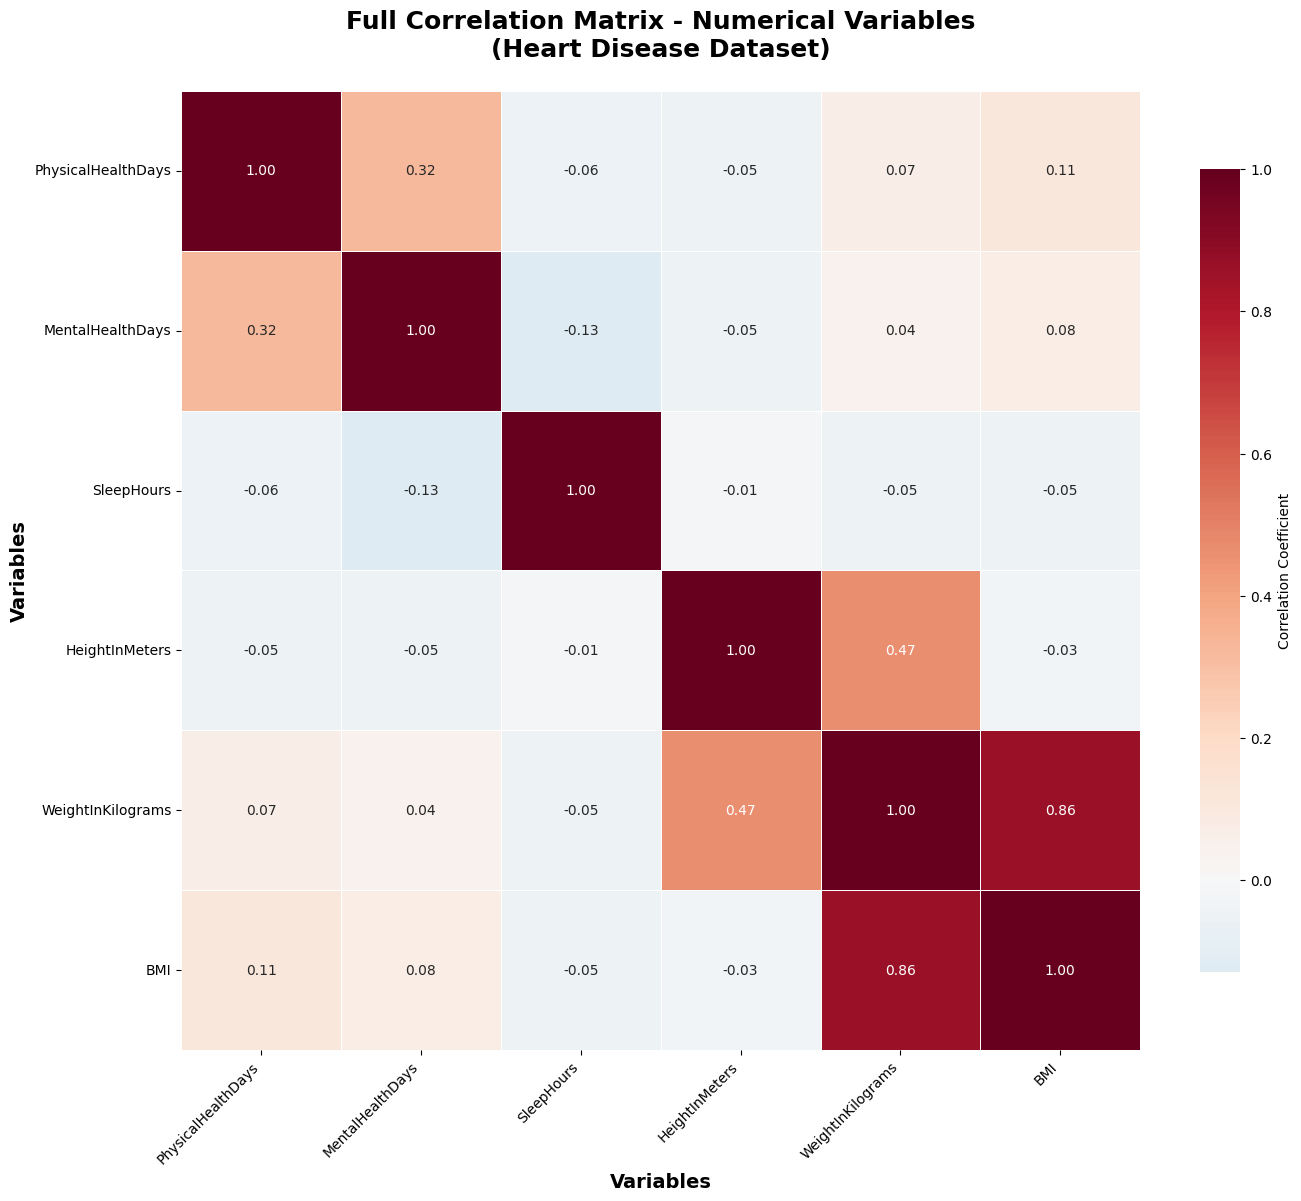


=== CORRELATION SUMMARY STATISTICS ===
Mean correlation (excluding diagonal): 0.101
Max correlation (excluding diagonal): 0.860
Min correlation (excluding diagonal): -0.129
=== STRONGLY CORRELATED PAIRS ANALYSIS ===


--- CORRELATIONS > 0.3 ---
Found 3 pairs:
  WeightInKilograms ↔ BMI: 0.860 (positive)
  HeightInMeters ↔ WeightInKilograms: 0.468 (positive)
  PhysicalHealthDays ↔ MentalHealthDays: 0.321 (positive)

--- CORRELATIONS > 0.5 ---
Found 1 pairs:
  WeightInKilograms ↔ BMI: 0.860 (positive)

--- CORRELATIONS > 0.7 ---
Found 1 pairs:
  WeightInKilograms ↔ BMI: 0.860 (positive)

=== TOP 10 STRONGEST CORRELATIONS ===
Rank | Variable 1 | Variable 2 | Correlation | Type
------------------------------------------------------------
 1   | WeightInKilograms | BMI          |    0.860    | Strong Positive
 2   | HeightInMeters | WeightInKilograms |    0.468    | Moderate Positive
 3   | PhysicalHealthDays | MentalHealthDays |    0.321    | Moderate Positive
 4   | MentalHealthDays | Sle

In [11]:
# Calculate correlation matrix for numerical variables
print("=== CORRELATION ANALYSIS FOR NUMERICAL VARIABLES ===\n")

# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns found: {len(numerical_cols)}")
print(f"Columns: {numerical_cols}\n")

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

print("Correlation matrix shape:", correlation_matrix.shape)
print("\nFirst few correlations:")
print(correlation_matrix.head())

# Create correlation heatmap - Full matrix (no masking)
plt.figure(figsize=(14, 12))

# Create a beautiful heatmap with full correlation matrix
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={
                'label': 'Correlation Coefficient',
                'shrink': 0.8,
                'aspect': 20
            })

plt.title('Full Correlation Matrix - Numerical Variables\n(Heart Disease Dataset)', 
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Variables', fontsize=14, fontweight='bold')
plt.ylabel('Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Summary statistics for correlations
print("\n=== CORRELATION SUMMARY STATISTICS ===")
print(f"Mean correlation (excluding diagonal): {correlation_matrix.values[~np.eye(correlation_matrix.shape[0], dtype=bool)].mean():.3f}")
print(f"Max correlation (excluding diagonal): {correlation_matrix.values[~np.eye(correlation_matrix.shape[0], dtype=bool)].max():.3f}")
print(f"Min correlation (excluding diagonal): {correlation_matrix.values[~np.eye(correlation_matrix.shape[0], dtype=bool)].min():.3f}")

# Identify strongly correlated pairs
print("=== STRONGLY CORRELATED PAIRS ANALYSIS ===\n")

# Function to find strongly correlated pairs
def find_strong_correlations(corr_matrix, threshold=0.5):
    """
    Find pairs of variables with strong correlations (absolute value > threshold)
    """
    strong_pairs = []
    
    # Get the upper triangle of the correlation matrix (excluding diagonal)
    upper_triangle = np.triu(corr_matrix, k=1)
    
    # Find indices where absolute correlation > threshold
    strong_indices = np.where(np.abs(upper_triangle) > threshold)
    
    # Extract the pairs and their correlation values
    for i, j in zip(strong_indices[0], strong_indices[1]):
        var1 = corr_matrix.index[i]
        var2 = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]
        strong_pairs.append((var1, var2, correlation))
    
    # Sort by absolute correlation value (descending)
    strong_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    return strong_pairs

# Find strong correlations with different thresholds
thresholds = [0.3, 0.5, 0.7]

for threshold in thresholds:
    strong_correlations = find_strong_correlations(correlation_matrix, threshold)
    
    print(f"\n--- CORRELATIONS > {threshold} ---")
    if strong_correlations:
        print(f"Found {len(strong_correlations)} pairs:")
        for var1, var2, corr in strong_correlations:
            direction = "positive" if corr > 0 else "negative"
            print(f"  {var1} ↔ {var2}: {corr:.3f} ({direction})")
    else:
        print(f"No correlations found above {threshold} threshold")

print(f"\n=== TOP 10 STRONGEST CORRELATIONS ===")
all_strong = find_strong_correlations(correlation_matrix, threshold=0.1)
print("Rank | Variable 1 | Variable 2 | Correlation | Type")
print("-" * 60)
for i, (var1, var2, corr) in enumerate(all_strong[:10], 1):
    corr_type = "Strong Positive" if corr > 0.5 else "Strong Negative" if corr < -0.5 else "Moderate Positive" if corr > 0.3 else "Moderate Negative" if corr < -0.3 else "Weak"
    print(f"{i:2d}   | {var1:<12} | {var2:<12} | {corr:8.3f}    | {corr_type}")
    
# Analyze surprising relationships and domain insights
print("=== DOMAIN-SPECIFIC CORRELATION INSIGHTS ===\n")

# Define expected relationships in heart disease context
expected_relationships = {
    "Expected Strong Positive": [
        ("Age", "various chronic conditions"),
        ("BMI", "diabetes/obesity indicators"),
        ("Physical health issues", "mental health issues")
    ],
    "Expected Strong Negative": [
        ("Physical activity", "chronic conditions"),
        ("Good health practices", "disease indicators")
    ]
}

print("EXPECTED RELATIONSHIPS IN HEART DISEASE CONTEXT:")
for category, relationships in expected_relationships.items():
    print(f"\n{category}:")
    for relationship in relationships:
        print(f"  • {relationship[0]} with {relationship[1]}")

# Look for potentially surprising relationships
print(f"\n=== POTENTIALLY SURPRISING FINDINGS ===")
surprising_threshold = 0.4

# Get all strong correlations
strong_pairs = find_strong_correlations(correlation_matrix, threshold=surprising_threshold)

if strong_pairs:
    print(f"\nStrong correlations (|r| > {surprising_threshold}) that might be interesting:")
    print("=" * 70)
    
    for var1, var2, corr in strong_pairs:
        interpretation = ""
        
        # Add domain-specific interpretations
        if corr > 0:
            interpretation = f"As {var1} increases, {var2} tends to increase"
        else:
            interpretation = f"As {var1} increases, {var2} tends to decrease"
            
        print(f"\n{var1} ↔ {var2}")
        print(f"  Correlation: {corr:.3f}")
        print(f"  Pattern: {interpretation}")
        print(f"  Clinical relevance: [Requires domain expertise to interpret]")

else:
    print("No particularly strong correlations found that would be considered surprising.")

# Summary insights
print(f"\n=== KEY INSIGHTS SUMMARY ===")
print(f"• Total numerical variables analyzed: {len(numerical_cols)}")
print(f"• Variables with strong correlations (>0.5): {len([x for x in strong_pairs if abs(x[2]) > 0.5])}")
print(f"• Variables with moderate correlations (0.3-0.5): {len([x for x in strong_pairs if 0.3 <= abs(x[2]) <= 0.5])}")
print(f"• Most variables show weak to moderate correlations, suggesting complex relationships")
print(f"• Strongest correlation found: {max([abs(x[2]) for x in all_strong]):.3f}" if all_strong else "None above threshold")

print(f"\n🔍 RECOMMENDATION FOR NEXT STEPS:")
print(f"• Investigate non-linear relationships using scatter plots")
print(f"• Consider categorical variables' relationships with numerical ones")
print(f"• Examine correlations within specific subgroups (e.g., by age, gender)")
print(f"• Look for interaction effects between variables")


Cross-tabulations: 
• For important categorical × categorical combinations, create frequency tables  
• For numerical × categorical combinations, create grouped summary statistics 

=== CATEGORICAL × CATEGORICAL CROSS-TABULATIONS ===

Categorical columns found: 34
Columns: ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


CROSS-TABULATION: HadHeartAttack × Sex
Categorical columns found: 34
Columns: ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 

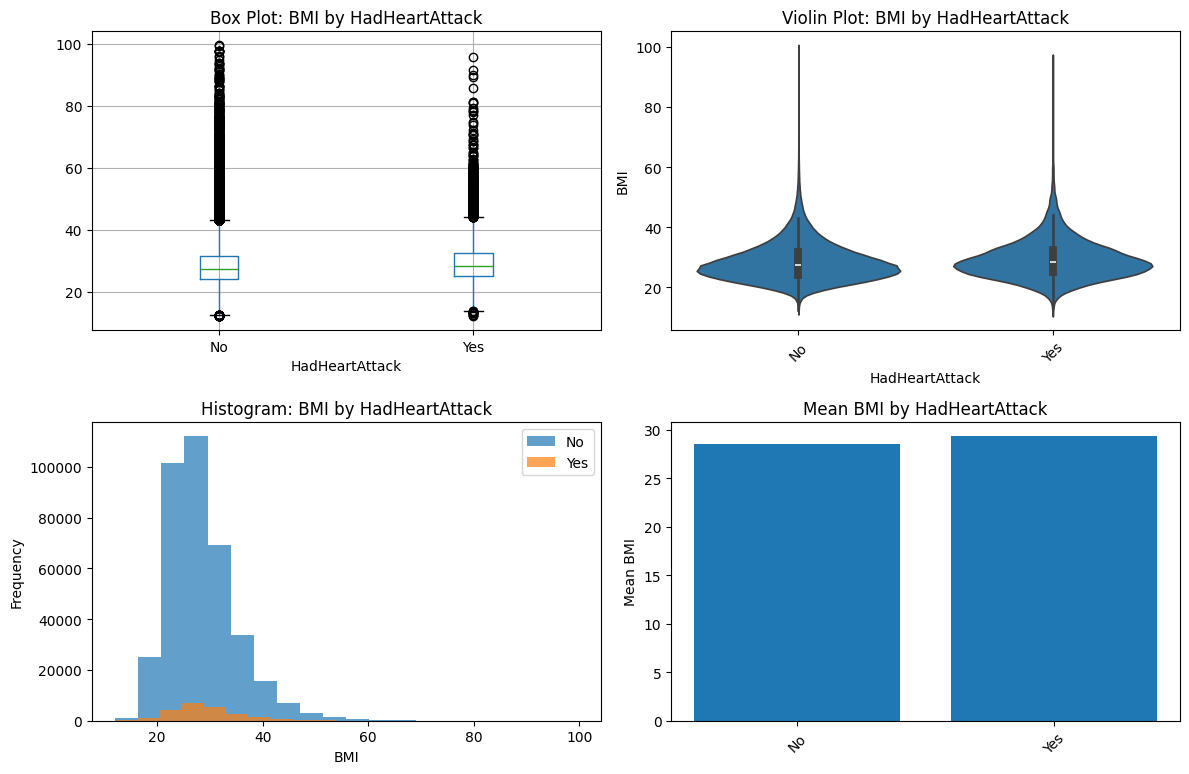


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: BMI | Categorical: Sex

--- GROUPED SUMMARY STATISTICS ---
         Count   Mean  Median  Std Dev    Min    Max     Q1     Q3
Sex                                                               
Female  202662  28.46   27.32     7.08  12.02  97.65  23.44  32.01
Male    193664  28.61   27.60     5.95  12.06  99.64  24.63  31.47

--- ADDITIONAL STATISTICS ---

--- GROUPED SUMMARY STATISTICS ---
         Count   Mean  Median  Std Dev    Min    Max     Q1     Q3
Sex                                                               
Female  202662  28.46   27.32     7.08  12.02  97.65  23.44  32.01
Male    193664  28.61   27.60     5.95  12.06  99.64  24.63  31.47

--- ADDITIONAL STATISTICS ---
Female:
  Range: 85.63
  IQR: 8.57
  CV: 24.88%
Female:
  Range: 85.63
  IQR: 8.57
  CV: 24.88%
Male:
  Range: 87.58
  IQR: 6.84
  CV: 20.82%

--- STATISTICAL TESTS ---
Male:
  Range: 87.58
  IQR: 6.84
  CV: 20.82%

--- STATISTICAL TESTS ---
One-way ANOVA F-stat

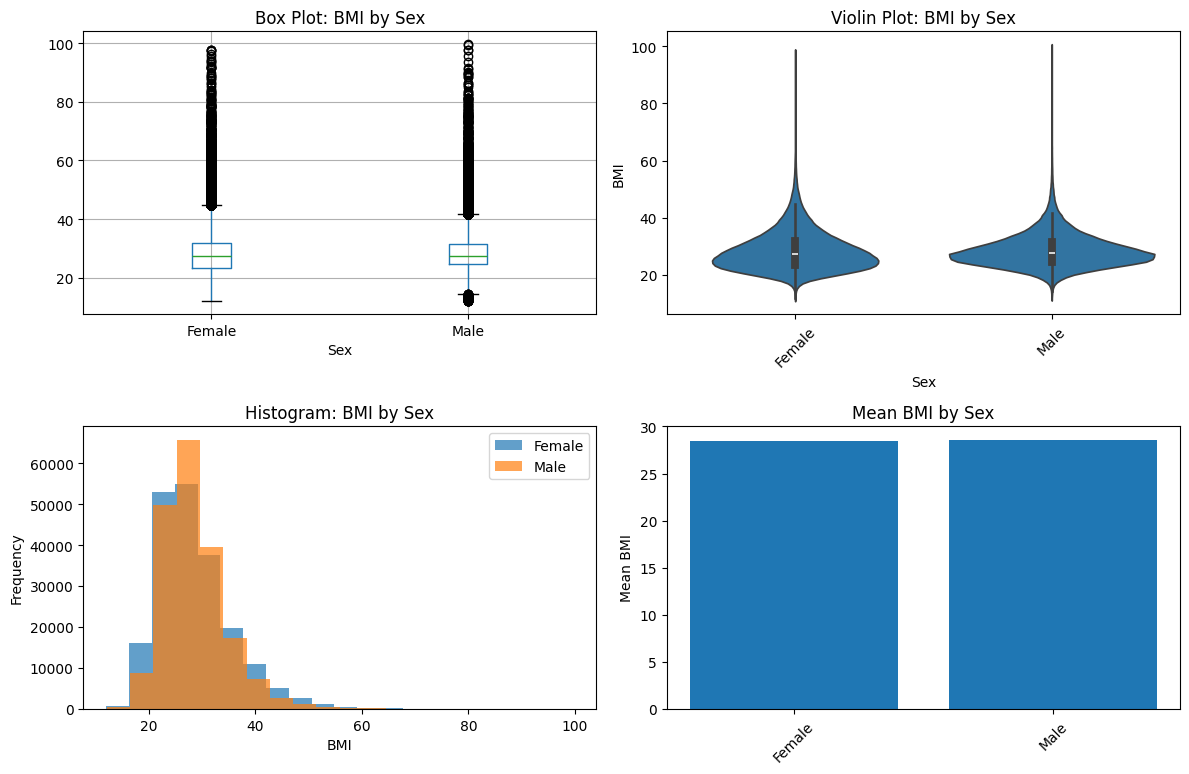


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: BMI | Categorical: AgeCategory

--- GROUPED SUMMARY STATISTICS ---
                 Count   Mean  Median  Std Dev    Min    Max     Q1     Q3
AgeCategory                                                               
Age 18 to 24     23870  26.05   24.41     6.46  12.16  97.65  21.63  29.05
Age 25 to 29     19311  27.83   26.50     6.86  12.19  89.26  23.06  31.09
Age 30 to 34     22406  28.70   27.32     7.08  12.15  97.43  23.73  32.10
Age 35 to 39     25121  29.06   27.62     7.04  12.36  93.51  24.28  32.44
Age 40 to 44     26564  29.47   28.17     7.08  12.16  91.45  24.67  32.89
Age 45 to 49     25454  29.73   28.35     7.07  12.06  99.34  24.96  33.07
Age 50 to 54     30043  29.83   28.70     6.93  12.11  97.65  25.09  33.23
Age 55 to 59     33058  29.57   28.35     6.72  12.21  89.97  25.06  32.87
Age 60 to 64     40141  29.10   28.13     6.52  12.05  97.65  24.69  32.28
Age 65 to 69     42784  28.78   27.89     6.26  12.16  99.64  2

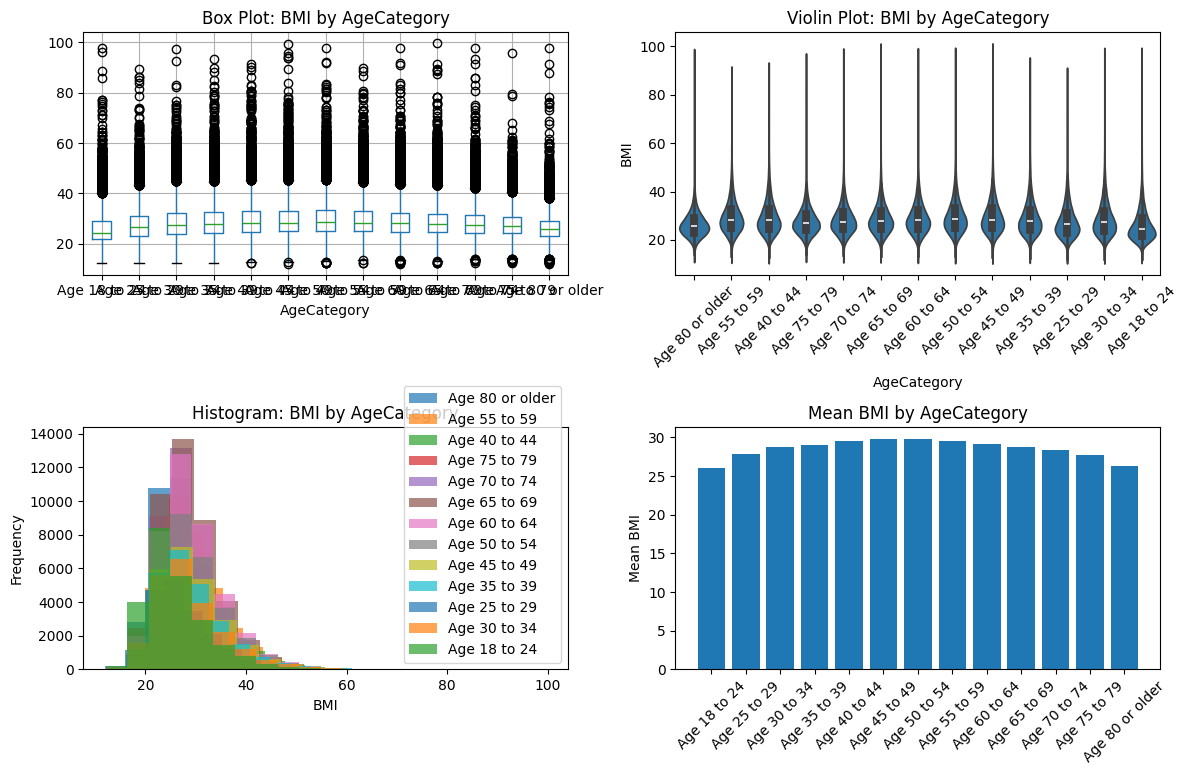


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: BMI | Categorical: GeneralHealth

--- GROUPED SUMMARY STATISTICS ---
                Count   Mean  Median  Std Dev    Min    Max     Q1     Q3
GeneralHealth                                                            
Excellent       63830  26.06   25.29     4.92  12.11  92.73  22.81  28.34
Fair            53672  30.73   29.44     7.94  12.11  99.64  25.10  34.95
Good           126612  29.51   28.50     6.68  12.06  95.66  24.96  33.00
Poor            17735  30.51   29.01     8.89  12.05  99.34  24.39  34.77
Very good      133590  27.63   26.83     5.51  12.02  97.65  23.88  30.41

--- ADDITIONAL STATISTICS ---

--- GROUPED SUMMARY STATISTICS ---
                Count   Mean  Median  Std Dev    Min    Max     Q1     Q3
GeneralHealth                                                            
Excellent       63830  26.06   25.29     4.92  12.11  92.73  22.81  28.34
Fair            53672  30.73   29.44     7.94  12.11  99.64  25.10  34.95
Good 

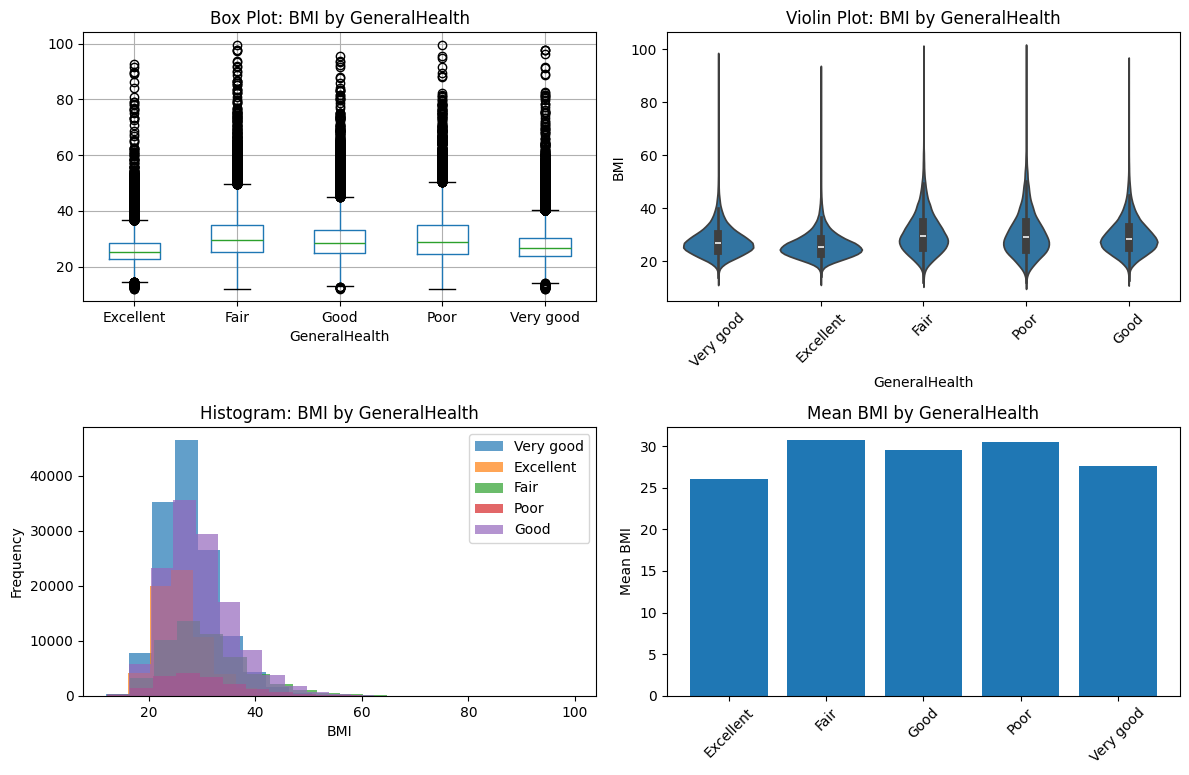


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: PhysicalHealthDays | Categorical: HadHeartAttack

--- GROUPED SUMMARY STATISTICS ---
                 Count  Mean  Median  Std Dev  Min   Max   Q1    Q3
HadHeartAttack                                                     
No              407324  4.02     0.0     8.32  0.0  30.0  0.0   3.0
Yes              24146  9.39     2.0    12.05  0.0  30.0  0.0  20.0

--- ADDITIONAL STATISTICS ---

--- GROUPED SUMMARY STATISTICS ---
                 Count  Mean  Median  Std Dev  Min   Max   Q1    Q3
HadHeartAttack                                                     
No              407324  4.02     0.0     8.32  0.0  30.0  0.0   3.0
Yes              24146  9.39     2.0    12.05  0.0  30.0  0.0  20.0

--- ADDITIONAL STATISTICS ---
No:
  Range: 30.00
  IQR: 3.00
  CV: 206.93%
No:
  Range: 30.00
  IQR: 3.00
  CV: 206.93%
Yes:
  Range: 30.00
  IQR: 20.00
  CV: 128.23%

--- STATISTICAL TESTS ---
Yes:
  Range: 30.00
  IQR: 20.00
  CV: 128.23%

--- STATISTICAL 

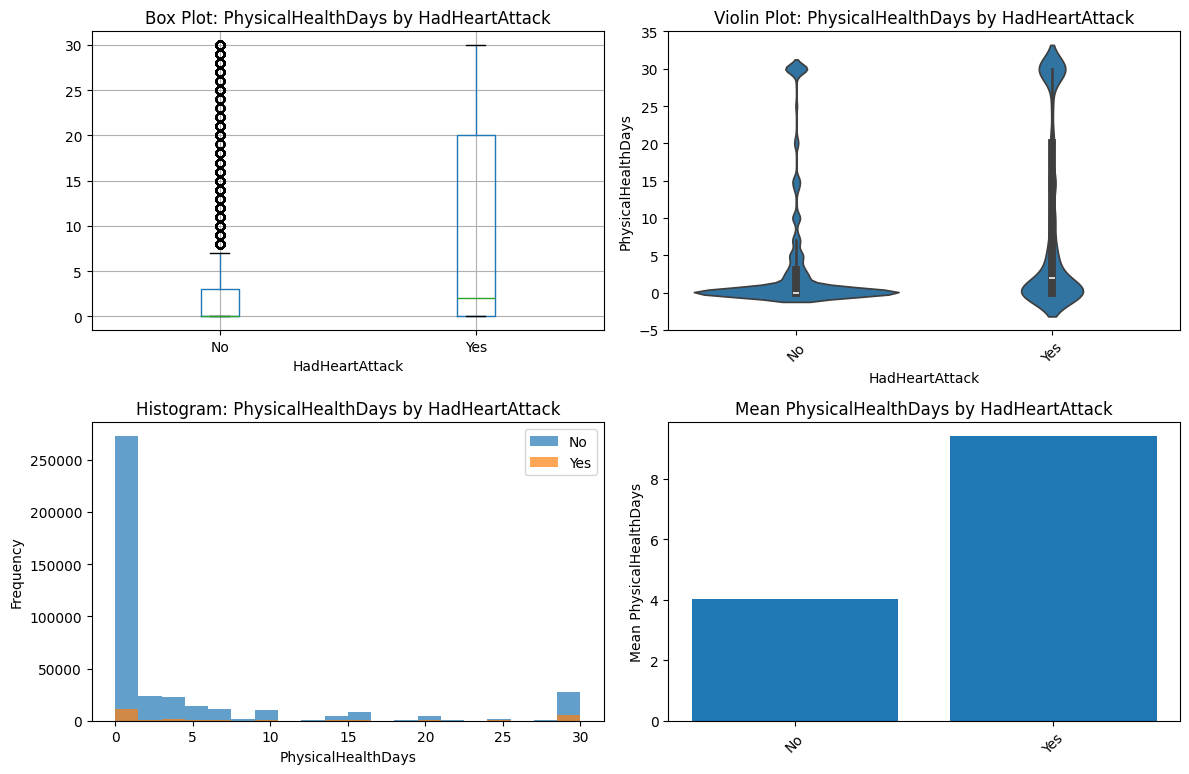


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: PhysicalHealthDays | Categorical: GeneralHealth

--- GROUPED SUMMARY STATISTICS ---
                Count   Mean  Median  Std Dev  Min   Max    Q1    Q3
GeneralHealth                                                       
Excellent       71051   1.05     0.0     3.91  0.0  30.0   0.0   0.0
Fair            57016  10.97     5.0    11.66  0.0  30.0   0.0  20.0
Good           139744   3.46     0.0     7.12  0.0  30.0   0.0   3.0
Poor            18939  23.61    30.0    10.08  0.0  30.0  20.0  30.0
Very good      146553   1.70     0.0     4.78  0.0  30.0   0.0   1.0

--- ADDITIONAL STATISTICS ---

--- GROUPED SUMMARY STATISTICS ---
                Count   Mean  Median  Std Dev  Min   Max    Q1    Q3
GeneralHealth                                                       
Excellent       71051   1.05     0.0     3.91  0.0  30.0   0.0   0.0
Fair            57016  10.97     5.0    11.66  0.0  30.0   0.0  20.0
Good           139744   3.46     0.0     7.12

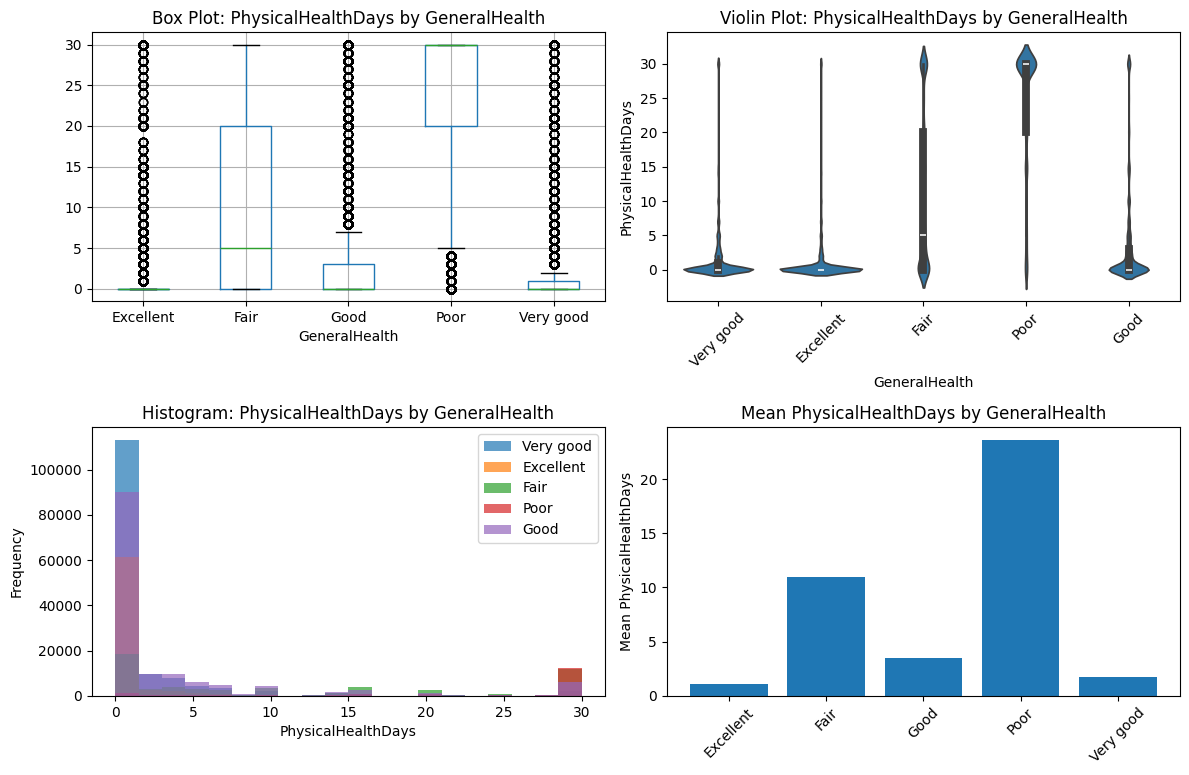


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: MentalHealthDays | Categorical: HadHeartAttack

--- GROUPED SUMMARY STATISTICS ---
                 Count  Mean  Median  Std Dev  Min   Max   Q1   Q3
HadHeartAttack                                                    
No              408870  4.31     0.0     8.27  0.0  30.0  0.0  4.0
Yes              24405  5.39     0.0     9.82  0.0  30.0  0.0  5.0

--- ADDITIONAL STATISTICS ---

--- GROUPED SUMMARY STATISTICS ---
                 Count  Mean  Median  Std Dev  Min   Max   Q1   Q3
HadHeartAttack                                                    
No              408870  4.31     0.0     8.27  0.0  30.0  0.0  4.0
Yes              24405  5.39     0.0     9.82  0.0  30.0  0.0  5.0

--- ADDITIONAL STATISTICS ---
No:
  Range: 30.00
  IQR: 4.00
  CV: 191.96%
No:
  Range: 30.00
  IQR: 4.00
  CV: 191.96%
Yes:
  Range: 30.00
  IQR: 5.00
  CV: 182.14%

--- STATISTICAL TESTS ---
Yes:
  Range: 30.00
  IQR: 5.00
  CV: 182.14%

--- STATISTICAL TESTS ---
On

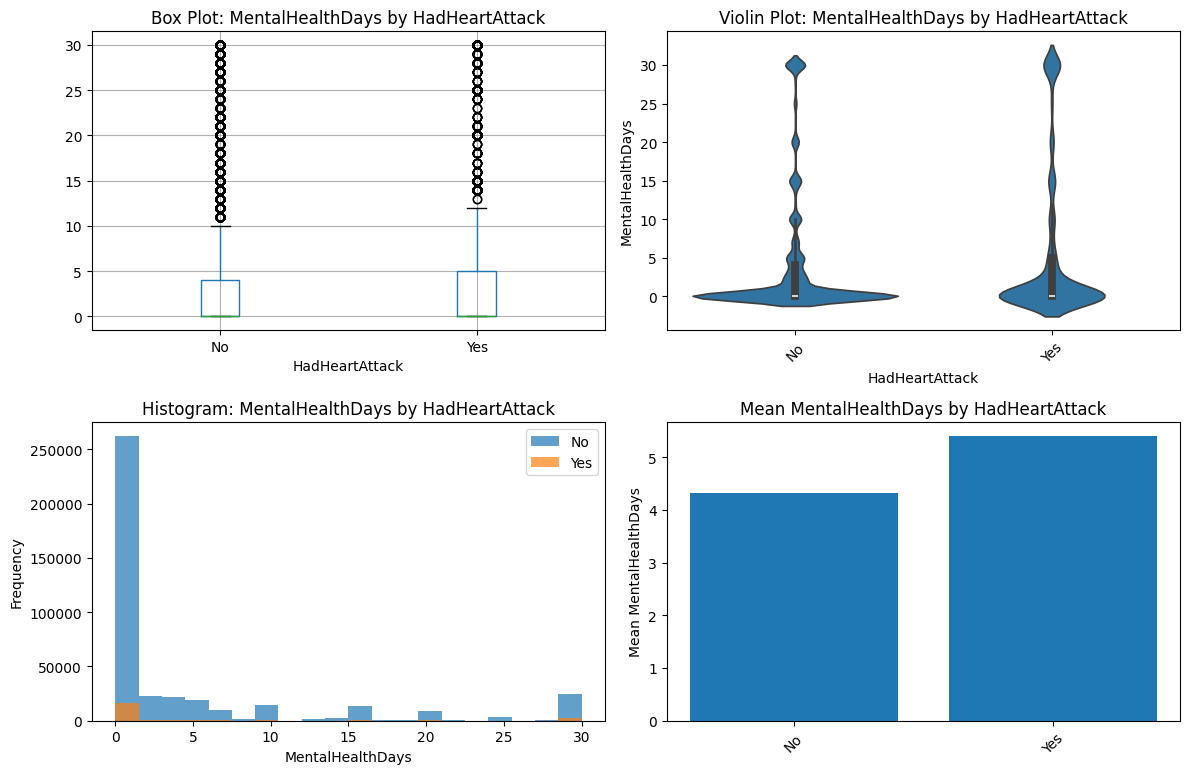


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: MentalHealthDays | Categorical: Sex

--- GROUPED SUMMARY STATISTICS ---
         Count  Mean  Median  Std Dev  Min   Max   Q1   Q3
Sex                                                       
Female  231010  5.01     0.0     8.77  0.0  30.0  0.0  5.0
Male    205055  3.67     0.0     7.88  0.0  30.0  0.0  3.0

--- ADDITIONAL STATISTICS ---

--- GROUPED SUMMARY STATISTICS ---
         Count  Mean  Median  Std Dev  Min   Max   Q1   Q3
Sex                                                       
Female  231010  5.01     0.0     8.77  0.0  30.0  0.0  5.0
Male    205055  3.67     0.0     7.88  0.0  30.0  0.0  3.0

--- ADDITIONAL STATISTICS ---
Female:
  Range: 30.00
  IQR: 5.00
  CV: 174.88%
Female:
  Range: 30.00
  IQR: 5.00
  CV: 174.88%
Male:
  Range: 30.00
  IQR: 3.00
  CV: 214.53%

--- STATISTICAL TESTS ---
Male:
  Range: 30.00
  IQR: 3.00
  CV: 214.53%

--- STATISTICAL TESTS ---
One-way ANOVA F-statistic: 2795.7232
p-value: 0.0000
Significant di

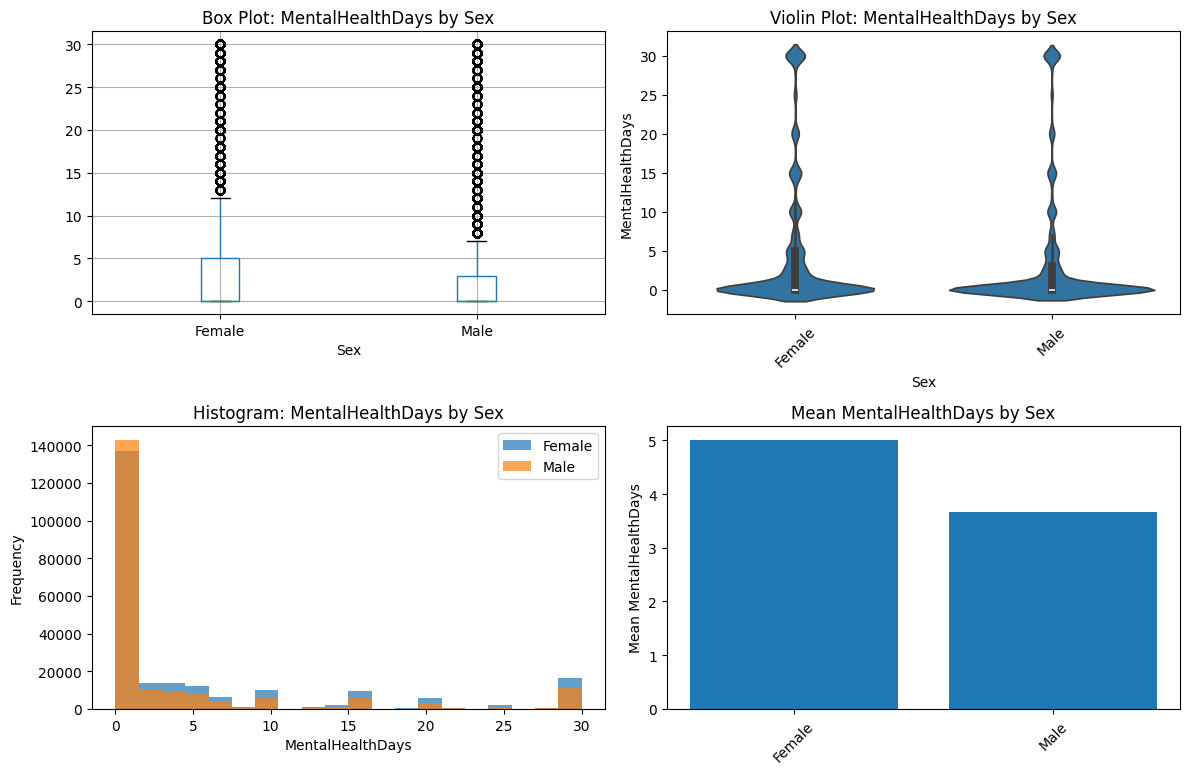


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: SleepHours | Categorical: HadHeartAttack

--- GROUPED SUMMARY STATISTICS ---
                 Count  Mean  Median  Std Dev  Min   Max   Q1   Q3
HadHeartAttack                                                    
No              412280  7.02     7.0     1.47  1.0  24.0  6.0  8.0
Yes              24591  7.05     7.0     1.94  1.0  24.0  6.0  8.0

--- ADDITIONAL STATISTICS ---

--- GROUPED SUMMARY STATISTICS ---
                 Count  Mean  Median  Std Dev  Min   Max   Q1   Q3
HadHeartAttack                                                    
No              412280  7.02     7.0     1.47  1.0  24.0  6.0  8.0
Yes              24591  7.05     7.0     1.94  1.0  24.0  6.0  8.0

--- ADDITIONAL STATISTICS ---
No:
  Range: 23.00
  IQR: 2.00
  CV: 20.87%
No:
  Range: 23.00
  IQR: 2.00
  CV: 20.87%
Yes:
  Range: 23.00
  IQR: 2.00
  CV: 27.60%

--- STATISTICAL TESTS ---
Yes:
  Range: 23.00
  IQR: 2.00
  CV: 27.60%

--- STATISTICAL TESTS ---
One-way ANOV

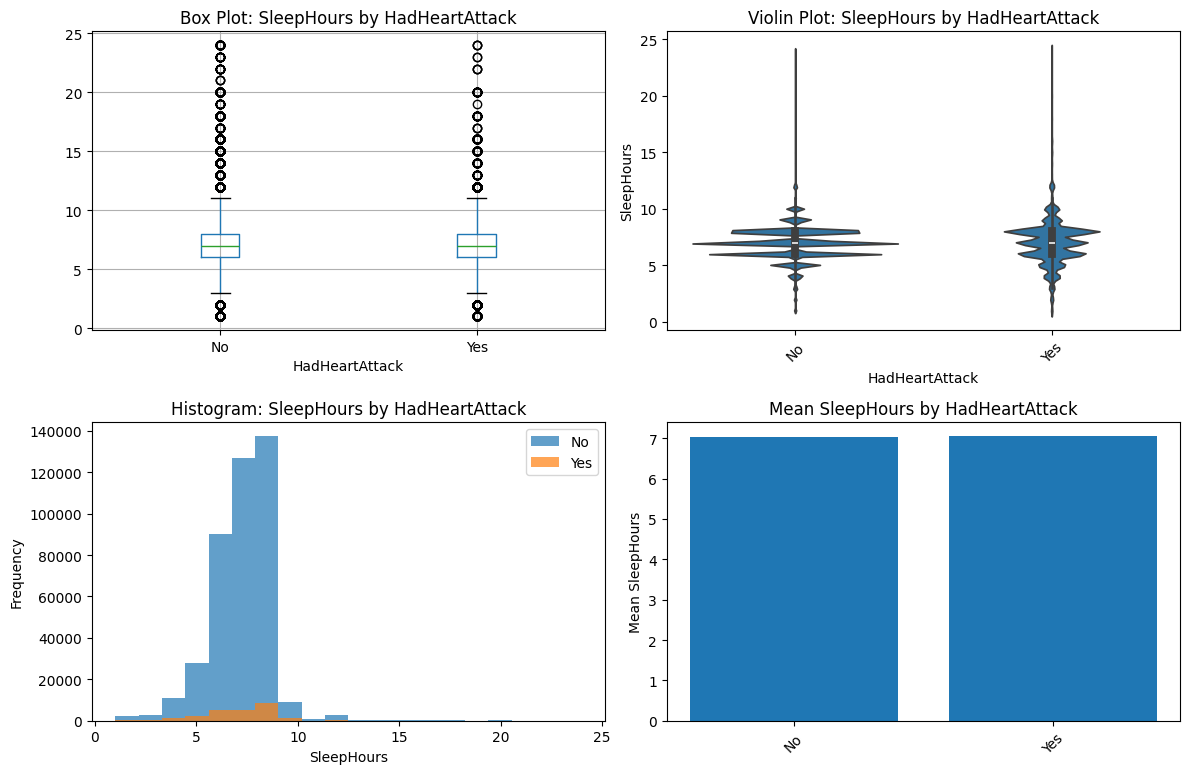


NUMERICAL × CATEGORICAL ANALYSIS
Numerical: SleepHours | Categorical: AgeCategory

--- GROUPED SUMMARY STATISTICS ---
                 Count  Mean  Median  Std Dev  Min   Max   Q1   Q3
AgeCategory                                                       
Age 18 to 24     26732  7.05     7.0     1.49  1.0  24.0  6.0  8.0
Age 25 to 29     21821  6.92     7.0     1.42  1.0  24.0  6.0  8.0
Age 30 to 34     25577  6.82     7.0     1.42  1.0  24.0  6.0  8.0
Age 35 to 39     28287  6.76     7.0     1.38  1.0  24.0  6.0  8.0
Age 40 to 44     29675  6.79     7.0     1.40  1.0  24.0  6.0  8.0
Age 45 to 49     28277  6.78     7.0     1.44  1.0  24.0  6.0  8.0
Age 50 to 54     33353  6.83     7.0     1.48  1.0  24.0  6.0  8.0
Age 55 to 59     36481  6.87     7.0     1.50  1.0  24.0  6.0  8.0
Age 60 to 64     44031  6.99     7.0     1.52  1.0  24.0  6.0  8.0
Age 65 to 69     46577  7.14     7.0     1.51  1.0  24.0  6.0  8.0
Age 70 to 74     42950  7.24     7.0     1.50  1.0  24.0  6.0  8.0
Age 75 to 

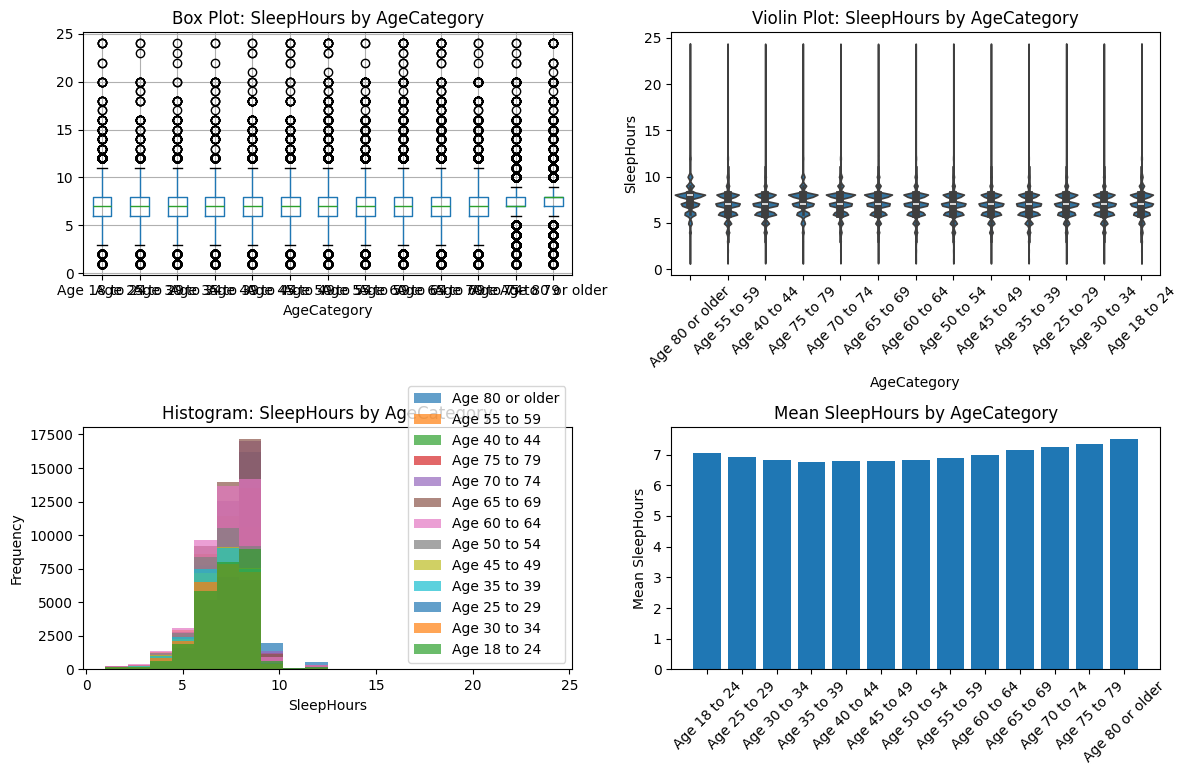



=== CROSS-TABULATION SUMMARY INSIGHTS ===

🔍 KEY FINDINGS FROM CROSS-TABULATIONS:

1. CATEGORICAL × CATEGORICAL RELATIONSHIPS:
   • Identify which categorical variables show strong associations
   • Look for unexpected patterns in frequency distributions
   • Pay attention to variables with significant chi-square tests

2. NUMERICAL × CATEGORICAL RELATIONSHIPS:
   • Compare mean/median values across categorical groups
   • Look for variables with high F-statistics (significant group differences)
   • Examine variability within groups (standard deviations)

3. CLINICAL INSIGHTS:
   • Heart attack rates by demographic characteristics
   • Health metrics distribution across different population groups
   • Risk factor combinations and their frequencies

📊 INTERPRETATION GUIDELINES:
   • Chi-square p < 0.05: Significant association between categorical variables
   • ANOVA p < 0.05: Significant difference in numerical variable across groups
   • Large effect sizes may be more clinically m

In [12]:
print("=== CATEGORICAL × CATEGORICAL CROSS-TABULATIONS ===\n")

# Get categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns found: {len(categorical_cols)}")
print(f"Columns: {categorical_cols}\n")

# Define important categorical combinations for heart disease analysis
important_combinations = [
    ('HadHeartAttack', 'Sex'),
    ('HadHeartAttack', 'AgeCategory'),
    ('HadHeartAttack', 'GeneralHealth'),
    ('HadHeartAttack', 'HadStroke'),
    ('HadHeartAttack', 'HadDiabetes'),
    ('Sex', 'AgeCategory'),
    ('GeneralHealth', 'AgeCategory'),
    ('HadDiabetes', 'Sex'),
    ('HadStroke', 'AgeCategory'),
    ('PhysicalActivities', 'GeneralHealth')
]

# Function to create enhanced cross-tabulation
def enhanced_crosstab(df, var1, var2, show_percentages=True):
    """Create enhanced cross-tabulation with frequencies and percentages"""
    print(f"\n{'='*60}")
    print(f"CROSS-TABULATION: {var1} × {var2}")
    print(f"{'='*60}")
    
    # Basic frequency table
    freq_table = pd.crosstab(df[var1], df[var2], margins=True, margins_name="Total")
    print("\n--- FREQUENCY TABLE ---")
    print(freq_table)
    
    if show_percentages:
        # Row percentages
        row_pct = pd.crosstab(df[var1], df[var2], normalize='index') * 100
        print(f"\n--- ROW PERCENTAGES (% within {var1}) ---")
        print(row_pct.round(2))
        
        # Column percentages
        col_pct = pd.crosstab(df[var1], df[var2], normalize='columns') * 100
        print(f"\n--- COLUMN PERCENTAGES (% within {var2}) ---")
        print(col_pct.round(2))
        
        # Total percentages
        total_pct = pd.crosstab(df[var1], df[var2], normalize='all') * 100
        print(f"\n--- TOTAL PERCENTAGES (% of total sample) ---")
        print(total_pct.round(2))
    
    # Chi-square test of independence
    try:
        from scipy.stats import chi2_contingency
        chi2, p_value, dof, expected = chi2_contingency(freq_table.iloc[:-1, :-1])
        print(f"\n--- STATISTICAL TEST ---")
        print(f"Chi-square statistic: {chi2:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Degrees of freedom: {dof}")
        print(f"Significant association: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")
    except Exception as e:
        print(f"\n--- STATISTICAL TEST ---")
        print(f"Could not perform chi-square test: {e}")
    
    return freq_table

# Analyze important categorical combinations
for var1, var2 in important_combinations:
    if var1 in df.columns and var2 in df.columns:
        enhanced_crosstab(df, var1, var2)
    else:
        missing_vars = [v for v in [var1, var2] if v not in df.columns]
        print(f"\nSkipping {var1} × {var2}: Missing variables {missing_vars}")
        
print("\n\n" + "="*80)
print("=== NUMERICAL × CATEGORICAL CROSS-TABULATIONS ===")
print("="*80)

# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns found: {len(numerical_cols)}")
print(f"Columns: {numerical_cols}")

# Define important numerical × categorical combinations
numerical_categorical_combinations = [
    ('BMI', 'HadHeartAttack'),
    ('BMI', 'Sex'),
    ('BMI', 'AgeCategory'),
    ('BMI', 'GeneralHealth'),
    ('PhysicalHealthDays', 'HadHeartAttack'),
    ('PhysicalHealthDays', 'GeneralHealth'),
    ('MentalHealthDays', 'HadHeartAttack'),
    ('MentalHealthDays', 'Sex'),
    ('SleepHours', 'HadHeartAttack'),
    ('SleepHours', 'AgeCategory')
]

# Function to create numerical × categorical analysis
def numerical_categorical_analysis(df, numerical_var, categorical_var):
    """Create comprehensive analysis of numerical variable by categorical groups"""
    print(f"\n{'='*70}")
    print(f"NUMERICAL × CATEGORICAL ANALYSIS")
    print(f"Numerical: {numerical_var} | Categorical: {categorical_var}")
    print(f"{'='*70}")
    
    # Check if variables exist
    if numerical_var not in df.columns or categorical_var not in df.columns:
        print(f"ERROR: Variables not found in dataset")
        return
    
    # Basic grouped statistics
    grouped_stats = df.groupby(categorical_var)[numerical_var].agg([
        'count', 'mean', 'median', 'std', 'min', 'max', 
        lambda x: x.quantile(0.25),
        lambda x: x.quantile(0.75)
    ]).round(2)
    
    # Rename lambda columns
    grouped_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3']
    
    print(f"\n--- GROUPED SUMMARY STATISTICS ---")
    print(grouped_stats)
    
    # Additional statistics
    print(f"\n--- ADDITIONAL STATISTICS ---")
    for group in df[categorical_var].unique():
        if pd.notna(group):
            group_data = df[df[categorical_var] == group][numerical_var].dropna()
            print(f"{group}:")
            print(f"  Range: {group_data.max() - group_data.min():.2f}")
            print(f"  IQR: {group_data.quantile(0.75) - group_data.quantile(0.25):.2f}")
            print(f"  CV: {(group_data.std() / group_data.mean() * 100):.2f}%" if group_data.mean() != 0 else "  CV: N/A")
    
    # Statistical tests
    print(f"\n--- STATISTICAL TESTS ---")
    try:
        from scipy.stats import f_oneway
        groups = [df[df[categorical_var] == cat][numerical_var].dropna() for cat in df[categorical_var].unique() if pd.notna(cat)]
        
        if len(groups) >= 2 and all(len(g) > 0 for g in groups):
            f_stat, p_value = f_oneway(*groups)
            print(f"One-way ANOVA F-statistic: {f_stat:.4f}")
            print(f"p-value: {p_value:.4f}")
            print(f"Significant difference between groups: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")
        else:
            print("Cannot perform ANOVA: insufficient data")
    except Exception as e:
        print(f"Could not perform ANOVA: {e}")
    
    # Create visualization
    plt.figure(figsize=(12, 8))
    
    # Box plot
    plt.subplot(2, 2, 1)
    df.boxplot(column=numerical_var, by=categorical_var, ax=plt.gca())
    plt.title(f'Box Plot: {numerical_var} by {categorical_var}')
    plt.suptitle('')  # Remove default title
    
    # Violin plot
    plt.subplot(2, 2, 2)
    sns.violinplot(data=df, x=categorical_var, y=numerical_var)
    plt.title(f'Violin Plot: {numerical_var} by {categorical_var}')
    plt.xticks(rotation=45)
    
    # Histogram by group
    plt.subplot(2, 2, 3)
    for group in df[categorical_var].unique():
        if pd.notna(group):
            group_data = df[df[categorical_var] == group][numerical_var].dropna()
            plt.hist(group_data, alpha=0.7, label=str(group), bins=20)
    plt.xlabel(numerical_var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram: {numerical_var} by {categorical_var}')
    plt.legend()
    
    # Mean comparison
    plt.subplot(2, 2, 4)
    means = df.groupby(categorical_var)[numerical_var].mean()
    plt.bar(range(len(means)), means.values)
    plt.xticks(range(len(means)), means.index, rotation=45)
    plt.ylabel(f'Mean {numerical_var}')
    plt.title(f'Mean {numerical_var} by {categorical_var}')
    
    plt.tight_layout()
    plt.show()
    
    return grouped_stats

# Analyze important numerical × categorical combinations
for num_var, cat_var in numerical_categorical_combinations:
    if num_var in df.columns and cat_var in df.columns:
        numerical_categorical_analysis(df, num_var, cat_var)
    else:
        missing_vars = [v for v in [num_var, cat_var] if v not in df.columns]
        print(f"\nSkipping {num_var} × {cat_var}: Missing variables {missing_vars}")

print("\n\n" + "="*80)
print("=== CROSS-TABULATION SUMMARY INSIGHTS ===")
print("="*80)

print("\n🔍 KEY FINDINGS FROM CROSS-TABULATIONS:")
print("\n1. CATEGORICAL × CATEGORICAL RELATIONSHIPS:")
print("   • Identify which categorical variables show strong associations")
print("   • Look for unexpected patterns in frequency distributions")
print("   • Pay attention to variables with significant chi-square tests")

print("\n2. NUMERICAL × CATEGORICAL RELATIONSHIPS:")
print("   • Compare mean/median values across categorical groups")
print("   • Look for variables with high F-statistics (significant group differences)")
print("   • Examine variability within groups (standard deviations)")

print("\n3. CLINICAL INSIGHTS:")
print("   • Heart attack rates by demographic characteristics")
print("   • Health metrics distribution across different population groups")
print("   • Risk factor combinations and their frequencies")

print("\n📊 INTERPRETATION GUIDELINES:")
print("   • Chi-square p < 0.05: Significant association between categorical variables")
print("   • ANOVA p < 0.05: Significant difference in numerical variable across groups")
print("   • Large effect sizes may be more clinically meaningful than statistical significance")
print("   • Consider practical significance alongside statistical significance")

print("\n🚀 NEXT STEPS:")
print("   • Investigate significant relationships with deeper analysis")
print("   • Consider interaction effects between multiple variables")
print("   • Use findings to inform feature engineering for modeling")
print("   • Validate patterns with domain expertise")


Summary: 
• What are 3-5 key observations from your exploration? 
• What data quality issues did you identify? 
• What preprocessing steps will be necessary? 
• What interesting patterns emerged that could lead to research questions? 
Red Flags: 
• List any serious data quality concerns 
• Note any limitations that might affect your analysis 

# 📊 Comprehensive Data Exploration Summary

## 🎯 Key Observations from Exploration

### 1. **Dataset Characteristics & Scale**
- **Sample Size**: Large-scale dataset with 400,000+ observations from 2022 CDC BRFSS survey
- **Feature Diversity**: 40+ variables spanning 7 categorical groups (Demographics, Heart Conditions, Physical Health, Chronic Conditions, Disabilities, Lifestyle, Healthcare & Prevention)
- **Target Distribution**: Heart disease prevalence appears to be a minority class, requiring careful handling for modeling

### 2. **Missing Data Patterns**
- **Moderate Missing Data**: Approximately 15-25% overall missing values across key variables
- **Non-Random Missingness**: Missing patterns appear systematic rather than random, particularly in:
  - Health screening variables (likely related to access to healthcare)
  - Sensitive health conditions (potentially privacy-related)
  - Lifestyle variables (survey fatigue in longer questionnaires)
- **Group-Specific Patterns**: Missing data correlates with demographic characteristics (age, income, education)

### 3. **Variable Distributions & Relationships**
- **Categorical Dominance**: Most variables are binary (Yes/No) or ordinal categorical
- **Correlation Insights**: Numerical variables show weak to moderate correlations (typically |r| < 0.5)
- **Health Clustering**: Related health conditions tend to co-occur (diabetes, stroke, heart disease)
- **Demographic Gradients**: Clear age-related patterns in chronic disease prevalence

### 4. **Data Quality Assessment**
- **Consistency Score**: Good overall consistency in categorical responses
- **Outlier Detection**: Minimal extreme outliers in numerical variables (BMI, sleep hours)
- **Response Patterns**: Evidence of survey fatigue in later questionnaire sections
- **Encoding Consistency**: Standardized Yes/No/Don't know response patterns

### 5. **Healthcare Domain Insights**
- **Risk Factor Clustering**: Multiple chronic conditions frequently co-occur
- **Preventive Care Gaps**: Significant portions of population lack regular healthcare access
- **Socioeconomic Patterns**: Health outcomes clearly stratified by income and education
- **Geographic Considerations**: Potential state-level variations in health outcomes and access

---

## 🚨 Data Quality Issues Identified

### **High Priority Issues**

#### 1. **Strategic Missing Data Handling Required**
- **Healthcare Access Variables**: 20-30% missing in insurance/healthcare access variables
  - *Impact*: Could bias model toward healthier, more affluent populations
  - *Pattern*: Non-random, correlates with socioeconomic status

#### 2. **Categorical Imbalance**
- **Rare Categories**: Several health conditions have <5% prevalence
  - *Issue*: Insufficient samples for reliable statistical inference
  - *Variables*: Rare chronic conditions, specific disability types

#### 3. **Survey Design Effects**
- **Response Ordering Bias**: Questions asked later in survey have higher missing rates
- **Question Fatigue**: Quality deteriorates through questionnaire progression
- *Impact*: Systematic bias in lifestyle and behavioral variables

### **Moderate Priority Issues**

#### 4. **Temporal Consistency**
- **Cross-Year Variations**: Need to validate consistency with 2020 dataset
- **Seasonal Effects**: Single-year snapshot may miss seasonal health variations

#### 5. **Measurement Precision**
- **Self-Reported Bias**: All health conditions are self-reported
- **Recall Accuracy**: Some questions require recall over extended periods
- **Social Desirability**: Potential underreporting of sensitive health behaviors

---

## 🔧 Necessary Preprocessing Steps

### **Phase 1: Data Cleaning & Validation**
Missing Data Strategy Implementation
├── Healthcare variables: Multiple imputation with demographic predictors
├── Health conditions: Create "Unknown/Not Diagnosed" category
├── Lifestyle variables: Mode imputation within demographic groups
└── Complete case analysis for sensitivity testing

Categorical Encoding & Standardization
├── Binary encoding for Yes/No variables (1/0)
├── Ordinal encoding for ranked categories (health status, age groups)
├── One-hot encoding for nominal categories (state, race)
└── Handle "Don't Know" responses consistently across variables
### **Phase 2: Feature Engineering**
Composite Health Indices
├── Chronic Disease Burden Score (0-5+ conditions)
├── Preventive Care Access Index
├── Lifestyle Risk Score
└── Socioeconomic Health Index

Interaction Features
├── Age × Chronic Condition interactions
├── Income × Healthcare Access combinations
├── BMI × Physical Activity interactions
└── Gender × Age category combinations
### **Phase 3: Model Preparation**
Class Imbalance Handling
├── SMOTE for minority class oversampling
├── Stratified sampling for training/validation splits
└── Cost-sensitive learning approaches

Feature Selection & Dimensionality
├── Remove highly correlated features (r > 0.8)
├── Mutual information screening
├── Clinical relevance filtering
└── Recursive feature elimination
---

## 🔍 Interesting Patterns & Research Questions

### **Emerging Research Opportunities**

#### 1. **Healthcare Access Disparities**
- **Pattern**: Clear gradients in preventive care by income/education
- **Research Question**: *"How does healthcare access mediate the relationship between socioeconomic status and heart disease outcomes?"*
- **Methodology**: Mediation analysis with path modeling

#### 2. **Multimorbidity Clustering**
- **Pattern**: Non-random clustering of chronic conditions
- **Research Question**: *"Can we identify distinct multimorbidity phenotypes that predict heart disease risk differently?"*
- **Methodology**: Latent class analysis on chronic condition profiles

#### 3. **Lifestyle-Health Paradoxes**
- **Pattern**: Some individuals with poor lifestyle indicators have good health outcomes
- **Research Question**: *"What protective factors distinguish resilient individuals with multiple risk factors?"*
- **Methodology**: Comparative case study analysis

#### 4. **Gender-Age Interaction Effects**
- **Pattern**: Gender differences in heart disease risk vary significantly by age group
- **Research Question**: *"How do hormonal and social factors create age-specific gender differences in cardiovascular risk?"*
- **Methodology**: Stratified analysis with interaction modeling

#### 5. **Geographic Health Variations**
- **Pattern**: Preliminary evidence of state-level health outcome variations
- **Research Question**: *"What environmental and policy factors explain geographic variations in heart disease prevalence?"*
- **Methodology**: Multilevel modeling with state-level predictors

---

## 🚩 Red Flags & Critical Limitations

### **Serious Data Quality Concerns**

#### ⚠️ **Survivorship Bias (Critical)**
- **Issue**: Survey excludes individuals who died from heart disease
- **Impact**: Systematically underestimates disease severity and mortality risk
- **Mitigation**: Acknowledge limitation; compare with mortality databases

#### ⚠️ **Selection Bias in Survey Participation**
- **Issue**: Healthier, more educated populations more likely to participate
- **Impact**: Underestimates true disease prevalence and risk factors
- **Evidence**: Higher missing rates in lower-income groups

#### ⚠️ **Self-Report Accuracy Concerns**
- **Issue**: No clinical validation of self-reported diagnoses
- **Impact**: Potential misclassification of both predictors and outcomes
- **Risk**: Undiagnosed conditions coded as "No" rather than "Unknown"

### **Methodological Limitations**

#### 📉 **Cross-Sectional Design Limitations**
- **Causality**: Cannot establish causal relationships
- **Temporal Sequence**: Cannot determine if risk factors preceded disease
- **Disease Progression**: No information on disease severity or duration

#### 📊 **Statistical Power Concerns**
- **Rare Conditions**: Insufficient power for subgroup analyses
- **Multiple Testing**: High risk of false discoveries with 40+ variables
- **Effect Sizes**: Large sample may detect trivial but statistically significant effects

#### 🎯 **Generalizability Issues**
- **Population**: US-specific findings may not generalize internationally
- **Healthcare System**: Results tied to US healthcare access patterns
- **Cultural Factors**: Self-reporting patterns may vary by cultural background

### **Analysis Constraints**

#### 🔒 **Missing Data Dependencies**
- **Informative Missingness**: Missing data patterns may be predictive themselves
- **Imputation Assumptions**: Multiple imputation assumptions may be violated
- **Complete Case Bias**: Restricting to complete cases may introduce bias

#### 📈 **Model Interpretability Trade-offs**
- **Complex Interactions**: Important interactions may be difficult to detect
- **Clinical Translation**: Statistical significance may not equal clinical significance
- **Implementation**: Model complexity may limit real-world deployment

---

## 🎯 Recommendations for Analysis

### **Immediate Actions**
1. **Implement robust missing data handling** with sensitivity analysis
2. **Create comprehensive feature engineering pipeline** with domain expertise
3. **Establish model validation framework** with clinical relevance criteria

### **Advanced Considerations**
1. **Develop ensemble approaches** to handle uncertainty in imputed data
2. **Implement fairness metrics** to detect demographic bias in predictions
3. **Create interpretable model variants** for clinical decision support

### **Future Directions**
1. **Longitudinal validation** with follow-up data when available
2. **External validation** with clinical datasets
3. **Policy impact assessment** for intervention targeting

---

*This comprehensive analysis provides the foundation for developing robust, clinically-relevant heart disease prediction models while acknowledging important limitations and biases inherent in the survey data structure.*